In [683]:

import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve, classification_report
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression


%matplotlib inline

# 1.  Load Dataset

Therea are three datasets in question: `batting`, `master`, and `hallOfFame`.

In [684]:
batting = pd.read_csv('batting.csv') # reading in the batting csv
batting.head() # inspecting the first five observations

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [685]:
batting.describe() # Descriptive statistics of this dataset 

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,101332.000000,101332.000000,101332.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,95759.000000,94883.000000,72729.000000,96183.000000,88345.000000,59620.000000,93373.000000,89845.000000,60151.000000,70075.000000
mean,1963.506533,1.077567,51.400111,149.970327,19.887038,39.261647,6.637067,1.373361,2.949305,17.965163,3.158184,1.324025,13.811484,21.629849,1.213234,1.113395,2.457900,1.150122,3.210032
std,38.628278,0.283676,47.145273,186.557072,28.671365,53.310941,9.801563,2.710547,6.409662,26.756514,7.922994,2.838196,21.092775,28.432978,2.894918,2.320660,4.347818,2.023981,4.835881
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1933.000000,1.000000,13.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,1.000000,34.000000,57.000000,5.000000,11.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,10.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1997.000000,1.000000,80.250000,251.000000,30.000000,63.000000,10.000000,2.000000,3.000000,27.000000,2.000000,1.000000,20.000000,30.000000,1.000000,1.000000,3.000000,2.000000,5.000000
max,2015.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [686]:
batting.isnull().sum() # Checking for missing values

playerID        0
yearID          0
stint           0
teamID          0
lgID          737
G               0
AB           5149
R            5149
H            5149
2B           5149
3B           5149
HR           5149
RBI          5573
SB           6449
CS          28603
BB           5149
SO          12987
IBB         41712
HBP          7959
SH          11487
SF          41181
GIDP        31257
dtype: int64

The dataset `batting` contains 101,332 rows, with each row being a batter. There are 22 columns. However, some of the columns contain a large number of missing values. Ideally, we would want to explore what exactly each of the columns indicates, and how come there are missing values: whether it is a data error, or simply unavailable. 

Given the time constraint on this project, I decided to drop some of the variables if they have too many missing values, in order to preserve the largest possible number of rows for further analysis. 

In [687]:
master = pd.read_csv('Master.csv') # reading in the master csv
master.head() #inspecting the first five observations

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [688]:
master.describe() # Some descriptive statistics

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,18703.000000,18531.000000,18382.000000,9336.000000,9335.000000,9334.000000,17975.000000,18041.000000
mean,1930.664118,6.627327,15.609020,1963.850364,6.484092,15.570281,185.980862,72.255640
std,41.229079,3.467110,8.748942,31.506369,3.528685,8.778580,21.226988,2.598983
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1894.000000,4.000000,8.000000,1942.000000,3.000000,8.000000,170.000000,71.000000
50%,1936.000000,7.000000,16.000000,1966.000000,6.000000,15.000000,185.000000,72.000000
75%,1968.000000,10.000000,23.000000,1989.000000,10.000000,23.000000,200.000000,74.000000
max,1995.000000,12.000000,31.000000,2016.000000,12.000000,31.000000,320.000000,83.000000


In [689]:
master.isnull().sum() # Checking for missing values

playerID           0
birthYear        143
birthMonth       315
birthDay         464
birthCountry      73
birthState       626
birthCity        199
deathYear       9510
deathMonth      9511
deathDay        9512
deathCountry    9517
deathState      9569
deathCity       9521
nameFirst         39
nameLast           0
nameGiven         39
weight           871
height           805
bats            1191
throws           978
debut            193
finalGame        193
retroID           54
bbrefID            1
dtype: int64

The dataset `master` contains 18,703 rows. Fortunately, there are a very limited number of rows that contains missing values. Most missing values occur in the date of death, probably because they are still alive. 

In [690]:
hallOfFame = pd.read_csv('HallOfFame.csv') # reading in the hallOfFame csv
hallOfFame.head()#inspecting the first five observations

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [691]:
hallOfFame.describe() # Some descriptive statistics

,yearid,ballots,needed,votes
count,4120.000000,3927.000000,3770.000000,3927.000000
mean,1968.889563,320.705373,243.989920,50.995926
std,22.899162,125.495156,94.557016,84.845195
min,1936.000000,78.000000,59.000000,0.000000
25%,1950.000000,226.000000,175.000000,2.000000
50%,1964.000000,274.000000,213.000000,10.000000
75%,1987.000000,425.000000,321.000000,64.000000
max,2016.000000,581.000000,436.000000,555.000000


In [692]:
hallOfFame.isnull().sum() # checking for missing values

playerID          0
yearid            0
votedBy           0
ballots         193
needed          350
votes           193
inducted          0
category          0
needed_note    3963
dtype: int64

# 2. Data Exploration

`HallOfFame` has 4,120 rows, much smaller than `batting` and `master`. It has few missing values.

Because the project's response variable is in `hallOfFame`, I will  do a left merge with `hallOfFame` with `master` and `batting`.

Note that `hallOfFame` `category` contains some non-players. Non-players will be removed from this analysis.

In [693]:
hallOfFame['category'].value_counts() # There are non-players in the data.

Player               3997
Manager                74
Pioneer/Executive      39
Umpire                 10
Name: category, dtype: int64

In [694]:
hallOfFame = hallOfFame[hallOfFame['category'] =='Player'] #Removing all non-players.

In [695]:
# Merging the three datasets: batting, master, and hallOfFame, using playerID with the key.
# It's a left merge: hallOfFame left master left batting.
dataset1 = pd.merge(hallOfFame, batting, how = 'left', left_on = ['playerID', 'yearid'], right_on = ['playerID', 'yearID'])
dataset1 = pd.merge(dataset1, master, how = 'left', left_on = ['playerID'], right_on = ['playerID'])

In [696]:
dataset1.isnull().sum() # Checking for missing values

playerID           0
yearid             0
votedBy            0
ballots          128
needed           285
votes            128
inducted           0
category           0
needed_note     3841
yearID          3971
stint           3971
teamID          3971
lgID            3971
G               3971
AB              3971
R               3971
H               3971
2B              3971
3B              3971
HR              3971
RBI             3971
SB              3971
CS              3977
BB              3971
SO              3971
IBB             3993
HBP             3971
SH              3971
SF              3993
GIDP            3980
birthYear          1
birthMonth         2
birthDay           2
birthCountry       1
birthState        68
birthCity          2
deathYear       1192
deathMonth      1192
deathDay        1192
deathCountry    1192
deathState      1201
deathCity       1192
nameFirst          1
nameLast           1
nameGiven          1
weight             6
height             3
bats         

The attempt to join `hallOfFame` and `batting` on `playerID` and `yearID` resulted in a large loss amount of data loss. Let's see why:

As it turns out, many of the players were no longer active when nominated for hall of fame. Therefore their performance information is missing, hence the missing values. 

This inspired the creation of new variable in the next step.

# 3. Feature Engineering

In this part, we'll create some new variables.

In [697]:
# Converting date to Datetime format:
dataset1['debut'] = pd.to_datetime(dataset1['debut'], format = '%Y-%m-%d')
dataset1['finalGame'] = pd.to_datetime(dataset1['finalGame'], format = '%Y-%m-%d')

In [698]:
# Extracting year.
# Sometimes we also want to extract month and day. But it doesn't seem necessary here.
dataset1['debutYear'] = dataset1['debut'].apply(lambda x: x.year)
dataset1['finalGameYear'] = dataset1['finalGame'].apply(lambda x: x.year)


In [699]:

# Whether player was alive at the time of nomination:
dataset1['alive'] = dataset1['deathYear'].isnull() | (~dataset1['deathYear'].isnull() & dataset1['deathYear']>dataset1['yearid'])

# Player's age at the time of nomination if alive, or at the time of death if already dead.
dataset1['age'] = dataset1['yearid'] - dataset1['birthYear']
dataset1['age'][dataset1['alive']==False] = dataset1['deathYear'][dataset1['alive']==False] - dataset1['birthYear'][dataset1['alive']==False]

# Whether player was active at the time ofnomination:
dataset1['active'] = dataset1['finalGame'].isnull() | (~dataset1['deathYear'].isnull() & dataset1['finalGame'].apply(lambda x: x.year)>dataset1['yearid'])

# Player's number of active years at the time of nomination, or at the time of retirement if no longer active
yearsActive = dataset1['yearid'] - dataset1['debutYear']
lifeTime    = dataset1['finalGameYear'] - dataset1['debutYear']
dataset1['yearsActive'] = [min(yearsActive.values[i], lifeTime.values[i]) for i in range(0, dataset1.shape[0])]


In [700]:
dataset1.describe()

,yearid,ballots,needed,votes,yearID,stint,G,AB,R,H,...,birthDay,deathYear,deathMonth,deathDay,weight,height,debutYear,finalGameYear,age,yearsActive
count,3998.000000,3870.000000,3713.000000,3870.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,3996.000000,2806.000000,2806.000000,2806.000000,3992.000000,3995.000000,3971.000000,3971.000000,3997.000000,3971.000000
mean,1969.027014,322.148579,245.165634,51.401034,1949.555556,1.037037,56.148148,181.925926,31.111111,55.740741,...,15.361361,1974.623664,6.589095,15.109408,181.701152,71.851815,1938.261899,1954.025686,65.036778,15.731302
std,22.820634,125.843307,94.795389,85.299487,22.501852,0.192450,50.772270,203.798340,47.280939,70.606489,...,8.496487,24.307467,3.607737,8.627598,16.970212,2.477150,27.944050,27.998315,17.577268,4.098236
min,1936.000000,78.000000,59.000000,0.000000,1936.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1892.000000,1.000000,1.000000,120.000000,64.000000,1871.000000,1875.000000,0.000000,-23.000000
25%,1950.000000,226.000000,175.000000,2.000000,1936.000000,1.000000,20.000000,23.500000,1.500000,4.000000,...,8.000000,1960.000000,3.000000,7.000000,170.000000,70.000000,1915.000000,1933.000000,48.000000,13.000000
50%,1966.000000,274.000000,213.000000,10.000000,1945.000000,1.000000,35.000000,108.000000,10.000000,31.000000,...,16.000000,1976.000000,7.000000,15.000000,180.000000,72.000000,1937.000000,1951.000000,65.000000,16.000000
75%,1987.000000,427.000000,323.000000,64.000000,1949.000000,1.000000,84.000000,255.000000,38.000000,77.000000,...,23.000000,1992.000000,10.000000,22.000000,190.000000,74.000000,1961.000000,1976.000000,81.000000,18.000000
max,2016.000000,581.000000,436.000000,555.000000,2013.000000,2.000000,155.000000,641.000000,167.000000,227.000000,...,31.000000,2016.000000,12.000000,31.000000,255.000000,82.000000,2009.000000,2014.000000,101.000000,35.000000


We found irregular value on the following variables:

`age`: 0,

`yearsActive`: 0,

Let's see what's in the data.

In [701]:
dataset1[dataset1['age']==0] # Found the age-0 observation.

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,yearID,...,debut,finalGame,retroID,bbrefID,debutYear,finalGameYear,alive,age,active,yearsActive
2663,stephjo03,1979,BBWAA,432.0,324.0,0.0,N,Player,NaN,NaN,...,2002-07-30,2002-09-29,stepj001,stephjo03,2002.0,2002.0,True,0.0,False,-23.0


In [702]:
dataset1[dataset1['yearsActive']<=0] # Found the 0-year-active observations.

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,yearID,...,debut,finalGame,retroID,bbrefID,debutYear,finalGameYear,alive,age,active,yearsActive
702,tennefr01,1946,Nominating Vote,202.0,NaN,1.0,N,Player,Top 20,NaN,...,1884-04-28,1884-08-28,tennf101,tennefr01,1884.0,1884.0,False,60.0,False,0.0
2663,stephjo03,1979,BBWAA,432.0,324.0,0.0,N,Player,NaN,NaN,...,2002-07-30,2002-09-29,stepj001,stephjo03,2002.0,2002.0,True,0.0,False,-23.0
3678,brownwi02,2006,Negro League,NaN,NaN,NaN,Y,Player,NaN,NaN,...,1947-07-19,1947-08-17,broww101,brownwi02,1947.0,1947.0,False,81.0,False,0.0
3925,jonesja05,2014,BBWAA,571.0,429.0,1.0,N,Player,NaN,NaN,...,2003-07-23,2003-09-28,jonej004,jonesja04,2003.0,2003.0,True,38.0,False,0.0


PlayerID `tennefr01` and `jonesja05` have only 0 active years. The validity was confirmed after examining the data.

PlayerID `stephjo03` was found to have age 0. After checking the original data, it was found that this player was born in 1979, and was nominated in the same year. Clearly, it is a data error. I removed this player from the dataset.

In [438]:
hallOfFame[hallOfFame['playerID']=='stephjo03']

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
2751,stephjo03,1979,BBWAA,432.0,324.0,0.0,N,Player,NaN


In [703]:
master[master['playerID']=='stephjo03'] # Removing the 0-age observation.


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
16296,stephjo03,1979.0,11.0,15.0,Australia,New South Wales,Sydney,NaN,NaN,NaN,...,Stephens,John M.,200.0,73.0,R,R,2002-07-30,2002-09-29,stepj001,stephjo03


In [704]:
dataset1 = dataset1[dataset1['playerID']!='stephjo03']

In [705]:
dataset1.describe() # Inspecting data again after manipulation. Seems fine this time

,yearid,ballots,needed,votes,yearID,stint,G,AB,R,H,...,birthDay,deathYear,deathMonth,deathDay,weight,height,debutYear,finalGameYear,age,yearsActive
count,3997.000000,3869.000000,3712.000000,3869.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,3995.000000,2806.000000,2806.000000,2806.000000,3991.000000,3994.000000,3970.000000,3970.000000,3996.000000,3970.000000
mean,1969.024518,322.120186,245.144397,51.414319,1949.555556,1.037037,56.148148,181.925926,31.111111,55.740741,...,15.361452,1974.623664,6.589095,15.109408,181.696567,71.851527,1938.245844,1954.013602,65.053053,15.741058
std,22.822944,125.847176,94.799325,85.306508,22.501852,0.192450,50.772270,203.798340,47.280939,70.606489,...,8.497548,24.307467,3.607737,8.627598,16.969865,2.477394,27.929247,27.991483,17.549321,4.052372
min,1936.000000,78.000000,59.000000,0.000000,1936.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1892.000000,1.000000,1.000000,120.000000,64.000000,1871.000000,1875.000000,26.000000,0.000000
25%,1950.000000,226.000000,175.000000,2.000000,1936.000000,1.000000,20.000000,23.500000,1.500000,4.000000,...,8.000000,1960.000000,3.000000,7.000000,170.000000,70.000000,1915.000000,1933.000000,48.000000,13.000000
50%,1966.000000,274.000000,213.000000,10.000000,1945.000000,1.000000,35.000000,108.000000,10.000000,31.000000,...,16.000000,1976.000000,7.000000,15.000000,180.000000,72.000000,1937.000000,1951.000000,65.500000,16.000000
75%,1987.000000,427.000000,323.000000,64.000000,1949.000000,1.000000,84.000000,255.000000,38.000000,77.000000,...,23.000000,1992.000000,10.000000,22.000000,190.000000,74.000000,1961.000000,1976.000000,81.000000,18.000000
max,2016.000000,581.000000,436.000000,555.000000,2013.000000,2.000000,155.000000,641.000000,167.000000,227.000000,...,31.000000,2016.000000,12.000000,31.000000,255.000000,82.000000,2009.000000,2014.000000,101.000000,35.000000


Categorical variables are converted to numerical for feeding into `RandomForestClassifier`.

In [706]:
#This cell converts categorical variables:
dataset1['inducted'] = [1 if item == 'Y' else 0 for item in dataset1['inducted']]
dataset1['alive'] = [1 if item == True else 0 for item in dataset1['alive']]
dataset1['active'] = [1 if item == True else 0 for item in dataset1['active']]
dataset1['bats'] = [1 if x == 'R' else 0 for x in dataset1['bats']]
dataset1['throws'] = [1 if x == 'R' else 0 for x in dataset1['throws']]

In [707]:
dataset1.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,yearID,...,debut,finalGame,retroID,bbrefID,debutYear,finalGameYear,alive,age,active,yearsActive
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,1,Player,NaN,NaN,...,1905-08-30,1928-09-11,cobbt101,cobbty01,1905.0,1928.0,0,75.0,0,23.0
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,1,Player,NaN,NaN,...,1914-07-11,1935-05-30,ruthb101,ruthba01,1914.0,1935.0,0,53.0,0,21.0
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,1,Player,NaN,NaN,...,1897-07-19,1917-09-17,wagnh101,wagneho01,1897.0,1917.0,0,81.0,0,20.0
3,mathech01,1936,BBWAA,226.0,170.0,205.0,1,Player,NaN,NaN,...,1900-07-17,1916-09-04,mathc102,mathech01,1900.0,1916.0,0,45.0,0,16.0
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,1,Player,NaN,NaN,...,1907-08-02,1927-09-30,johnw102,johnswa01,1907.0,1927.0,0,59.0,0,20.0


#### Transformation of Performance Data

In the dataset `batting`, there is a lot of performance information that, when directly merged with `hallOfFame`, is representend as missing, because at the year of nomination, they were no longer active. This transformation attempts to congregate those performance indicators and try to merge them with the data.

The main idea is, average-year performance indicator is calculated, up until the time of nomination, or the time of retirement, whichever occurred earlier. 

In [708]:
dataset2 = dataset1 #Making a copy of the data for this process
dataset2 = dataset2.drop(['teamID', 'lgID'],axis = 1)
dataset2[['stint', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP']] = 0 # We set these columns to 0, in order to fill in the average

In [709]:
# This is to aggregate AVERAGE-YEAR performance data within the time frame between debut year, and nomination year or retirement year, which ever is earlier.
# Caution: This cell takes 3 minutes to run. There is space for improvement, given more time. 
dataset2 = dataset1
dataset2 = dataset2.drop(['teamID', 'lgID'],axis = 1)
dataset2[['stint', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP']] = 0 # We set these columns to 0, in order to fill in the average
commonPlayerid = set(dataset1['playerID']).intersection(set(batting['playerID'])) # This is all unique playerIDs
i = 0
for index, row in dataset2.iterrows(): # looping through each row of dataset2, the main data frame
    print(i) # This tells us how many rows have been processed
    i = i + 1
    playerid = row['playerID'] # reading in playerID from dataset2
    debutYear = row['debutYear'] # this is the beginning of the career
    nominationYear = row['yearid'] # this is the year of nomination
    finalGameYear = row['finalGameYear'] # this is the year of final game
    if pd.isnull(finalGameYear): #if final game is null, then we use nomination year as the end of calculation
        endingYear = nominationYear
    else: # if career has ended, we use the earlier of final game year and the nomination year
        endingYear = min(nominationYear, finalGameYear)
    if playerid in commonPlayerid: # if player id is in batting, we calculate the aggregated mean
        tempBatting = batting[batting['playerID'] == playerid]
        tempBatting = tempBatting[tempBatting['yearID']<=endingYear]
        tempBatting = tempBatting.groupby('playerID').sum() # Taking the sum of each columns
        tempBatting = tempBatting[['stint', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP']]/(endingYear - debutYear + 1) # the denominator + 1 to avoid 0 denominator
        
        print(tempBatting)

        dataset2.loc[index, ['stint', 'G', 'AB', 'R', 'H', # update each row of dataset2
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP']]= tempBatting[['stint', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP']].iloc[0]

0
          stint           G          AB          R           H         2B  \
playerID                                                                    
cobbty01    1.0  126.458333  476.416667  93.583333  174.541667  30.166667   

                 3B     HR        RBI         SB        CS         BB      SO  \
playerID                                                                        
cobbty01  12.291667  4.875  80.708333  37.166667  7.416667  52.041667  14.875   

          IBB       HBP         SH   SF  GIDP  
playerID                                       
cobbty01  0.0  3.916667  12.291667  0.0   0.0  
1
          stint           G          AB          R           H    2B  \
playerID                                                               
ruthba01    1.0  113.772727  381.727273  98.818182  130.590909  23.0   

                3B         HR         RBI        SB        CS         BB  \
playerID                                                                   
ruthba0

gehrilo01  0.0  2.571429  7.5  0.0   0.0  
15
           stint          G          AB          R          H         2B  \
playerID                                                                   
bresnro01    1.0  76.105263  235.842105  35.894737  65.894737  11.473684   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                                                   
bresnro01  3.736842  1.368421  27.894737  11.157895  0.157895  37.578947   

                 SO  IBB       HBP        SH   SF  GIDP  
playerID                                                 
bresnro01  5.210526  0.0  3.526316  5.894737  0.0   0.0  
16
              stint           G          AB          R           H         2B  \
playerID                                                                        
keelewi01  1.105263  111.736842  452.157895  90.473684  154.315789  12.684211   

                 3B        HR        RBI         SB   CS         BB        

traynpi01  16.294118  0.0  1.823529  13.588235  0.0  2.705882  
29
            stint        G       AB        R         H       2B     3B  \
playerID                                                                 
kellyki01  1.3125  90.9375  368.375  84.8125  113.3125  22.4375  6.375   

               HR     RBI    SB   CS       BB      SO  IBB   HBP   SH   SF  \
playerID                                                                     
kellyki01  4.3125  59.375  23.0  0.0  34.3125  26.125  0.0  0.75  0.0  0.0   

           GIDP  
playerID         
kellyki01   0.0  
30
          stint        G       AB        R         H      2B      3B      HR  \
playerID                                                                       
longhe01  1.125  117.125  479.625  90.9375  132.9375  21.375  6.0625  5.6875   

              RBI      SB   CS     BB       SO  IBB     HBP     SH   SF  GIDP  
playerID                                                                       
longhe01  65.9375

dennyje01  0.0  0.0   0.0  
44
           stint           G          AB          R           H    2B  \
playerID                                                                
langebi01    1.0  115.857143  456.428571  98.428571  150.714286  19.0   

                  3B        HR        RBI    SB   CS    BB         SO  IBB  \
playerID                                                                     
langebi01  11.428571  5.571429  82.571429  57.0  0.0  50.0  12.285714  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
langebi01  3.571429  5.571429  0.0   0.0  
45
              stint          G          AB          R          H         2B  \
playerID                                                                      
robinwi01  1.117647  80.647059  298.529412  37.470588  81.647059  12.470588   

            3B        HR        RBI         SB   CS         BB         SO  \
playerID                                                           

barnero01  0.0  0.0  0.0  0.0   0.0  
58
            stint       G        AB        R       H       2B      3B      HR  \
playerID                                                                        
bennech01  0.9375  66.375  238.8125  34.3125  61.125  12.6875  4.1875  3.4375   

               RBI     SB   CS      BB     SO  IBB     HBP   SH   SF  GIDP  
playerID                                                                    
bennech01  33.3125  2.625  0.0  29.875  35.75  0.0  0.6875  0.0  0.0   0.0  
59
              stint          G          AB          R           H         2B  \
playerID                                                                       
duffyhu01  0.894737  91.421053  370.631579  81.684211  120.105263  17.105263   

                 3B        HR        RBI         SB   CS         BB  \
playerID                                                              
duffyhu01  6.263158  5.578947  68.526316  30.210526  0.0  34.842105   

                  SO  IBB 

allisdo01  3.076923  0.0  0.0  0.0  0.0   0.0  
72
           stint     G     AB     R      H    2B    3B    HR   RBI   SB    CS  \
playerID                                                                        
battijo01   0.75  24.0  97.65  11.4  21.95  2.55  1.25  0.15  7.15  1.3  0.25   

            BB   SO  IBB   HBP   SH   SF  GIDP  
playerID                                        
battijo01  2.0  1.8  0.0  0.05  0.0  0.0   0.0  
73
           stint      G     AB     R      H     2B     3B   HR    RBI     SB  \
playerID                                                                       
becklja01    1.2  119.3  476.3  80.0  146.5  23.65  12.15  4.3  78.75  15.75   

            CS    BB    SO  IBB   HBP    SH   SF  GIDP  
playerID                                                
becklja01  0.0  30.8  13.5  0.0  9.15  7.25  0.0   0.0  
74
             stint          G          AB          R          H        2B  \
playerID                                                       

mcveyca01  5.666667  0.0  0.0  0.0  0.0   0.0  
87
           stint     G     AB     R     H   2B   3B   HR   RBI   SB   CS   BB  \
playerID                                                                        
paborch01    1.4  34.0  143.0  20.2  40.8  2.4  2.4  0.0  16.2  0.6  0.2  1.6   

            SO  IBB  HBP   SH   SF  GIDP  
playerID                                  
paborch01  1.6  0.0  0.0  0.0  0.0   0.0  
88
             stint     G          AB          R          H   2B        3B  \
playerID                                                                    
pikeli01  0.705882  25.0  116.647059  25.470588  37.470588  7.0  3.117647   

                HR        RBI        SB        CS        BB        SO  IBB  \
playerID                                                                     
pikeli01  1.176471  19.529412  2.764706  0.882353  2.882353  3.176471  0.0   

          HBP   SH   SF  GIDP  
playerID                       
pikeli01  0.0  0.0  0.0   0.0  
89
       

marquru01  2.666667  0.0   0.0  
102
           stint     G    AB    R     H   2B   3B   HR  RBI   SB   CS   BB  \
playerID                                                                     
ruckena01    1.0  33.6  80.5  4.4  15.7  1.0  0.6  0.1  4.4  0.2  0.0  2.2   

            SO  IBB  HBP   SH   SF  GIDP  
playerID                                  
ruckena01  6.4  0.0  0.0  3.1  0.0   0.0  
103
              stint          G         AB         R         H        2B  \
playerID                                                                  
vanceda01  0.952381  21.047619  46.238095  3.238095  6.952381  1.095238   

                 3B        HR       RBI        SB   CS        BB         SO  \
playerID                                                                      
vanceda01  0.047619  0.333333  3.571429  0.047619  0.0  3.761905  13.666667   

           IBB       HBP        SH   SF      GIDP  
playerID                                           
vanceda01  0.0  0.333333  2

delahed01  0.0   0.0  
118
              stint          G         AB         R          H        2B  \
playerID                                                                   
wadderu01  1.071429  29.285714  76.142857  4.357143  12.285714  2.071429   

                 3B        HR       RBI        SB   CS   BB   SO  IBB  \
playerID                                                                
wadderu01  0.714286  0.285714  5.928571  0.428571  0.0  3.0  0.0  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
wadderu01  0.428571  1.642857  0.0   0.0  
119
              stint           G          AB          R           H         2B  \
playerID                                                                        
colliji01  1.285714  123.214286  485.357143  75.357143  142.785714  25.142857   

                 3B        HR        RBI         SB   CS         BB        SO  \
playerID                                                          

chaseha01  0.0   0.0  
132
              stint          G         AB         R          H       2B  \
playerID                                                                  
bendech01  0.695652  22.043478  49.869565  4.434783  10.565217  1.73913   

                 3B       HR       RBI        SB   CS       BB        SO  IBB  \
playerID                                                                        
bendech01  0.434783  0.26087  5.043478  0.869565  0.0  3.26087  2.086957  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
bendech01  0.434783  1.826087  0.0   0.0  
133
              stint          G          AB          R          H        2B  \
playerID                                                                     
crigelo01  0.941176  59.529412  188.352941  19.823529  41.705882  5.058824   

                 3B        HR        RBI        SB   CS         BB   SO  IBB  \
playerID                                               

adamsba01  8.428571  0.0  0.047619  1.666667  0.0   0.0  
147
              stint          G          AB          R           H         2B  \
playerID                                                                       
duffyhu01  0.894737  91.421053  370.631579  81.684211  120.105263  17.105263   

                 3B        HR        RBI         SB   CS         BB  \
playerID                                                              
duffyhu01  6.263158  5.578947  68.526316  30.210526  0.0  34.842105   

                  SO  IBB       HBP        SH   SF  GIDP  
playerID                                                  
duffyhu01  11.105263  0.0  1.526316  4.947368  0.0   0.0  
148
              stint          G     AB     R     H        2B        3B  \
playerID                                                                
archeji01  1.133333  56.466667  176.4  16.4  44.0  7.066667  2.266667   

                 HR        RBI   SB   CS        BB         SO  IBB       HBP  \
pl

burnsge01  0.0  1.733333  7.466667  0.0   0.0  
162
              stint          G    AB         R          H        2B       3B  \
playerID                                                                       
donovbi01  0.857143  21.857143  62.0  6.761905  11.952381  1.428571  0.52381   

                 HR       RBI        SB   CS        BB        SO  IBB  \
playerID                                                                
donovbi01  0.333333  4.428571  1.714286  0.0  3.666667  0.285714  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
donovbi01  0.285714  2.619048  0.0   0.0  
163
           stint     G     AB    R    H    2B   3B    HR  RBI    SB   CS  \
playerID                                                                   
faberre01    1.0  33.5  63.45  4.9  8.5  1.05  0.1  0.15  3.5  0.35  0.0   

             BB     SO  IBB  HBP   SH   SF  GIDP  
playerID                                          
faberre01  8.45  23.95 

mageesh01  73.5  27.5625  0.75  46.0  22.4375  0.0  6.8125  16.25  0.0   0.0  
177
              stint          G      AB          R          H         2B  \
playerID                                                                  
schreos01  1.666667  74.583333  254.75  25.333333  69.083333  11.333333   

                 3B    HR        RBI        SB   CS   BB   SO  IBB  HBP    SH  \
playerID                                                                        
schreos01  2.583333  0.75  28.166667  4.333333  0.0  8.5  0.0  0.0  1.0  3.75   

            SF  GIDP  
playerID              
schreos01  0.0   0.0  
178
              stint           G     AB          R           H    2B        3B  \
playerID                                                                        
scottev01  1.307692  127.230769  449.0  42.461538  111.923077  16.0  4.461538   

                 HR        RBI        SB        CS         BB         SO  IBB  \
playerID                                         

hinchbi01  5.3125  1.0625  18.625  10.875  0.0  3.0  6.0  0.0   0.0  
193
           stint       G     AB     R      H     2B    3B    HR   RBI     SB  \
playerID                                                                       
judgejo01    1.1  108.55  394.9  59.2  117.6  21.65  7.95  3.55  51.7  10.65   

            CS     BB    SO  IBB   HBP     SH   SF  GIDP  
playerID                                                  
judgejo01  4.6  48.25  23.9  0.0  2.55  12.85  0.0  0.15  
194
             stint          G         AB         R         H        2B  \
playerID                                                                 
kerrdi01  0.571429  20.428571  39.285714  5.714286  8.571429  1.142857   

                3B   HR  RBI        SB        CS   BB        SO  IBB  \
playerID                                                               
kerrdi01  0.714286  0.0  3.0  0.571429  0.285714  4.0  3.714286  0.0   

               HBP        SH   SF  GIDP  
playerID              

collied01  29.76  6.92  59.96  11.44  0.0  3.08  20.48  0.0   0.0  
223
              stint          G         AB         R          H        2B  \
playerID                                                                   
wadderu01  1.071429  29.285714  76.142857  4.357143  12.285714  2.071429   

                 3B        HR       RBI        SB   CS   BB   SO  IBB  \
playerID                                                                
wadderu01  0.714286  0.285714  5.928571  0.428571  0.0  3.0  0.0  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
wadderu01  0.428571  1.642857  0.0   0.0  
224
           stint          G          AB          R          H         2B  \
playerID                                                                   
chancfr01    1.0  75.705882  252.764706  46.882353  74.882353  11.764706   

                 3B        HR        RBI         SB   CS         BB        SO  \
playerID                            

planked01  4.235294  0.0  1.411765  4.470588  0.0   0.0  
237
              stint          G         AB         R          H        2B  \
playerID                                                                   
pennohe01  1.043478  26.956522  52.782609  4.695652  10.086957  1.434783   

                 3B        HR       RBI        SB   CS        BB        SO  \
playerID                                                                     
pennohe01  0.173913  0.173913  4.478261  0.043478  0.0  4.086957  7.478261   

           IBB       HBP        SH   SF  GIDP  
playerID                                       
pennohe01  0.0  0.304348  4.826087  0.0   0.0  
238
           stint     G     AB     R     H   2B   3B   HR  RBI   SB   CS   BB  \
playerID                                                                       
mcginjo01    1.2  47.7  129.7  10.9  25.1  2.1  1.0  0.0  9.0  2.6  0.0  3.4   

            SO  IBB  HBP   SH   SF  GIDP  
playerID                                  

marquru01  2.666667  0.0   0.0  
252
              stint          G         AB         R         H        2B  \
playerID                                                                  
vanceda01  0.952381  21.047619  46.238095  3.238095  6.952381  1.095238   

                 3B        HR       RBI        SB   CS        BB         SO  \
playerID                                                                      
vanceda01  0.047619  0.333333  3.571429  0.047619  0.0  3.761905  13.666667   

           IBB       HBP        SH   SF      GIDP  
playerID                                           
vanceda01  0.0  0.333333  2.619048  0.0  0.190476  
253
              stint           G          AB          R           H         2B  \
playerID                                                                        
roushed01  1.052632  103.526316  387.526316  57.842105  125.052632  17.842105   

                 3B        HR        RBI         SB        CS         BB  \
playerID           

lewisdu01  3.333333  22.0  0.0   0.0  
267
          stint          G    AB    R     H        2B        3B        HR  \
playerID                                                                    
nehfar01    1.4  30.933333  61.0  6.0  12.8  1.933333  0.333333  0.533333   

               RBI        SB   CS        BB        SO  IBB       HBP  \
playerID                                                               
nehfar01  5.066667  0.466667  0.2  5.733333  8.133333  0.0  0.333333   

                SH   SF  GIDP  
playerID                       
nehfar01  2.733333  0.0   0.0  
268
              stint          G          AB          R     H        2B  \
playerID                                                                
carribi02  0.909091  64.454545  179.090909  17.636364  46.0  6.090909   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
carribi02  1.272727  0.545455  21.3636

bradlbi01  0.0  4.294118  14.882353  0.0   0.0  
282
           stint        G        AB      R        H    2B      3B      HR  \
playerID                                                                    
burkeje01    1.0  129.125  526.3125  107.5  178.125  20.0  11.375  4.6875   

            RBI       SB   CS       BB      SO  IBB     HBP   SH   SF  GIDP  
playerID                                                                     
burkeje01  59.5  24.3125  0.0  64.3125  14.375  0.0  4.6875  5.0  0.0   0.0  
283
              stint          G          AB         R          H        2B  \
playerID                                                                    
chesbja01  1.181818  35.727273  100.272727  7.727273  19.727273  3.363636   

                 3B        HR       RBI        SB   CS        BB   SO  IBB  \
playerID                                                                     
chesbja01  1.181818  0.454545  7.454545  0.454545  0.0  2.272727  0.0  0.0   

          

chapmra01  2.111111  37.111111  0.0   0.0  
297
           stint     G    AB    R    H   2B   3B   HR  RBI   SB   CS   BB  \
playerID                                                                    
coaklan01    1.1  15.0  35.9  1.4  4.2  0.3  0.1  0.0  0.6  0.1  0.0  1.7   

            SO  IBB  HBP   SH   SF  GIDP  
playerID                                  
coaklan01  0.0  0.0  0.0  1.8  0.0   0.0  
298
              stint          G    AB    R          H        2B        3B   HR  \
playerID                                                                        
coopewi01  1.133333  34.733333  81.8  7.4  19.533333  2.266667  1.133333  0.4   

                RBI   SB   CS        BB        SO  IBB       HBP        SH  \
playerID                                                                     
coopewi01  7.066667  0.8  0.6  3.133333  9.333333  0.0  0.266667  2.533333   

            SF  GIDP  
playerID              
coopewi01  0.0   0.0  
299
              stint          G     

granted01  16.454545  0.0  1.0  11.727273  0.0   0.0  
312
              stint          G         AB         R     H        2B        3B  \
playerID                                                                        
grimebu01  1.473684  33.263158  80.789474  8.263158  20.0  3.263158  0.578947   

                 HR       RBI        SB        CS        BB         SO  IBB  \
playerID                                                                      
grimebu01  0.105263  8.842105  0.789474  0.210526  3.631579  12.684211  0.0   

                HBP   SH   SF      GIDP  
playerID                                 
grimebu01  0.263158  4.0  0.0  0.052632  
313
              stint           G          AB          R           H         2B  \
playerID                                                                        
herzobu01  1.461538  114.846154  406.461538  54.230769  105.384615  14.692308   

                 3B        HR        RBI    SB        CS         BB  \
playerID      

sheckji01  0.0  5.411765  16.823529  0.0   0.0  
328
           stint          G         AB         R          H        2B  \
playerID                                                                
shockur01    1.0  31.692308  61.384615  6.846154  12.846154  1.769231   

                 3B        HR       RBI        SB        CS         BB  \
playerID                                                                 
shockur01  0.230769  0.076923  5.384615  0.076923  0.230769  10.692308   

                  SO  IBB       HBP        SH   SF  GIDP  
playerID                                                  
shockur01  16.230769  0.0  0.846154  7.538462  0.0   0.0  
329
           stint          G          AB          R          H         2B  \
playerID                                                                   
stahlja01    1.0  89.181818  311.363636  36.818182  81.272727  13.545455   

                 3B        HR        RBI         SB   CS         BB        SO  \
playerID     

eversjo01  1.392857  9.142857  0.0   0.0  
343
              stint       G          AB          R           H         2B  \
playerID                                                                    
maranra01  0.958333  111.25  419.916667  52.291667  108.541667  15.833333   

              3B        HR        RBI      SB     CS         BB    SO  IBB  \
playerID                                                                     
maranra01  7.375  1.166667  36.833333  12.125  3.875  34.958333  31.5  0.0   

             HBP    SH   SF   GIDP  
playerID                            
maranra01  1.625  12.5  0.0  0.875  
344
              stint           G          AB          R           H         2B  \
playerID                                                                        
colliji01  1.285714  123.214286  485.357143  75.357143  142.785714  25.142857   

                 3B        HR        RBI         SB   CS         BB        SO  \
playerID                                      

jossad01  0.111111  4.333333  0.0   0.0  
358
           stint          G         AB         R          H        2B  \
playerID                                                                
planked01    1.0  37.058824  94.529412  7.647059  19.470588  2.294118   

                 3B        HR       RBI        SB        CS        BB  \
playerID                                                                
planked01  0.411765  0.176471  7.176471  0.764706  0.058824  4.176471   

                 SO  IBB       HBP        SH   SF  GIDP  
playerID                                                 
planked01  4.235294  0.0  1.411765  4.470588  0.0   0.0  
359
           stint           G          AB          R           H         2B  \
playerID                                                                     
friscfr01    1.0  121.631579  479.578947  80.631579  151.578947  24.526316   

                 3B        HR        RBI         SB        CS         BB  \
playerID                 

altroni01  0.416667  0.0   0.0  
373
              stint          G          AB         R          H        2B  \
playerID                                                                    
chesbja01  1.181818  35.727273  100.272727  7.727273  19.727273  3.363636   

                 3B        HR       RBI        SB   CS        BB   SO  IBB  \
playerID                                                                     
chesbja01  1.181818  0.454545  7.454545  0.454545  0.0  2.272727  0.0  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
chesbja01  0.181818  1.909091  0.0   0.0  
374
           stint           G          AB          R           H         2B  \
playerID                                                                     
crawfsa01    1.0  132.473684  503.684211  73.210526  155.842105  24.105263   

                  3B        HR        RBI         SB        CS    BB  \
playerID                                                

faberre01  8.45  23.95  0.0  0.4  5.2  0.0   0.0  
388
              stint           G          AB     R           H    2B        3B  \
playerID                                                                        
tennefr02  0.944444  110.777778  421.944444  71.0  123.944444  15.0  4.277778   

                 HR        RBI         SB   CS         BB        SO  IBB  HBP  \
playerID                                                                        
tennefr02  1.222222  38.222222  15.833333  0.0  48.555556  2.388889  0.0  3.5   

                  SH   SF  GIDP  
playerID                         
tennefr02  15.277778  0.0   0.0  
389
          stint        G       AB     R       H      2B     3B      HR    RBI  \
playerID                                                                        
bushdo01  1.125  121.625  450.625  80.0  112.75  11.625  4.625  0.5625  27.25   

             SB      CS      BB      SO  IBB     HBP       SH   SF  GIDP  
playerID                        

bradlbi01  0.0  4.294118  14.882353  0.0   0.0  
403
           stint           G          AB     R           H         2B   3B  \
playerID                                                                     
burnsge01    1.0  123.533333  482.733333  79.2  138.466667  24.133333  7.2   

                 HR        RBI         SB        CS         BB         SO  \
playerID                                                                    
burnsge01  2.733333  40.733333  25.533333  9.266667  58.133333  37.666667   

           IBB       HBP        SH   SF  GIDP  
playerID                                       
burnsge01  0.0  1.733333  7.466667  0.0   0.0  
404
              stint          G    AB    R          H        2B        3B   HR  \
playerID                                                                        
coopewi01  1.133333  34.733333  81.8  7.4  19.533333  2.266667  1.133333  0.4   

                RBI   SB   CS        BB        SO  IBB       HBP        SH  \
playerID  

jonessa01  3.863636  0.0   0.0  
418
              stint           G          AB          R           H         2B  \
playerID                                                                        
kellejo01  1.166667  102.944444  389.222222  78.944444  123.333333  19.888889   

                  3B        HR        RBI         SB   CS         BB  \
playerID                                                               
kellejo01  10.777778  3.611111  66.333333  24.611111  0.0  50.611111   

                 SO  IBB       HBP        SH   SF  GIDP  
playerID                                                 
kellejo01  9.055556  0.0  4.555556  6.722222  0.0   0.0  
419
              stint      G          AB          R          H         2B   3B  \
playerID                                                                       
knabeot01  1.083333  106.5  372.416667  47.666667  91.916667  14.833333  4.0   

                 HR        RBI         SB   CS         BB         SO  IBB  \
player

shockur01  16.230769  0.0  0.846154  7.538462  0.0   0.0  
433
           stint          G          AB          R          H         2B  \
playerID                                                                   
stahlja01    1.0  89.181818  311.363636  36.818182  81.272727  13.545455   

                 3B        HR        RBI         SB   CS         BB        SO  \
playerID                                                                        
stahlja01  7.909091  2.818182  39.727273  16.181818  0.0  20.090909  0.090909   

           IBB       HBP        SH   SF  GIDP  
playerID                                       
stahlja01  0.0  8.545455  9.545455  0.0   0.0  
434
           stint           G          AB          R           H         2B  \
playerID                                                                     
steinha01    1.0  117.571429  421.142857  54.142857  112.571429  20.285714   

                 3B        HR        RBI         SB   CS         BB        SO  \


cochrmi01  0.0  2.230769  11.615385  0.0   0.0  
447
           stint           G          AB          R           H         2B  \
playerID                                                                     
friscfr01    1.0  121.631579  479.578947  80.631579  151.578947  24.526316   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                                                   
friscfr01  7.263158  5.526316  65.473684  22.052632  3.894737  38.315789   

                  SO  IBB       HBP         SH   SF      GIDP  
playerID                                                       
friscfr01  14.315789  0.0  1.631579  12.052632  0.0  2.894737  
448
              stint          G          AB          R           H         2B  \
playerID                                                                       
duffyhu01  0.894737  91.421053  370.631579  81.684211  120.105263  17.105263   

                 3B        HR        RBI      

traynpi01  15.444444  0.0  1.722222  12.833333  0.0  2.611111  
461
           stint      G     AB     R      H    2B   3B   HR   RBI    SB   CS  \
playerID                                                                       
youngro01    1.0  121.1  462.7  81.2  149.1  23.6  9.3  4.2  59.2  15.3  8.3   

             BB    SO  IBB  HBP    SH   SF  GIDP  
playerID                                          
youngro01  55.0  39.0  0.0  3.7  11.9  0.0   0.0  
462
              stint      G          AB          R           H    2B        3B  \
playerID                                                                        
bakerfr01  0.866667  105.0  398.933333  59.133333  122.533333  21.0  6.866667   

            HR   RBI         SB        CS         BB         SO  IBB  \
playerID                                                               
bakerfr01  6.4  65.8  15.666667  1.866667  31.533333  12.133333  0.0   

                HBP    SH   SF  GIDP  
playerID                          

wheatza01  29.421053  0.0  4.052632  8.578947  0.0   0.0  
476
          stint        G       AB     R       H      2B     3B      HR    RBI  \
playerID                                                                        
bushdo01  1.125  121.625  450.625  80.0  112.75  11.625  4.625  0.5625  27.25   

             SB      CS      BB      SO  IBB     HBP       SH   SF  GIDP  
playerID                                                                  
bushdo01  25.25  4.6875  72.375  21.625  0.0  1.8125  21.0625  0.0   0.0  
477
           stint           G          AB          R           H         2B  \
playerID                                                                     
crawfsa01    1.0  132.473684  503.684211  73.210526  155.842105  24.105263   

                  3B        HR        RBI         SB        CS    BB  \
playerID                                                               
crawfsa01  16.263158  5.105263  80.263158  19.263158  1.578947  40.0   

            

hermaba01  32.117647  0.0  0.647059  5.411765  0.0  2.470588  
492
             stint          G         AB         R          H        2B  \
playerID                                                                  
hoytwa01  1.380952  32.095238  61.285714  4.571429  12.142857  1.238095   

               3B   HR       RBI   SB        CS        BB        SO  IBB  \
playerID                                                                   
hoytwa01  0.52381  0.0  4.761905  0.0  0.047619  1.904762  7.666667  0.0   

               HBP        SH   SF     GIDP  
playerID                                    
hoytwa01  0.047619  4.333333  0.0  0.47619  
493
              stint           G          AB          R           H         2B  \
playerID                                                                        
kellejo01  1.166667  102.944444  389.222222  78.944444  123.333333  19.888889   

                  3B        HR        RBI         SB   CS         BB  \
playerID               

wambsbi01  27.461538  0.0  3.615385  24.846154  0.0   0.0  
506
              stint           G          AB          R       H         2B  \
playerID                                                                    
wilsoha01  1.166667  112.333333  396.666667  73.666667  121.75  22.166667   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
wilsoha01  5.583333  20.333333  88.583333  4.333333  0.416667  56.166667   

                  SO  IBB       HBP   SH   SF  GIDP  
playerID                                             
wilsoha01  59.416667  0.0  1.666667  8.5  0.0  1.25  
507
             stint     G          AB          R          H        2B  \
playerID                                                               
woodjo02  0.933333  46.4  130.133333  17.733333  36.866667  7.866667   

                3B        HR        RBI        SB   CS         BB    SO  IBB  \
playerID    

duffyhu01  11.105263  0.0  1.526316  4.947368  0.0   0.0  
520
              stint           G          AB          R           H         2B  \
playerID                                                                        
clarkfr01  0.954545  101.909091  389.454545  73.590909  121.454545  16.409091   

             3B        HR        RBI    SB   CS         BB        SO  IBB  \
playerID                                                                    
clarkfr01  10.0  3.045455  46.136364  23.0  0.0  39.727273  6.136364  0.0   

                HBP         SH   SF  GIDP  
playerID                                   
clarkfr01  6.954545  10.181818  0.0   0.0  
521
              stint       G          AB          R           H         2B  \
playerID                                                                    
maranra01  0.958333  111.25  419.916667  52.291667  108.541667  15.833333   

              3B        HR        RBI      SB     CS         BB    SO  IBB  \
playerID       

youngro01  55.0  39.0  0.0  3.7  11.9  0.0   0.0  
535
              stint          G         AB         R         H        2B  \
playerID                                                                  
vanceda01  0.952381  21.047619  46.238095  3.238095  6.952381  1.095238   

                 3B        HR       RBI        SB   CS        BB         SO  \
playerID                                                                      
vanceda01  0.047619  0.333333  3.571429  0.047619  0.0  3.761905  13.666667   

           IBB       HBP        SH   SF      GIDP  
playerID                                           
vanceda01  0.0  0.333333  2.619048  0.0  0.190476  
536
           stint      G     AB     R     H      2B    3B   HR   RBI      SB  \
playerID                                                                      
deandi01  0.6875  20.25  44.75  4.75  10.0  1.4375  0.25  0.5  4.75  0.3125   

           CS      BB   SO  IBB     HBP      SH   SF  GIDP  
playerID              

carribi02  5.363636  0.0  2.0  7.181818  0.0   0.0  
549
              stint          G    AB         R          H        2B       3B  \
playerID                                                                       
donovbi01  0.857143  21.857143  62.0  6.761905  11.952381  1.428571  0.52381   

                 HR       RBI        SB   CS        BB        SO  IBB  \
playerID                                                                
donovbi01  0.333333  4.428571  1.714286  0.0  3.666667  0.285714  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
donovbi01  0.285714  2.619048  0.0   0.0  
550
           stint     G          AB          R          H        2B        3B  \
playerID                                                                       
gowdyha01    1.0  50.0  130.238095  12.857143  35.142857  5.904762  1.285714   

            HR        RBI        SB        CS         BB         SO  IBB  \
playerID                        

mageesh01  73.5  27.5625  0.75  46.0  22.4375  0.0  6.8125  16.25  0.0   0.0  
580
              stint          G          AB          R          H         2B  \
playerID                                                                      
martipe01  0.764706  69.941176  242.176471  44.352941  72.176471  15.882353   

                 3B        HR        RBI        SB   CS         BB         SO  \
playerID                                                                        
martipe01  4.411765  3.470588  29.470588  8.588235  0.0  21.705882  25.764706   

           IBB       HBP        SH   SF      GIDP  
playerID                                           
martipe01  0.0  0.764706  1.294118  0.0  2.588235  
581
           stint           G          AB          R           H         2B  \
playerID                                                                     
meusebo01    1.0  127.909091  497.727273  75.090909  153.909091  33.454545   

                 3B         HR        RB

tanneje01  0.0  0.444444  1.444444  0.0   0.0  
594
              stint          G         AB         R         H        2B  \
playerID                                                                  
vandejo01  0.777778  23.111111  45.333333  4.111111  7.111111  0.666667   

                 3B   HR       RBI        SB   CS        BB         SO  IBB  \
playerID                                                                      
vandejo01  0.111111  0.0  1.666667  0.111111  0.0  2.555556  12.777778  0.0   

           HBP        SH   SF      GIDP  
playerID                                 
vandejo01  0.0  4.222222  0.0  0.555556  
595
           stint           G          AB          R           H         2B  \
playerID                                                                     
willicy01    1.0  105.368421  356.842105  53.894737  104.263158  16.105263   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                   

chancfr01  0.0  8.058824  6.529412  0.0   0.0  
608
              stint          G          AB          R      H        2B   3B  \
playerID                                                                      
eversjo01  0.714286  63.714286  219.178571  32.821429  59.25  7.714286  2.5   

                 HR        RBI         SB        CS         BB        SO  IBB  \
playerID                                                                        
eversjo01  0.428571  19.214286  11.571429  0.285714  27.785714  5.071429  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
eversjo01  1.392857  9.142857  0.0   0.0  
609
           stint      G          AB          R           H         2B  \
playerID                                                                
huggimi01    1.0  122.0  427.538462  72.923077  113.384615  11.230769   

                 3B        HR        RBI         SB        CS         BB  \
playerID                             

grovele01  0.117647  6.058824  0.0  0.058824  
623
           stint           G          AB          R           H         2B  \
playerID                                                                     
friscfr01    1.0  121.631579  479.578947  80.631579  151.578947  24.526316   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                                                   
friscfr01  7.263158  5.526316  65.473684  22.052632  3.894737  38.315789   

                  SO  IBB       HBP         SH   SF      GIDP  
playerID                                                       
friscfr01  14.315789  0.0  1.631579  12.052632  0.0  2.894737  
624
           stint      G          AB          R           H         2B  \
playerID                                                                
cochrmi01    1.0  114.0  397.615385  80.076923  127.076923  25.615385   

                 3B        HR   RBI        SB        CS         BB   

foxxji01  62.428571  0.0  0.619048  3.380952  0.0  3.285714  
651
           stint      G     AB     R      H    2B   3B   HR   RBI    SB   CS  \
playerID                                                                       
youngro01    1.0  121.1  462.7  81.2  149.1  23.6  9.3  4.2  59.2  15.3  8.3   

             BB    SO  IBB  HBP    SH   SF  GIDP  
playerID                                          
youngro01  55.0  39.0  0.0  3.7  11.9  0.0   0.0  
652
           stint           G          AB          R           H         2B  \
playerID                                                                     
gehrich01    1.0  122.263158  466.315789  93.368421  149.421053  30.210526   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
gehrich01  7.684211  9.684211  75.105263  9.526316  4.684211  62.421053   

                  SO  IBB       HBP        SH   SF      GIDP  
playerID    

chesbja01  0.181818  1.909091  0.0   0.0  
680
              stint     G          AB          R          H        2B   3B  \
playerID                                                                     
clarkjo01  1.076923  42.0  151.846154  19.538462  33.230769  5.615385  2.0   

                 HR        RBI        SB   CS        BB         SO  IBB  \
playerID                                                                  
clarkjo01  1.846154  17.846154  2.384615  0.0  6.230769  29.384615  0.0   

                HBP   SH   SF  GIDP  
playerID                             
clarkjo01  0.076923  0.0  0.0   0.0  
681
           stint          G          AB          R          H         2B  \
playerID                                                                   
cravaga01    1.0  93.846154  303.923077  44.230769  87.230769  17.846154   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                              

phillde01  0.846154  1.846154  0.0   0.0  
695
          stint     G     AB     R     H    2B    3B   HR   RBI    SB    CS  \
playerID                                                                      
ruelmu01   1.05  73.4  225.7  24.7  62.1  9.35  1.45  0.2  26.7  3.05  2.95   

            BB    SO  IBB   HBP    SH   SF  GIDP  
playerID                                          
ruelmu01  30.3  11.9  0.0  1.45  7.15  0.0   0.0  
696
              stint           G          AB          R           H         2B  \
playerID                                                                        
sheckji01  1.235294  124.823529  447.352941  76.235294  122.588235  20.823529   

            3B        HR        RBI         SB   CS         BB         SO  \
playerID                                                                    
sheckji01  8.0  3.294118  47.823529  27.352941  0.0  66.764706  13.705882   

           IBB       HBP         SH   SF  GIDP  
playerID                         

mcginjo01  0.0  0.0  1.1  8.1  0.0   0.0  
710
           stint          G         AB         R          H        2B  \
playerID                                                                
planked01    1.0  37.058824  94.529412  7.647059  19.470588  2.294118   

                 3B        HR       RBI        SB        CS        BB  \
playerID                                                                
planked01  0.411765  0.176471  7.176471  0.764706  0.058824  4.176471   

                 SO  IBB       HBP        SH   SF  GIDP  
playerID                                                 
planked01  4.235294  0.0  1.411765  4.470588  0.0   0.0  
711
           stint           G          AB     R           H         2B   3B  \
playerID                                                                     
tinkejo01    1.0  120.266667  428.933333  51.6  112.466667  17.533333  7.6   

                 HR        RBI    SB   CS         BB        SO  IBB       HBP  \
playerID           

bendech01  0.434783  1.826087  0.0   0.0  
724
              stint           G          AB          R      H         2B  \
playerID                                                                   
heilmha01  0.894737  113.052632  409.842105  67.947368  140.0  28.526316   

                 3B        HR   RBI        SB        CS         BB         SO  \
playerID                                                                        
heilmha01  7.947368  9.631579  81.0  5.947368  3.368421  45.052632  28.947368   

           IBB       HBP         SH   SF  GIDP  
playerID                                        
heilmha01  0.0  2.105263  14.578947  0.0   0.0  
725
           stint          G          AB          R          H         2B  \
playerID                                                                   
schalra01    1.0  97.888889  294.777778  32.166667  74.722222  11.055556   

                 3B        HR   RBI        SB        CS         BB         SO  \
playerID           

scottev01  1.384615  21.153846  0.0   0.0  
752
              stint          G         AB         R          H        2B  \
playerID                                                                   
pennohe01  1.043478  26.956522  52.782609  4.695652  10.086957  1.434783   

                 3B        HR       RBI        SB   CS        BB        SO  \
playerID                                                                     
pennohe01  0.173913  0.173913  4.478261  0.043478  0.0  4.086957  7.478261   

           IBB       HBP        SH   SF  GIDP  
playerID                                       
pennohe01  0.0  0.304348  4.826087  0.0   0.0  
753
              stint           G          AB          R           H         2B  \
playerID                                                                        
traynpi01  0.944444  107.833333  419.944444  65.722222  134.222222  20.611111   

                 3B        HR        RBI        SB        CS         BB  \
playerID             

schalra01  0.0  3.277778  11.888889  0.0   0.0  
767
              stint           G          AB          R           H         2B  \
playerID                                                                        
lazzeto01  1.142857  124.285714  449.785714  70.428571  131.428571  23.857143   

                 3B         HR        RBI         SB        CS         BB  \
playerID                                                                    
lazzeto01  8.214286  12.714286  85.071429  10.571429  5.642857  62.071429   

                  SO  IBB  HBP        SH   SF      GIDP  
playerID                                                 
lazzeto01  61.714286  0.0  1.5  8.285714  0.0  0.571429  
768
           stint      G     AB     R      H    2B   3B   HR   RBI    SB   CS  \
playerID                                                                       
youngro01    1.0  121.1  462.7  81.2  149.1  23.6  9.3  4.2  59.2  15.3  8.3   

             BB    SO  IBB  HBP    SH   SF  GIDP  
p

cuyleki01  41.777778  0.0  4.722222  9.777778  0.0  2.944444  
795
              stint          G          AB          R           H         2B  \
playerID                                                                       
duganjo01  1.066667  96.466667  360.666667  44.333333  101.066667  18.466667   

                 3B   HR        RBI        SB        CS         BB         SO  \
playerID                                                                        
duganjo01  3.066667  2.8  38.066667  2.466667  1.866667  16.666667  27.933333   

           IBB  HBP    SH   SF  GIDP  
playerID                              
duganjo01  0.0  2.8  11.8  0.0   0.0  
796
              stint          G         AB         R     H        2B        3B  \
playerID                                                                        
earnsge01  1.444444  35.444444  78.222222  6.777778  18.0  3.222222  0.444444   

                 HR       RBI        SB   CS        BB         SO  IBB  \
playerID 

fitzsfr01  3.052632  0.0  0.789474  
809
          stint        G       AB        R         H       2B      3B      HR  \
playerID                                                                        
hackst01    1.0  121.125  454.875  77.4375  137.0625  22.6875  5.0625  3.5625   

             RBI       SB   CS     BB      SO  IBB     HBP      SH   SF   GIDP  
playerID                                                                        
hackst01  40.125  10.3125  0.0  68.25  29.125  0.0  1.3125  7.1875  0.0  4.875  
810
           stint     G    AB    R      H    2B   3B    HR   RBI   SB   CS  \
playerID                                                                    
haineje01   0.95  28.0  56.2  3.8  10.45  1.15  0.1  0.15  3.95  0.1  0.0   

            BB    SO  IBB   HBP    SH   SF  GIDP  
playerID                                          
haineje01  1.5  12.3  0.0  0.05  2.95  0.0  0.05  
811
           stint     G      AB     R     H     2B   3B    HR    RBI   SB   CS  

davissp01  0.0  1.222222  2.777778  0.0  5.555556  
825
              stint     G    AB         R          H   2B   3B        HR  RBI  \
playerID                                                                        
derripa01  1.133333  38.6  84.0  4.666667  14.666667  2.0  0.2  0.133333  6.8   

            SB   CS        BB    SO  IBB       HBP        SH   SF  GIDP  
playerID                                                                 
derripa01  0.0  0.0  1.066667  14.6  0.0  0.133333  5.133333  0.0   1.8  
826
              stint          G    AB          R          H   2B   3B  \
playerID                                                               
ferrewe01  1.266667  36.533333  78.4  11.666667  21.933333  3.8  0.8   

                 HR        RBI        SB   CS   BB         SO  IBB  HBP  \
playerID                                                                  
ferrewe01  2.533333  13.866667  0.133333  0.0  8.6  12.333333  0.0  0.0   

                 SH   SF  GIDP 

willicy01  37.947368  0.0  4.526316  8.631579  0.0   0.0  
854
           stint           G          AB          R           H         2B  \
playerID                                                                     
gehrich01    1.0  122.263158  466.315789  93.368421  149.421053  30.210526   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
gehrich01  7.684211  9.684211  75.105263  9.526316  4.684211  62.421053   

                  SO  IBB       HBP        SH   SF      GIDP  
playerID                                                      
gehrich01  19.578947  0.0  2.631579  7.421053  0.0  1.421053  
855
          stint           G          AB     R           H         2B  \
playerID                                                               
ottme01     1.0  124.090909  429.818182  84.5  130.727273  22.181818   

                3B         HR        RBI        SB   CS         BB

dickebi01  15.210526  0.0  1.631579  2.684211  0.0  2.578947  
868
           stint       G      AB      R      H     2B    3B    HR    RBI   SB  \
playerID                                                                        
wanerpa01    1.2  127.45  472.95  81.35  157.6  30.25  9.55  5.65  65.45  5.2   

            CS     BB    SO  IBB  HBP   SH   SF  GIDP  
playerID                                               
wanerpa01  0.0  54.55  18.8  0.0  1.9  8.7  0.0  6.35  
869
              stint           G          AB          R      H         2B  \
playerID                                                                   
heilmha01  0.894737  113.052632  409.842105  67.947368  140.0  28.526316   

                 3B        HR   RBI        SB        CS         BB         SO  \
playerID                                                                        
heilmha01  7.947368  9.631579  81.0  5.947368  3.368421  45.052632  28.947368   

           IBB       HBP         SH   SF  GI

ruffire01  1.791667  0.0  0.541667  
883
              stint           G          AB          R           H         2B  \
playerID                                                                        
lazzeto01  1.142857  124.285714  449.785714  70.428571  131.428571  23.857143   

                 3B         HR        RBI         SB        CS         BB  \
playerID                                                                    
lazzeto01  8.214286  12.714286  85.071429  10.571429  5.642857  62.071429   

                  SO  IBB  HBP        SH   SF      GIDP  
playerID                                                 
lazzeto01  61.714286  0.0  1.5  8.285714  0.0  0.571429  
884
           stint      G     AB     R      H    2B   3B   HR   RBI    SB   CS  \
playerID                                                                       
youngro01    1.0  121.1  462.7  81.2  149.1  23.6  9.3  4.2  59.2  15.3  8.3   

             BB    SO  IBB  HBP    SH   SF  GIDP  
playerID     

gowdyha01  1.428571  3.190476  0.0   0.0  
898
              stint           G     AB          R          H         2B  \
playerID                                                                  
grimmch01  0.952381  103.142857  377.0  43.238095  109.47619  18.761905   

                 3B        HR        RBI        SB        CS        BB  \
playerID                                                                 
grimmch01  5.142857  3.761905  51.333333  2.714286  2.095238  27.52381   

                 SO  IBB      HBP         SH   SF      GIDP  
playerID                                                     
grimmch01  19.52381  0.0  1.47619  10.428571  0.0  1.428571  
899
              stint           G          AB          R           H         2B  \
playerID                                                                        
kleinch01  1.235294  103.117647  381.529412  68.705882  122.117647  23.411765   

                 3B         HR        RBI        SB   CS         BB  \

lazzeto01  61.714286  0.0  1.5  8.285714  0.0  0.571429  
913
              stint          G        AB         R          H       2B  \
playerID                                                                 
adamsba01  0.904762  22.952381  48.52381  3.761905  10.285714  1.47619   

                 3B        HR       RBI        SB        CS       BB  \
playerID                                                               
adamsba01  0.714286  0.142857  3.571429  0.047619  0.047619  2.52381   

                 SO  IBB       HBP        SH   SF  GIDP  
playerID                                                 
adamsba01  8.428571  0.0  0.047619  1.666667  0.0   0.0  
914
           stint         G       AB     R       H    2B      3B   HR      RBI  \
playerID                                                                        
bancrda01  1.125  119.5625  448.875  65.5  125.25  20.0  4.8125  2.0  36.9375   

               SB      CS       BB       SO  IBB     HBP     SH   SF  GIDP  

scottev01  1.384615  21.153846  0.0   0.0  
929
              stint          G          AB          R          H    2B  \
playerID                                                                 
stengca01  1.142857  91.214286  306.285714  41.071429  87.071429  13.0   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
stengca01  6.357143  4.285714  38.214286  9.357143  3.071429  31.214286   

                  SO  IBB       HBP   SH   SF  GIDP  
playerID                                             
stengca01  32.357143  0.0  2.785714  7.5  0.0   0.0  
930
              stint           G          AB          R           H         2B  \
playerID                                                                        
wanerll01  1.315789  104.894737  409.052632  63.210526  129.421053  14.789474   

                 3B        HR        RBI        SB   CS         BB        SO  \
playerID     

willicy01  37.947368  0.0  4.526316  8.631579  0.0   0.0  
944
              stint           G          AB          R           H         2B  \
playerID                                                                        
averiea01  1.153846  128.307692  488.692308  94.153846  155.307692  30.846154   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
averiea01  9.846154  18.307692  89.538462  5.384615  4.384615  59.538462   

                  SO  IBB       HBP        SH   SF      GIDP  
playerID                                                      
averiea01  39.846154  0.0  2.538462  4.230769  0.0  0.538462  
945
           stint           G          AB          R          H         2B  \
playerID                                                                    
bluegos01    1.0  103.722222  357.777778  49.055556  97.277778  15.333333   

                 3B        HR        RB

lindsfr01  21.230769  0.0  1.0  11.230769  0.0  2.692308  
958
           stint     G     AB      R      H    2B    3B    HR   RBI   SB  \
playerID                                                                   
lopezal01   1.05  97.5  295.8  30.65  77.35  10.3  2.15  2.55  32.6  2.3   

             CS    BB    SO  IBB  HBP    SH   SF  GIDP  
playerID                                                
lopezal01  0.05  27.8  26.9  0.0  0.7  6.05  0.0  6.85  
959
              stint           G          AB          R           H         2B  \
playerID                                                                        
manushe01  1.235294  118.117647  450.235294  75.705882  148.470588  28.882353   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
manushe01  9.411765  6.470588  69.588235  6.705882  3.411765  29.764706   

                  SO  IBB       HBP         SH   SF      GIDP  

wrighgl01  33.916667  0.0  0.416667  9.416667  0.0  0.75  
972
              stint          G         AB         R          H        2B  \
playerID                                                                   
brownmo01  1.142857  35.214286  81.642857  6.642857  16.785714  1.428571   

                 3B        HR       RBI        SB   CS        BB        SO  \
playerID                                                                     
brownmo01  0.785714  0.142857  5.285714  0.571429  0.0  3.142857  5.357143   

           IBB       HBP   SH   SF  GIDP  
playerID                                  
brownmo01  0.0  0.071429  3.5  0.0   0.0  
973
           stint          G          AB          R          H        2B  \
playerID                                                                  
nichoki01    1.0  38.176471  122.705882  16.058824  27.705882  3.411765   

                 3B        HR        RBI        SB   CS        BB         SO  \
playerID                          

vanceda01  0.0  0.333333  2.619048  0.0  0.190476  
986
           stint       G      AB     R          H        2B     3B        HR  \
playerID                                                                       
lyonste01  0.875  29.375  65.125  6.75  15.166667  2.041667  0.375  0.208333   

                RBI   SB        CS        BB     SO  IBB       HBP        SH  \
playerID                                                                       
lyonste01  6.208333  0.0  0.041667  3.041667  8.375  0.0  0.291667  3.458333   

            SF   GIDP  
playerID               
lyonste01  0.0  0.375  
987
           stint      G      AB      R       H     2B   3B   HR   RBI    SB  \
playerID                                                                      
cronijo01    1.0  106.2  378.95  61.65  114.25  25.75  5.9  8.5  71.2  4.35   

             CS     BB    SO  IBB  HBP   SH   SF  GIDP  
playerID                                                
cronijo01  3.55  52.95  35.0  0.0 

haineje01  1.5  12.3  0.0  0.05  2.95  0.0  0.05  
1001
             stint          G         AB         R          H        2B  \
playerID                                                                  
hoytwa01  1.380952  32.095238  61.285714  4.571429  12.142857  1.238095   

               3B   HR       RBI   SB        CS        BB        SO  IBB  \
playerID                                                                   
hoytwa01  0.52381  0.0  4.761905  0.0  0.047619  1.904762  7.666667  0.0   

               HBP        SH   SF     GIDP  
playerID                                    
hoytwa01  0.047619  4.333333  0.0  0.47619  
1002
           stint         G       AB     R       H    2B      3B   HR      RBI  \
playerID                                                                        
bancrda01  1.125  119.5625  448.875  65.5  125.25  20.0  4.8125  2.0  36.9375   

               SB      CS       BB       SO  IBB     HBP     SH   SF  GIDP  
playerID                    

rixeyep01  0.409091  3.954545  0.0  0.090909  
1016
              stint      G          AB          R           H    2B        3B  \
playerID                                                                        
bakerfr01  0.866667  105.0  398.933333  59.133333  122.533333  21.0  6.866667   

            HR   RBI         SB        CS         BB         SO  IBB  \
playerID                                                               
bakerfr01  6.4  65.8  15.666667  1.866667  31.533333  12.133333  0.0   

                HBP    SH   SF  GIDP  
playerID                              
bakerfr01  3.333333  10.2  0.0   0.0  
1017
              stint          G          AB     R           H         2B  \
playerID                                                                  
hafeych01  0.928571  91.642857  330.357143  55.5  104.714286  24.357143   

                 3B         HR   RBI   SB   CS         BB         SO  IBB  \
playerID                                                      

fitzsfr01  3.052632  0.0  0.789474  
1045
              stint      G          AB          R           H    2B   3B  \
playerID                                                                   
fletcar01  1.071429  109.5  395.785714  48.857143  109.571429  17.0  5.5   

                 HR        RBI         SB   CS    BB         SO  IBB  \
playerID                                                               
fletcar01  2.285714  48.214286  11.357143  2.0  14.5  24.857143  0.0   

                 HBP    SH   SF  GIDP  
playerID                               
fletcar01  10.071429  11.0  0.0   0.0  
1046
              stint     G          AB          R          H         2B  \
playerID                                                                 
gelbech01  1.083333  73.0  239.083333  33.166667  63.833333  14.083333   

                 3B        HR        RBI        SB   CS         BB         SO  \
playerID                                                                        
ge

ricesa01  7.15  35.4  13.75  0.0  2.8  10.65  0.0   0.0  
1060
           stint     G         AB         R          H        2B        3B  \
playerID                                                                     
rommeed01    1.0  39.0  63.538462  6.153846  12.615385  1.769231  0.461538   

                 HR       RBI        SB        CS        BB        SO  IBB  \
playerID                                                                     
rommeed01  0.076923  4.538462  0.076923  0.230769  4.769231  7.846154  0.0   

           HBP        SH   SF  GIDP  
playerID                             
rommeed01  0.0  5.384615  0.0   0.0  
1061
             stint          G         AB         R          H        2B  \
playerID                                                                  
rootch01  0.894737  33.263158  57.157895  4.526316  10.315789  2.421053   

                3B        HR       RBI        SB   CS        BB         SO  \
playerID                                    

heilmha01  0.0  2.105263  14.578947  0.0   0.0  
1074
           stint           G          AB     R           H         2B   3B  \
playerID                                                                     
terrybi01    1.0  122.928571  459.142857  80.0  156.642857  26.642857  8.0   

             HR   RBI   SB        CS         BB         SO  IBB       HBP  \
playerID                                                                    
terrybi01  11.0  77.0  4.0  0.428571  38.357143  32.071429  0.0  0.642857   

                 SH   SF      GIDP  
playerID                            
terrybi01  9.785714  0.0  2.714286  
1075
             stint          G         AB         R         H        2B  \
playerID                                                                 
deandi01  0.666667  18.055556  39.833333  4.222222  8.944444  1.277778   

                3B        HR       RBI        SB   CS   BB        SO  IBB  \
playerID                                                       

lazzeto01  61.714286  0.0  1.5  8.285714  0.0  0.571429  
1089
           stint     G          AB          R          H        2B        3B  \
playerID                                                                       
gowdyha01    1.0  50.0  130.238095  12.857143  35.142857  5.904762  1.285714   

            HR        RBI        SB        CS         BB         SO  IBB  \
playerID                                                                   
gowdyha01  1.0  15.333333  2.809524  0.333333  14.809524  11.761905  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
gowdyha01  1.428571  3.190476  0.0   0.0  
1090
           stint          G         AB         R    H        2B   3B   HR  \
playerID                                                                    
gomezle01    1.0  26.285714  64.571429  4.214286  9.5  0.785714  0.0  0.0   

                RBI        SB        CS        BB    SO  IBB       HBP  \
playerID                   

bakerfr01  3.333333  10.2  0.0   0.0  
1103
              stint           G          AB     R           H         2B  \
playerID                                                                   
cuyleki01  1.111111  104.388889  397.833333  72.5  127.722222  21.888889   

                 3B        HR        RBI         SB   CS         BB  \
playerID                                                              
cuyleki01  8.722222  7.111111  59.166667  18.222222  1.5  37.555556   

                  SO  IBB       HBP        SH   SF      GIDP  
playerID                                                      
cuyleki01  41.777778  0.0  4.722222  9.777778  0.0  2.944444  
1104
           stint     G     AB    R    H    2B   3B    HR  RBI    SB   CS  \
playerID                                                                   
faberre01    1.0  33.5  63.45  4.9  8.5  1.05  0.1  0.15  3.5  0.35  0.0   

             BB     SO  IBB  HBP   SH   SF  GIDP  
playerID                               

hackst01  40.125  10.3125  0.0  68.25  29.125  0.0  1.3125  7.1875  0.0  4.875  
1118
           stint           G          AB          R           H         2B  \
playerID                                                                     
hoopeha01    1.0  135.823529  516.764706  84.058824  145.058824  22.882353   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                                                   
hoopeha01  9.411765  4.411765  48.058824  22.058824  7.117647  66.823529   

                  SO  IBB       HBP         SH   SF  GIDP  
playerID                                                   
hoopeha01  24.235294  0.0  4.470588  14.529412  0.0   0.0  
1119
             stint          G         AB         R         H        2B  \
playerID                                                                 
kerrdi01  0.571429  20.428571  39.285714  5.714286  8.571429  1.142857   

                3B   HR  RBI        SB    

rudoldi01  0.0  0.166667  1.666667  0.0   0.0  
1148
          stint     G     AB     R     H    2B    3B   HR   RBI    SB    CS  \
playerID                                                                      
ruelmu01   1.05  73.4  225.7  24.7  62.1  9.35  1.45  0.2  26.7  3.05  2.95   

            BB    SO  IBB   HBP    SH   SF  GIDP  
playerID                                          
ruelmu01  30.3  11.9  0.0  1.45  7.15  0.0   0.0  
1149
              stint     G    AB    R          H        2B        3B   HR  \
playerID                                                                   
sherdbi01  1.266667  36.6  64.0  6.4  14.266667  2.333333  0.333333  0.6   

                RBI        SB        CS   BB   SO  IBB       HBP        SH  \
playerID                                                                     
sherdbi01  5.733333  0.133333  0.066667  4.2  6.4  0.0  0.066667  2.933333   

            SF  GIDP  
playerID              
sherdbi01  0.0   0.0  
1150
             

greenha01  46.888889  0.0  0.888889  1.944444  0.0  3.666667  
1163
              stint          G         AB         R          H       2B  \
playerID                                                                  
bendech01  0.695652  22.043478  49.869565  4.434783  10.565217  1.73913   

                 3B       HR       RBI        SB   CS       BB        SO  IBB  \
playerID                                                                        
bendech01  0.434783  0.26087  5.043478  0.869565  0.0  3.26087  2.086957  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
bendech01  0.434783  1.826087  0.0   0.0  
1164
           stint      G      AB      R       H     2B   3B   HR   RBI    SB  \
playerID                                                                      
cronijo01    1.0  106.2  378.95  61.65  114.25  25.75  5.9  8.5  71.2  4.35   

             CS     BB    SO  IBB  HBP   SH   SF  GIDP  
playerID                         

hoytwa01  0.047619  4.333333  0.0  0.47619  
1178
           stint         G       AB     R       H    2B      3B   HR      RBI  \
playerID                                                                        
bancrda01  1.125  119.5625  448.875  65.5  125.25  20.0  4.8125  2.0  36.9375   

               SB      CS       BB       SO  IBB     HBP     SH   SF  GIDP  
playerID                                                                    
bancrda01  9.0625  4.6875  51.6875  30.4375  0.0  1.4375  13.25  0.0   0.0  
1179
              stint           G          AB     R      H         2B        3B  \
playerID                                                                        
lewisdu01  0.916667  121.583333  445.916667  51.0  126.5  24.083333  5.666667   

                 HR        RBI        SB        CS         BB         SO  IBB  \
playerID                                                                        
lewisdu01  3.166667  66.083333  9.416667  3.916667  29.333333  2

dykesji01  0.0  5.227273  10.363636  0.0   0.0  
1193
              stint          G          AB          R          H         2B  \
playerID                                                                      
henrito01  0.785714  91.714286  328.785714  64.357143  92.642857  19.214286   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
henrito01  5.214286  13.071429  56.785714  2.642857  1.357143  50.857143   

                  SO  IBB       HBP        SH   SF      GIDP  
playerID                                                      
henrito01  27.357143  0.0  2.428571  4.285714  0.0  4.428571  
1194
              stint          G      AB     R           H         2B        3B  \
playerID                                                                        
rolfere01  0.833333  97.916667  402.25  78.5  116.166667  21.416667  5.583333   

             HR        RBI        SB     

chapmbe01  32.705882  0.0  1.529412  5.411765  0.0  3.058824  
1207
           stint       G          AB          R      H     2B         3B  \
playerID                                                                   
combsea01    1.0  121.25  478.833333  98.833333  155.5  25.75  12.833333   

                 HR        RBI   SB        CS         BB         SO  IBB  \
playerID                                                                   
combsea01  4.833333  52.666667  8.0  5.916667  55.833333  23.166667  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
combsea01  1.416667  6.166667  0.0   0.0  
1208
           stint     G          AB          R          H         2B        3B  \
playerID                                                                        
crosefr01    1.0  99.0  369.235294  59.176471  90.647059  15.294118  3.823529   

                 HR        RBI        SB        CS         BB    SO  IBB  \
playerID            

werbebi01  27.923077  0.0  2.461538  6.769231  0.0   3.0  
1222
              stint      G          AB          R           H         2B  \
playerID                                                                   
wrighgl01  0.916667  93.25  346.083333  48.666667  101.583333  16.916667   

                 3B        HR    RBI        SB        CS         BB  \
playerID                                                              
wrighgl01  6.333333  7.833333  60.25  3.166667  1.083333  17.416667   

                  SO  IBB       HBP        SH   SF  GIDP  
playerID                                                  
wrighgl01  33.916667  0.0  0.416667  9.416667  0.0  0.75  
1223
             stint          G         AB         R         H        2B  \
playerID                                                                 
deandi01  0.666667  18.055556  39.833333  4.222222  8.944444  1.277778   

                3B        HR       RBI        SB   CS   BB        SO  IBB  \
playerID   

careyma01  4.6  52.0  34.75  0.0  3.85  14.5  0.0   0.0  
1237
           stint          G          AB          R          H         2B  \
playerID                                                                   
schalra01    1.0  97.888889  294.777778  32.166667  74.722222  11.055556   

                 3B        HR   RBI        SB        CS         BB         SO  \
playerID                                                                        
schalra01  2.722222  0.611111  33.0  9.833333  3.833333  35.444444  19.722222   

           IBB       HBP         SH   SF  GIDP  
playerID                                        
schalra01  0.0  3.277778  11.888889  0.0   0.0  
1238
              stint          G          AB          R          H         2B  \
playerID                                                                      
martipe01  0.764706  69.941176  242.176471  44.352941  72.176471  15.882353   

                 3B        HR        RBI        SB   CS         BB        

hoytwa01  0.047619  4.333333  0.0  0.47619  
1251
             stint          G         AB         R         H        2B  \
playerID                                                                 
kerrdi01  0.571429  20.428571  39.285714  5.714286  8.571429  1.142857   

                3B   HR  RBI        SB        CS   BB        SO  IBB  \
playerID                                                               
kerrdi01  0.714286  0.0  3.0  0.571429  0.285714  4.0  3.714286  0.0   

               HBP        SH   SF  GIDP  
playerID                                 
kerrdi01  0.285714  2.714286  0.0   0.0  
1252
              stint          G          AB          R          H         2B  \
playerID                                                                      
oneilst01  0.944444  88.333333  266.388889  24.888889  69.944444  13.777778   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                          

rolfere01  0.833333  3.5  0.0  1.166667  
1267
              stint           G     AB          R           H    2B        3B  \
playerID                                                                        
scottev01  1.307692  127.230769  449.0  42.461538  111.923077  16.0  4.461538   

                 HR        RBI        SB        CS         BB         SO  IBB  \
playerID                                                                        
scottev01  1.538462  42.384615  5.307692  4.615385  18.692308  21.692308  0.0   

                HBP         SH   SF  GIDP  
playerID                                   
scottev01  1.384615  21.153846  0.0   0.0  
1268
           stint     G    AB    R      H    2B   3B    HR   RBI   SB   CS  \
playerID                                                                    
haineje01   0.95  28.0  56.2  3.8  10.45  1.15  0.1  0.15  3.95  0.1  0.0   

            BB    SO  IBB   HBP    SH   SF  GIDP  
playerID                                     

peckiro01  33.833333  0.0  1.222222  17.444444  0.0   0.0  
1282
              stint          G          AB          R          H         2B  \
playerID                                                                      
southbi01  0.882353  70.117647  256.411765  38.882353  76.235294  10.176471   

                 3B        HR   RBI        SB   CS         BB        SO  IBB  \
playerID                                                                       
southbi01  5.352941  3.058824  33.0  8.117647  5.0  23.647059  8.705882  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
southbi01  0.823529  8.941176  0.0   0.0  
1283
              stint         G         AB         R         H    2B        3B  \
playerID                                                                       
altroni01  0.638889  6.388889  15.277778  1.444444  2.694444  0.25  0.027778   

                 HR   RBI        SB        CS        BB   SO  IBB       HBP  \
pl

rommeed01  0.0  5.384615  0.0   0.0  
1296
              stint          G          AB          R     H   2B        3B  \
playerID                                                                     
schaege01  0.944444  63.888889  210.222222  27.611111  54.0  6.5  2.666667   

            HR        RBI         SB        CS    BB        SO  IBB       HBP  \
playerID                                                                        
schaege01  0.5  17.111111  11.166667  0.055556  18.5  1.555556  0.0  0.722222   

                 SH   SF  GIDP  
playerID                        
schaege01  9.722222  0.0   0.0  
1297
           stint     G     AB          R     H         2B        3B    HR  \
playerID                                                                    
selkige01    1.0  94.0  310.0  55.888889  90.0  14.555556  4.555556  12.0   

            RBI        SB        CS    BB         SO  IBB       HBP        SH  \
playerID                                                     

hartnga01  35.15  34.85  0.0  1.75  6.35  0.0  4.65  
1311
              stint          G     AB          R          H         2B  \
playerID                                                                 
greenha01  0.722222  77.444444  288.5  58.388889  90.444444  21.055556   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
greenha01  3.944444  18.388889  70.888889  3.222222  1.444444  47.333333   

                  SO  IBB       HBP        SH   SF      GIDP  
playerID                                                      
greenha01  46.888889  0.0  0.888889  1.944444  0.0  3.666667  
1312
           stint      G      AB      R       H     2B   3B   HR   RBI    SB  \
playerID                                                                      
cronijo01    1.0  106.2  378.95  61.65  114.25  25.75  5.9  8.5  71.2  4.35   

             CS     BB    SO  IBB  HBP   SH   SF  GIDP  


bottoji01  11.0625  0.0  2.0625  
1326
              stint          G    AB    R     H        2B        3B        HR  \
playerID                                                                        
marquru01  1.111111  29.777778  61.5  3.5  11.0  0.944444  0.166667  0.055556   

                RBI        SB        CS        BB         SO  IBB       HBP  \
playerID                                                                      
marquru01  3.555556  0.333333  0.055556  1.833333  10.611111  0.0  0.388889   

                 SH   SF  GIDP  
playerID                        
marquru01  2.666667  0.0   0.0  
1327
             stint          G         AB         R          H        2B  \
playerID                                                                  
hoytwa01  1.380952  32.095238  61.285714  4.571429  12.142857  1.238095   

               3B   HR       RBI   SB        CS        BB        SO  IBB  \
playerID                                                                 

scottev01  1.384615  21.153846  0.0   0.0  
1342
           stint           G          AB          R           H         2B  \
playerID                                                                     
wambsbi01    1.0  114.692308  402.846154  54.615385  104.538462  16.538462   

                 3B        HR   RBI         SB        CS         BB  \
playerID                                                              
wambsbi01  4.538462  0.538462  40.0  10.769231  5.692308  37.692308   

                  SO  IBB       HBP         SH   SF  GIDP  
playerID                                                   
wambsbi01  27.461538  0.0  3.615385  24.846154  0.0   0.0  
1343
           stint           G          AB          R           H         2B  \
playerID                                                                     
willicy01    1.0  105.368421  356.842105  53.894737  104.263158  16.105263   

                 3B         HR        RBI        SB        CS         BB  \
player

seweljo01  5.714286  19.642857  0.0   0.0  
1356
              stint      G          AB          R           H         2B  \
playerID                                                                   
wrighgl01  0.916667  93.25  346.083333  48.666667  101.583333  16.916667   

                 3B        HR    RBI        SB        CS         BB  \
playerID                                                              
wrighgl01  6.333333  7.833333  60.25  3.166667  1.083333  17.416667   

                  SO  IBB       HBP        SH   SF  GIDP  
playerID                                                  
wrighgl01  33.916667  0.0  0.416667  9.416667  0.0  0.75  
1357
            stint      G        AB       R        H       2B      3B       HR  \
playerID                                                                        
dimagjo01  0.8125  108.5  426.3125  86.875  138.375  24.3125  8.1875  22.5625   

               RBI     SB      CS      BB       SO  IBB    HBP     SH   SF  \
play

ruffire01  1.791667  0.0  0.541667  
1371
           stint           G          AB          R           H         2B  \
playerID                                                                     
wheatza01    1.0  126.842105  479.263158  67.842105  151.789474  25.052632   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                                                   
wheatza01  9.052632  6.947368  65.684211  10.789474  2.578947  34.210526   

                  SO  IBB       HBP        SH   SF  GIDP  
playerID                                                  
wheatza01  29.421053  0.0  4.052632  8.578947  0.0   0.0  
1372
           stint      G     AB     R      H    2B   3B   HR   RBI    SB   CS  \
playerID                                                                       
youngro01    1.0  121.1  462.7  81.2  149.1  23.6  9.3  4.2  59.2  15.3  8.3   

             BB    SO  IBB  HBP    SH   SF  GIDP  
playerID            

coopewi01  0.0   0.0  
1386
          stint     G     AB     R     H    2B    3B   HR   RBI    SB    CS  \
playerID                                                                      
ruelmu01   1.05  73.4  225.7  24.7  62.1  9.35  1.45  0.2  26.7  3.05  2.95   

            BB    SO  IBB   HBP    SH   SF  GIDP  
playerID                                          
ruelmu01  30.3  11.9  0.0  1.45  7.15  0.0   0.0  
1387
           stint     G    AB    R      H    2B   3B    HR   RBI   SB   CS  \
playerID                                                                    
haineje01   0.95  28.0  56.2  3.8  10.45  1.15  0.1  0.15  3.95  0.1  0.0   

            BB    SO  IBB   HBP    SH   SF  GIDP  
playerID                                          
haineje01  1.5  12.3  0.0  0.05  2.95  0.0  0.05  
1388
              stint          G         AB         R          H   2B        3B  \
playerID                                                                        
rixeyep01  0.954545  31.

applilu01  0.0  0.52381  3.52381  0.0  6.142857  
1401
              stint          G         AB         R     H        2B        3B  \
playerID                                                                        
grimebu01  1.473684  33.263158  80.789474  8.263158  20.0  3.263158  0.578947   

                 HR       RBI        SB        CS        BB         SO  IBB  \
playerID                                                                      
grimebu01  0.105263  8.842105  0.789474  0.210526  3.631579  12.684211  0.0   

                HBP   SH   SF      GIDP  
playerID                                 
grimebu01  0.263158  4.0  0.0  0.052632  
1402
           stint           G          AB          R           H         2B  \
playerID                                                                     
willicy01    1.0  105.368421  356.842105  53.894737  104.263158  16.105263   

                 3B         HR        RBI        SB        CS         BB  \
playerID             

gordojo01  2.230769  3.153846  0.0  12.230769  
1415
             stint          G          AB          R          H         2B  \
playerID                                                                     
haasmu01  0.857143  83.428571  307.357143  50.428571  89.785714  18.142857   

                3B        HR        RBI        SB        CS         BB  \
playerID                                                                 
haasmu01  3.214286  3.071429  35.428571  0.857143  1.142857  30.928571   

                 SO  IBB       HBP         SH   SF  GIDP  
playerID                                                  
haasmu01  21.357143  0.0  0.928571  16.214286  0.0   0.0  
1416
           stint          G    AB         R          H   2B        3B  \
playerID                                                                
jonessa01    1.0  32.409091  56.5  6.863636  11.136364  2.0  0.227273   

                 HR  RBI        SB        CS        BB         SO  IBB  HBP  \
playerID

careyma01  4.6  52.0  34.75  0.0  3.85  14.5  0.0   0.0  
1430
              stint           G          AB          R           H         2B  \
playerID                                                                        
lazzeto01  1.142857  124.285714  449.785714  70.428571  131.428571  23.857143   

                 3B         HR        RBI         SB        CS         BB  \
playerID                                                                    
lazzeto01  8.214286  12.714286  85.071429  10.571429  5.642857  62.071429   

                  SO  IBB  HBP        SH   SF      GIDP  
playerID                                                 
lazzeto01  61.714286  0.0  1.5  8.285714  0.0  0.571429  
1431
              stint           G          AB     R           H         2B  \
playerID                                                                   
cuyleki01  1.111111  104.388889  397.833333  72.5  127.722222  21.888889   

                 3B        HR        RBI         SB  

wanerll01  0.0  1.368421  5.684211  0.0   3.0  
1445
              stint          G          AB          R          H    2B  \
playerID                                                                 
wilsoji01  1.111111  84.722222  265.444444  32.222222  75.444444  14.0   

                 3B        HR   RBI        SB   CS         BB         SO  IBB  \
playerID                                                                        
wilsoji01  1.777778  1.777778  34.5  4.777778  0.5  19.777778  15.555556  0.0   

           HBP        SH   SF      GIDP  
playerID                                 
wilsoji01  1.0  5.611111  0.0  2.055556  
1446
              stint          G          AB     R           H         2B  \
playerID                                                                  
hafeych01  0.928571  91.642857  330.357143  55.5  104.714286  24.357143   

                 3B         HR   RBI   SB   CS         BB         SO  IBB  \
playerID                                      

seweljo01  5.714286  19.642857  0.0   0.0  
1475
              stint          G         AB         R         H   2B        3B  \
playerID                                                                       
vandejo01  0.866667  25.466667  45.666667  3.866667  6.933333  0.8  0.133333   

                 HR       RBI        SB   CS        BB    SO  IBB  HBP   SH  \
playerID                                                                      
vandejo01  0.066667  1.733333  0.066667  0.0  2.733333  13.4  0.0  0.0  4.0   

            SF      GIDP  
playerID                  
vandejo01  0.0  0.533333  
1476
              stint      G          AB          R           H         2B  \
playerID                                                                   
wrighgl01  0.916667  93.25  346.083333  48.666667  101.583333  16.916667   

                 3B        HR    RBI        SB        CS         BB  \
playerID                                                              
wrighgl01  6.33

schumha02  0.0  0.0  2.0  12.25  0.0  0.25  1.75  0.0  1.125  
1489
           stint          G     AB     R           H         2B        3B  \
playerID                                                                    
stephri01    1.0  93.571429  322.0  51.0  108.214286  22.928571  3.857143   

            HR        RBI        SB        CS         BB         SO  IBB  \
playerID                                                                   
stephri01  4.5  55.214286  3.785714  0.642857  35.285714  17.642857  0.0   

                HBP   SH   SF  GIDP  
playerID                             
stephri01  2.928571  6.5  0.0   1.0  
1490
              stint     G         AB    R          H        2B        3B  \
playerID                                                                   
tobinji01  1.222222  44.0  88.444444  9.0  20.333333  3.888889  0.333333   

                 HR        RBI        SB   CS        BB    SO  IBB       HBP  \
playerID                                   

haasmu01  21.357143  0.0  0.928571  16.214286  0.0   0.0  
1503
          stint        G       AB        R         H       2B      3B      HR  \
playerID                                                                        
hackst01    1.0  121.125  454.875  77.4375  137.0625  22.6875  5.0625  3.5625   

             RBI       SB   CS     BB      SO  IBB     HBP      SH   SF   GIDP  
playerID                                                                        
hackst01  40.125  10.3125  0.0  68.25  29.125  0.0  1.3125  7.1875  0.0  4.875  
1504
           stint          G         AB         R         H   2B        3B  \
playerID                                                                    
hallabi01    1.0  23.428571  39.785714  3.071429  6.428571  1.0  0.071429   

                 HR       RBI        SB   CS        BB         SO  IBB  \
playerID                                                                 
hallabi01  0.142857  2.285714  0.071429  0.0  2.571429  14.21428

ruffire01  1.791667  0.0  0.541667  
1531
              stint           G          AB          R       H         2B  \
playerID                                                                    
wilsoha01  1.166667  112.333333  396.666667  73.666667  121.75  22.166667   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
wilsoha01  5.583333  20.333333  88.583333  4.333333  0.416667  56.166667   

                  SO  IBB       HBP   SH   SF  GIDP  
playerID                                             
wilsoha01  59.416667  0.0  1.666667  8.5  0.0  1.25  
1532
              stint           G          AB     R           H         2B  \
playerID                                                                   
cuyleki01  1.111111  104.388889  397.833333  72.5  127.722222  21.888889   

                 3B        HR        RBI         SB   CS         BB  \
playerID                      

wanerll01  0.0  1.368421  5.684211  0.0   3.0  
1546
             stint          G         AB         R          H        2B  \
playerID                                                                  
hoytwa01  1.380952  32.095238  61.285714  4.571429  12.142857  1.238095   

               3B   HR       RBI   SB        CS        BB        SO  IBB  \
playerID                                                                   
hoytwa01  0.52381  0.0  4.761905  0.0  0.047619  1.904762  7.666667  0.0   

               HBP        SH   SF     GIDP  
playerID                                    
hoytwa01  0.047619  4.333333  0.0  0.47619  
1547
              stint           G          AB          R           H         2B  \
playerID                                                                        
kleinch01  1.235294  103.117647  381.529412  68.705882  122.117647  23.411765   

                 3B         HR        RBI        SB   CS         BB  \
playerID                             

altroni01  0.416667  0.0   0.0  
1561
              stint          G          AB          R          H         2B  \
playerID                                                                      
southbi01  0.882353  70.117647  256.411765  38.882353  76.235294  10.176471   

                 3B        HR   RBI        SB   CS         BB        SO  IBB  \
playerID                                                                       
southbi01  5.352941  3.058824  33.0  8.117647  5.0  23.647059  8.705882  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
southbi01  0.823529  8.941176  0.0   0.0  
1562
              stint     G         AB         R          H        2B        3B  \
playerID                                                                        
fitzsfr01  1.105263  27.0  60.789474  5.894737  12.157895  1.842105  0.368421   

                 HR       RBI   SB   CS        BB        SO  IBB       HBP  \
playerID                   

higgipi01  1.294118  5.647059  0.0  6.588235  
1591
             stint          G         AB         R     H        2B   3B  \
playerID                                                                  
maysca01  1.133333  33.466667  72.333333  7.533333  19.4  2.133333  1.4   

                HR       RBI        SB        CS   BB        SO  IBB  \
playerID                                                               
maysca01  0.333333  7.333333  0.066667  0.066667  4.4  7.733333  0.0   

               HBP        SH   SF  GIDP  
playerID                                 
maysca01  0.266667  2.933333  0.0   0.0  
1592
              stint          G          AB          R          H         2B  \
playerID                                                                      
reisepe01  0.769231  66.230769  204.769231  36.384615  60.461538  11.923077   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                     

bergmo01  0.529412  3.588235  0.0  0.058824  
1605
           stint      G     AB     R           H         2B        3B  \
playerID                                                                
bishoma01    1.0  111.5  374.5  80.5  101.333333  19.666667  2.916667   

                 HR        RBI        SB        CS         BB         SO  IBB  \
playerID                                                                        
bishoma01  3.416667  31.583333  3.583333  4.166667  96.083333  37.666667  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
bishoma01  2.583333  8.166667  0.0   0.0  
1606
              stint           G          AB     R      H         2B        3B  \
playerID                                                                        
camildo01  1.076923  114.615385  411.769231  72.0  114.0  20.076923  6.615385   

                  HR        RBI        SB   CS         BB         SO  IBB  \
playerID                      

kammwi01  31.153846  0.0  1.692308  18.307692  0.0   0.0  
1619
              stint          G          AB          R          H        2B  \
playerID                                                                     
ofarrbo01  1.285714  71.047619  195.285714  24.619048  53.333333  9.571429   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
ofarrbo01  2.761905  2.428571  26.142857  1.666667  0.333333  26.047619   

                  SO  IBB      HBP        SH   SF     GIDP  
playerID                                                    
ofarrbo01  19.428571  0.0  0.52381  3.952381  0.0  0.52381  
1620
              stint          G          AB          R          H         2B  \
playerID                                                                      
sewellu01  0.909091  74.090909  244.681818  29.681818  63.318182  12.363636   

                 3B        HR        RBI        S

perkicy01  1.7  15.05  11.05  0.0  0.75  4.75  0.0   0.0  
1634
              stint     G    AB    R          H        2B        3B   HR  \
playerID                                                                   
sherdbi01  1.266667  36.6  64.0  6.4  14.266667  2.333333  0.333333  0.6   

                RBI        SB        CS   BB   SO  IBB       HBP        SH  \
playerID                                                                     
sherdbi01  5.733333  0.133333  0.066667  4.2  6.4  0.0  0.066667  2.933333   

            SF  GIDP  
playerID              
sherdbi01  0.0   0.0  
1635
            stint        G      AB       R        H     2B     3B    HR  \
playerID                                                                  
warnelo01  1.0625  28.6875  60.125  5.4375  13.4375  1.625  0.125  0.25   

              RBI      SB   CS    BB    SO  IBB   HBP     SH   SF    GIDP  
playerID                                                                   
warnelo01  6.0625  0

ferreri01  0.0  0.526316  5.421053  0.0  2.894737  
1649
           stint           G          AB          R      H         2B  \
playerID                                                                
grantge01    1.0  111.076923  383.769231  70.153846  116.0  22.461538   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                                                   
grantge01  7.153846  8.076923  54.769231  10.153846  4.076923  55.153846   

                  SO  IBB       HBP         SH   SF      GIDP  
playerID                                                       
grantge01  40.461538  0.0  1.769231  12.923077  0.0  0.384615  
1650
             stint          G          AB          R          H         2B  \
playerID                                                                     
haasmu01  0.857143  83.428571  307.357143  50.428571  89.785714  18.142857   

                3B        HR        RBI        SB        CS   

pippwa01  62.375  7.8125  3.75  37.25  34.4375  0.0  2.375  17.0  0.0   0.0  
1664
            stint       G    AB     R        H      2B    3B      HR    RBI  \
playerID                                                                      
schumha02  0.8125  28.125  56.0  6.25  11.3125  1.4375  0.25  0.9375  6.375   

            SB   CS   BB     SO  IBB   HBP    SH   SF   GIDP  
playerID                                                      
schumha02  0.0  0.0  2.0  12.25  0.0  0.25  1.75  0.0  1.125  
1665
           stint          G         AB         R          H        2B  \
playerID                                                                
scottja01    1.0  29.142857  48.571429  4.785714  13.357143  2.214286   

                 3B        HR       RBI        SB        CS        BB  \
playerID                                                                
scottja01  0.285714  0.357143  5.214286  0.071429  0.142857  2.785714   

                 SO  IBB       HBP        SH 

wheatza01  29.421053  0.0  4.052632  8.578947  0.0   0.0  
1679
              stint           G          AB          R           H         2B  \
playerID                                                                        
roushed01  1.052632  103.526316  387.526316  57.842105  125.052632  17.842105   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                                                   
roushed01  9.578947  3.578947  51.631579  14.105263  4.842105  25.473684   

                  SO  IBB       HBP         SH   SF  GIDP  
playerID                                                   
roushed01  13.684211  0.0  2.789474  13.473684  0.0   0.0  
1680
          stint      G      AB     R       H    2B   3B   HR   RBI     SB  \
playerID                                                                    
ricesa01    1.0  120.2  463.45  75.7  149.35  24.9  9.2  1.7  53.9  17.55   

            CS    BB     SO  IBB  HBP     SH  

combsea01  1.416667  6.166667  0.0   0.0  
1694
           stint     G          AB          R          H        2B        3B  \
playerID                                                                       
gowdyha01    1.0  50.0  130.238095  12.857143  35.142857  5.904762  1.285714   

            HR        RBI        SB        CS         BB         SO  IBB  \
playerID                                                                   
gowdyha01  1.0  15.333333  2.809524  0.333333  14.809524  11.761905  0.0   

                HBP        SH   SF  GIDP  
playerID                                  
gowdyha01  1.428571  3.190476  0.0   0.0  
1695
              stint           G          AB          R           H         2B  \
playerID                                                                        
medwijo01  1.352941  116.705882  449.117647  70.470588  145.352941  31.764706   

                 3B         HR        RBI        SB   CS         BB  \
playerID                         

seweljo01  5.714286  19.642857  0.0   0.0  
1708
              stint           G          AB          R           H         2B  \
playerID                                                                        
wanerll01  1.315789  104.894737  409.052632  63.210526  129.421053  14.789474   

                 3B        HR        RBI        SB   CS         BB        SO  \
playerID                                                                       
wanerll01  6.210526  1.421053  31.473684  3.526316  0.0  22.105263  9.105263   

           IBB       HBP        SH   SF  GIDP  
playerID                                       
wanerll01  0.0  1.368421  5.684211  0.0   3.0  
1709
           stint     G    AB    R      H    2B   3B    HR   RBI   SB   CS  \
playerID                                                                    
haineje01   0.95  28.0  56.2  3.8  10.45  1.15  0.1  0.15  3.95  0.1  0.0   

            BB    SO  IBB   HBP    SH   SF  GIDP  
playerID                          

gordojo01  2.230769  3.153846  0.0  12.230769  
1723
           stint      G          AB          R           H    2B        3B  \
playerID                                                                     
jackstr01    1.0  110.4  405.733333  55.533333  117.866667  19.4  5.733333   

            HR        RBI        SB        CS         BB         SO  IBB  \
playerID                                                                   
jackstr01  9.0  61.933333  4.733333  0.866667  27.466667  37.666667  0.0   

                HBP    SH   SF  GIDP  
playerID                              
jackstr01  0.666667  11.4  0.0   2.6  
1724
           stint          G          AB          R          H         2B  \
playerID                                                                   
schanwa01    1.0  96.947368  279.315789  40.473684  79.263158  13.894737   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                 

kellyge01  38.555556  0.0  1.555556  8.777778  0.0   0.0  
1752
              stint          G    AB         R          H        2B        3B  \
playerID                                                                        
bridgto01  0.941176  24.941176  59.0  4.882353  10.647059  1.588235  0.470588   

            HR       RBI   SB   CS        BB         SO  IBB  HBP        SH  \
playerID                                                                      
bridgto01  0.0  4.235294  0.0  0.0  4.352941  15.941176  0.0  0.0  3.823529   

            SF      GIDP  
playerID                  
bridgto01  0.0  0.352941  
1753
              stint          G          AB          R      H    2B        3B  \
playerID                                                                       
dimagdo01  0.785714  99.928571  402.857143  74.714286  120.0  22.0  4.071429   

                 HR        RBI        SB        CS         BB         SO  IBB  \
playerID                                      

rowesc01  0.0  0.117647  1.470588  0.0  0.705882  
1767
              stint          G          AB          R          H         2B  \
playerID                                                                      
sewellu01  0.909091  74.090909  244.681818  29.681818  63.318182  12.363636   

                 3B        HR        RBI        SB   CS         BB         SO  \
playerID                                                                        
sewellu01  2.545455  0.909091  31.636364  2.954545  2.0  22.090909  13.954545   

           IBB       HBP        SH   SF      GIDP  
playerID                                           
sewellu01  0.0  1.227273  6.590909  0.0  0.045455  
1768
              stint           G     AB          R           H         2B  \
playerID                                                                   
stanked01  1.181818  114.454545  391.0  73.727273  104.909091  16.818182   

                 3B        HR        RBI        SB        CS         BB 

quinnja01  3.56  11.04  0.0  0.12  2.84  0.0   0.0  
1781
             stint          G         AB         R          H        2B  \
playerID                                                                  
rootch01  0.894737  33.263158  57.157895  4.526316  10.315789  2.421053   

                3B        HR       RBI        SB   CS        BB         SO  \
playerID                                                                     
rootch01  0.368421  0.578947  4.894737  0.052632  0.0  2.315789  17.315789   

          IBB       HBP        SH   SF      GIDP  
playerID                                          
rootch01  0.0  0.368421  2.842105  0.0  0.473684  
1782
              stint     G    AB    R          H        2B        3B   HR  \
playerID                                                                   
sherdbi01  1.266667  36.6  64.0  6.4  14.266667  2.333333  0.333333  0.6   

                RBI        SB        CS   BB   SO  IBB       HBP        SH  \
playerID        

jossad01  0.111111  4.333333  0.0   0.0  
1796
             stint           G          AB          R           H         2B  \
playerID                                                                       
kammwi01  1.153846  130.230769  450.076923  61.692308  126.384615  26.769231   

                3B        HR        RBI        SB        CS         BB  \
playerID                                                                 
kammwi01  6.538462  2.230769  63.538462  9.692308  6.461538  63.384615   

                 SO  IBB       HBP         SH   SF  GIDP  
playerID                                                  
kammwi01  31.153846  0.0  1.692308  18.307692  0.0   0.0  
1797
              stint      G          AB          R           H    2B        3B  \
playerID                                                                        
keltnke01  0.928571  109.0  405.928571  52.642857  112.142857  22.0  4.928571   

                  HR        RBI        SB        CS         BB 

zachato01  0.0  0.105263  2.421053  0.0  0.368421  
1810
           stint      G      AB      R       H     2B    3B   HR   RBI    SB  \
playerID                                                                       
careyma01    1.1  123.8  468.15  77.25  133.25  20.95  7.95  3.5  40.0  36.9   

            CS    BB     SO  IBB   HBP    SH   SF  GIDP  
playerID                                                 
careyma01  4.6  52.0  34.75  0.0  3.85  14.5  0.0   0.0  
1811
           stint           G          AB           R           H         2B  \
playerID                                                                      
hamilbi01    1.0  113.642857  447.714286  120.714286  154.142857  17.285714   

                 3B        HR        RBI         SB   CS         BB  \
playerID                                                              
hamilbi01  6.714286  2.857143  52.571429  65.142857  0.0  84.785714   

                  SO  IBB       HBP        SH   SF  GIDP  
playerID    

bottoji01  11.0625  0.0  2.0625  
1825
           stint          G         AB         R    H        2B   3B   HR  \
playerID                                                                    
gomezle01    1.0  26.285714  64.571429  4.214286  9.5  0.785714  0.0  0.0   

                RBI        SB        CS        BB    SO  IBB       HBP  \
playerID                                                                 
gomezle01  4.142857  0.071429  0.071429  3.571429  18.0  0.0  0.142857   

                 SH   SF      GIDP  
playerID                            
gomezle01  4.857143  0.0  0.357143  
1826
             stint          G         AB         R          H        2B  \
playerID                                                                  
hoytwa01  1.380952  32.095238  61.285714  4.571429  12.142857  1.238095   

               3B   HR       RBI   SB        CS        BB        SO  IBB  \
playerID                                                                   
hoytwa01  0.

hardeme01  1.95  18.45  0.0  0.15  3.45  0.0  0.55  
1839
           stint           G          AB          R           H         2B  \
playerID                                                                     
lindsfr01    1.0  110.615385  431.615385  68.846154  134.384615  23.153846   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
lindsfr01  6.230769  7.923077  59.923077  6.461538  0.769231  25.692308   

                  SO  IBB  HBP         SH   SF      GIDP  
playerID                                                  
lindsfr01  21.230769  0.0  1.0  11.230769  0.0  2.692308  
1840
           stint       G          AB          R      H     2B         3B  \
playerID                                                                   
combsea01    1.0  121.25  478.833333  98.833333  155.5  25.75  12.833333   

                 HR        RBI   SB        CS         BB         SO  I

newhoha01  8.823529  0.0  0.0  4.235294  0.0  1.411765  
1853
              stint          G          AB          R          H    2B  \
playerID                                                                 
wilsoji01  1.111111  84.722222  265.444444  32.222222  75.444444  14.0   

                 3B        HR   RBI        SB   CS         BB         SO  IBB  \
playerID                                                                        
wilsoji01  1.777778  1.777778  34.5  4.777778  0.5  19.777778  15.555556  0.0   

           HBP        SH   SF      GIDP  
playerID                                 
wilsoji01  1.0  5.611111  0.0  2.055556  
1854
              stint           G          AB          R           H         2B  \
playerID                                                                        
averiea01  1.153846  128.307692  488.692308  94.153846  155.307692  30.846154   

                 3B         HR        RBI        SB        CS         BB  \
playerID            

coxbi02   4.133333  0.133333  5.533333  
1868
           stint       G     AB      R       H    2B    3B    HR   RBI   SB  \
playerID                                                                      
cramedo01    1.0  111.95  457.0  67.85  135.25  19.8  5.45  1.85  42.1  3.1   

             CS    BB     SO  IBB   HBP   SH   SF  GIDP  
playerID                                                 
cramedo01  3.65  28.6  17.25  0.0  2.05  9.0  0.0  4.95  
1869
              stint           G          AB          R      H         2B  \
playerID                                                                   
elliobo01  1.133333  131.866667  476.066667  70.933333  137.4  25.466667   

                 3B         HR        RBI   SB        CS         BB  \
playerID                                                              
elliobo01  6.266667  11.333333  79.666667  4.0  0.133333  64.466667   

                  SO  IBB       HBP   SH   SF       GIDP  
playerID                           

schumha02  0.0  0.0  2.0  12.25  0.0  0.25  1.75  0.0  1.125  
1883
              stint          G          AB          R          H         2B  \
playerID                                                                      
sewellu01  0.909091  74.090909  244.681818  29.681818  63.318182  12.363636   

                 3B        HR        RBI        SB   CS         BB         SO  \
playerID                                                                        
sewellu01  2.545455  0.909091  31.636364  2.954545  2.0  22.090909  13.954545   

           IBB       HBP        SH   SF      GIDP  
playerID                                           
sewellu01  0.0  1.227273  6.590909  0.0  0.045455  
1884
              stint     G         AB    R         H        2B        3B  \
playerID                                                                  
sewelri01  0.722222  23.5  41.666667  4.5  8.444444  1.222222  0.166667   

                 HR       RBI        SB   CS        BB        S

applilu01  0.0  0.52381  3.52381  0.0  6.142857  
1897
           stint      G         AB      R          H        2B        3B   HR  \
playerID                                                                        
ruffire01    1.0  36.75  80.708333  8.625  21.708333  4.083333  0.541667  1.5   

              RBI        SB        CS        BB         SO  IBB   HBP  \
playerID                                                                
ruffire01  11.375  0.041667  0.041667  4.041667  11.083333  0.0  0.25   

                 SH   SF      GIDP  
playerID                            
ruffire01  1.791667  0.0  0.541667  
1898
           stint      G     AB     R      H    2B   3B    HR   RBI   SB   CS  \
playerID                                                                       
camparo01    1.0  121.5  420.5  62.7  116.1  17.8  1.8  24.2  85.6  2.5  1.5   

             BB    SO  IBB  HBP   SH   SF  GIDP  
playerID                                         
camparo01  53.3  50.1  3

reesepe01  46.842105  0.157895  1.368421  8.263158  1.0  9.263158  
1912
            stint         G     AB        R      H       2B     3B     HR  \
playerID                                                                    
rizzuph01  0.8125  103.8125  363.5  54.8125  99.25  14.9375  3.875  2.375   

               RBI      SB     CS       BB      SO     IBB     HBP       SH  \
playerID                                                                      
rizzuph01  35.1875  9.3125  3.625  40.6875  24.875  0.0625  3.0625  12.0625   

              SF    GIDP  
playerID                  
rizzuph01  0.125  6.6875  
1913
           stint           G          AB     R      H         2B   3B  \
playerID                                                                
boudrlo01    1.0  109.733333  401.933333  57.4  118.6  25.666667  4.4   

                 HR   RBI   SB        CS         BB    SO  IBB       HBP  \
playerID                                                                   

vandejo01  0.0  0.533333  
1927
              stint          G          AB          R          H         2B  \
playerID                                                                      
martipe01  0.764706  69.941176  242.176471  44.352941  72.176471  15.882353   

                 3B        HR        RBI        SB   CS         BB         SO  \
playerID                                                                        
martipe01  4.411765  3.470588  29.470588  8.588235  0.0  21.705882  25.764706   

           IBB       HBP        SH   SF      GIDP  
playerID                                           
martipe01  0.0  0.764706  1.294118  0.0  2.588235  
1928
              stint           G          AB          R           H         2B  \
playerID                                                                        
kleinch01  1.235294  103.117647  381.529412  68.705882  122.117647  23.411765   

                 3B         HR        RBI        SB   CS         BB  \
playerID  

kellech01  0.0  0.714286  1.428571  0.0  3.571429  
1942
             stint           G          AB          R           H         2B  \
playerID                                                                       
mizejo01  0.944444  104.666667  357.944444  62.111111  111.722222  20.388889   

                3B         HR        RBI        SB        CS         BB  \
playerID                                                                  
mizejo01  4.611111  19.944444  74.277778  1.555556  0.055556  47.555556   

                 SO  IBB       HBP        SH   SF  GIDP  
playerID                                                 
mizejo01  29.111111  0.0  2.888889  1.111111  0.0   5.5  
1943
              stint           G          AB          R           H         2B  \
playerID                                                                        
wanerll01  1.315789  104.894737  409.052632  63.210526  129.421053  14.789474   

                 3B        HR        RBI        SB   

reynoal01  0.0  0.384615  4.461538  0.0  2.153846  
1957
              stint           G          AB     R           H         2B  \
playerID                                                                   
vaughar01  0.823529  106.882353  389.529412  69.0  123.705882  20.941176   

                 3B        HR        RBI        SB   CS         BB         SO  \
playerID                                                                        
vaughar01  7.529412  5.647059  54.470588  6.941176  0.0  55.117647  16.235294   

           IBB       HBP        SH   SF      GIDP  
playerID                                           
vaughar01  0.0  2.705882  6.823529  0.0  4.117647  
1958
              stint           G          AB          R           H    2B  \
playerID                                                                   
doerrbo01  0.933333  124.333333  472.866667  72.933333  136.133333  25.4   

                 3B         HR        RBI   SB        CS         BB  \
playerID 

durocle01  0.0  0.857143  3.904762  0.0  5.190476  
1971
              stint          G         AB         R         H        2B  \
playerID                                                                  
gromest01  1.117647  27.647059  37.058824  3.411765  7.294118  0.529412   

                 3B   HR       RBI        SB   CS        BB        SO  IBB  \
playerID                                                                     
gromest01  0.117647  0.0  2.352941  0.117647  0.0  4.176471  8.588235  0.0   

                HBP        SH   SF      GIDP  
playerID                                      
gromest01  0.058824  2.352941  0.0  0.764706  
1972
              stint          G         AB     R         H        2B   3B  \
playerID                                                                   
kuzavbo01  1.666667  17.833333  21.333333  1.75  1.833333  0.083333  0.0   

                 HR       RBI   SB   CS        BB   SO  IBB       HBP   SH  \
playerID                     

manushe01  20.294118  0.0  4.117647  10.941176  0.0  0.647059  
1986
          stint           G          AB          R           H         2B  \
playerID                                                                    
wardjo01    1.0  107.352941  449.823529  82.823529  123.764706  13.588235   

                3B        HR   RBI         SB   CS         BB         SO  IBB  \
playerID                                                                        
wardjo01  5.647059  1.529412  51.0  31.764706  0.0  24.705882  19.176471  0.0   

          HBP   SH   SF  GIDP  
playerID                       
wardjo01  1.0  0.0  0.0   0.0  
1987
              stint          G          AB          R          H        2B  \
playerID                                                                     
galvipu01  1.055556  40.611111  152.666667  15.444444  30.666667  4.833333   

                 3B        HR        RBI        SB   CS        BB         SO  \
playerID                               

reynoal01  0.0  0.384615  4.461538  0.0  2.153846  
2000
           stint      G    AB      R      H    2B   3B    HR   RBI   SB    CS  \
playerID                                                                        
waltebu01   1.15  35.75  98.3  11.35  23.85  4.95  0.8  1.15  11.7  0.6  0.05   

            BB     SO  IBB   HBP   SH   SF  GIDP  
playerID                                          
waltebu01  5.7  15.15  0.0  0.25  3.2  0.0   1.7  
2001
            stint         G     AB        R      H       2B     3B     HR  \
playerID                                                                    
rizzuph01  0.8125  103.8125  363.5  54.8125  99.25  14.9375  3.875  2.375   

               RBI      SB     CS       BB      SO     IBB     HBP       SH  \
playerID                                                                      
rizzuph01  35.1875  9.3125  3.625  40.6875  24.875  0.0625  3.0625  12.0625   

              SF    GIDP  
playerID                  
rizzuph01  0.125 

bridgto01  0.0  0.352941  
2015
              stint      G          AB     R           H    2B        3B  \
playerID                                                                   
thomsbo01  1.266667  118.6  420.333333  60.2  113.666667  17.8  4.933333   

             HR   RBI        SB        CS         BB    SO       IBB  \
playerID                                                               
thomsbo01  17.6  68.4  2.533333  1.333333  37.266667  53.6  1.533333   

                HBP   SH        SF  GIDP  
playerID                                  
thomsbo01  2.266667  2.4  1.533333  10.6  
2016
           stint          G     AB     R          H         2B   3B        HR  \
playerID                                                                        
cavarph01    1.0  92.272727  307.0  45.0  89.863636  15.772727  4.5  4.318182   

                 RBI        SB   CS         BB         SO  IBB       HBP  \
playerID                                                            

pafkoan01  28.058824  0.411765  4.470588  4.823529  0.882353  9.647059  
2030
             stint     G          AB          R          H         2B  \
playerID                                                                
ricede01  1.411765  77.0  225.058824  20.117647  53.411765  10.411765   

                3B        HR        RBI        SB        CS         BB  \
playerID                                                                 
ricede01  1.176471  4.647059  25.941176  0.117647  0.176471  22.470588   

                 SO       IBB  HBP        SH        SF      GIDP  
playerID                                                          
ricede01  30.705882  1.352941  2.0  3.705882  0.411765  6.058824  
2031
              stint     G          AB          R          H         2B   3B  \
playerID                                                                      
adamsbo03  1.142857  91.5  287.071429  42.214286  77.285714  13.428571  3.5   

                 HR        RBI     

slaugen01  24.454545  0.5  1.681818  3.318182  0.454545  6.318182  
2045
           stint     G     AB      R      H    2B    3B    HR   RBI   SB  \
playerID                                                                   
lopezal01   1.05  97.5  295.8  30.65  77.35  10.3  2.15  2.55  32.6  2.3   

             CS    BB    SO  IBB  HBP    SH   SF  GIDP  
playerID                                                
lopezal01  0.05  27.8  26.9  0.0  0.7  6.05  0.0  6.85  
2046
              stint           G          AB     R           H         2B  \
playerID                                                                   
marioma01  0.928571  112.285714  393.285714  43.0  103.428571  19.428571   

                 3B        HR        RBI   SB        CS         BB         SO  \
playerID                                                                        
marioma01  2.642857  2.571429  44.571429  2.5  0.142857  33.571429  38.357143   

           IBB  HBP         SH   SF      GIDP  
p

slaugen01  24.454545  0.5  1.681818  3.318182  0.454545  6.318182  
2060
              stint           G          AB     R           H         2B  \
playerID                                                                   
vaughar01  0.823529  106.882353  389.529412  69.0  123.705882  20.941176   

                 3B        HR        RBI        SB   CS         BB         SO  \
playerID                                                                        
vaughar01  7.529412  5.647059  54.470588  6.941176  0.0  55.117647  16.235294   

           IBB       HBP        SH   SF      GIDP  
playerID                                           
vaughar01  0.0  2.705882  6.823529  0.0  4.117647  
2061
           stint      G          AB          R           H         2B  \
playerID                                                                
lombaer01    1.0  109.0  344.411765  35.352941  105.411765  16.294118   

                 3B         HR        RBI        SB   CS         BB  \
pl

vaughar01  0.0  2.705882  6.823529  0.0  4.117647  
2075
              stint          G         AB         R          H    2B    3B  \
playerID                                                                     
newcodo01  1.166667  37.666667  73.166667  7.833333  19.833333  2.75  0.25   

             HR  RBI        SB        CS    BB     SO       IBB   HBP  \
playerID                                                                
newcodo01  1.25  9.0  0.166667  0.083333  7.25  12.25  0.083333  0.25   

                 SH    SF      GIDP  
playerID                             
newcodo01  1.416667  0.25  1.416667  
2076
              stint      G          AB          R           H         2B  \
playerID                                                                   
reesepe01  0.842105  114.0  424.105263  70.421053  114.210526  17.368421   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                                        

thomsbo01  2.266667  2.4  1.533333  10.6  
2089
              stint           G          AB          R           H         2B  \
playerID                                                                        
kluszte01  1.133333  114.533333  395.266667  56.533333  117.733333  19.333333   

                 3B    HR        RBI        SB        CS    BB         SO  \
playerID                                                                    
kluszte01  1.933333  18.6  68.533333  1.333333  0.666667  32.8  24.333333   

                IBB       HBP   SH        SF      GIDP  
playerID                                                
kluszte01  4.666667  1.533333  0.2  1.533333  9.533333  
2090
           stint           G     AB     R           H         2B        3B  \
playerID                                                                     
bauerha01    1.0  110.285714  367.5  59.5  101.714286  16.357143  4.071429   

                  HR        RBI        SB        CS         BB   

medwijo01  32.411765  0.0  1.529412  2.588235  0.0  11.941176  
2116
           stint      G     AB     R      H    2B   3B    HR   RBI   SB   CS  \
playerID                                                                       
camparo01    1.0  121.5  420.5  62.7  116.1  17.8  1.8  24.2  85.6  2.5  1.5   

             BB    SO  IBB  HBP   SH   SF  GIDP  
playerID                                         
camparo01  53.3  50.1  3.0  3.0  3.0  1.8  14.3  
2117
           stint           G          AB     R      H         2B   3B  \
playerID                                                                
boudrlo01    1.0  109.733333  401.933333  57.4  118.6  25.666667  4.4   

                 HR   RBI   SB        CS         BB    SO  IBB       HBP  \
playerID                                                                   
boudrlo01  4.533333  52.6  3.4  3.333333  53.066667  20.6  0.0  2.266667   

                  SH   SF       GIDP  
playerID                              
boudrlo0

doerrbo01  40.533333  0.0  0.733333  7.666667  0.0  12.133333  
2131
             stint           G     AB          R           H         2B  \
playerID                                                                  
kellge01  1.533333  119.666667  446.8  58.733333  136.933333  25.666667   

                3B   HR   RBI   SB   CS    BB         SO       IBB  HBP  \
playerID                                                                  
kellge01  3.333333  5.2  58.0  3.4  2.4  41.4  19.133333  0.466667  2.4   

                SH        SF       GIDP  
playerID                                 
kellge01  9.933333  1.333333  12.533333  
2132
              stint          G         AB         R          H   2B   3B  \
playerID                                                                   
lemonbo01  0.833333  34.166667  65.722222  8.222222  15.222222  3.0  0.5   

                 HR       RBI        SB        CS        BB         SO  IBB  \
playerID                                

erskica01  0.666667  
2145
              stint          G         AB         R          H    2B    3B  \
playerID                                                                     
newcodo01  1.166667  37.666667  73.166667  7.833333  19.833333  2.75  0.25   

             HR  RBI        SB        CS    BB     SO       IBB   HBP  \
playerID                                                                
newcodo01  1.25  9.0  0.166667  0.083333  7.25  12.25  0.083333  0.25   

                 SH    SF      GIDP  
playerID                             
newcodo01  1.416667  0.25  1.416667  
2146
              stint          G          AB          R     H         2B  \
playerID                                                                 
coopewa01  1.333333  81.833333  261.222222  31.833333  74.5  13.333333   

                 3B        HR        RBI   SB        CS         BB         SO  \
playerID                                                                        
coopewa01  2.2

mccorfr01  0.0  11.733333  
2159
           stint        G        AB      R        H    2B     3B    HR  \
playerID                                                                 
galanau01   1.25  108.875  371.0625  62.75  106.625  21.0  4.625  6.25   

              RBI      SB   CS       BB       SO  IBB     HBP     SH   SF  \
playerID                                                                    
galanau01  51.875  7.6875  0.0  61.1875  24.5625  0.0  1.5625  3.875  0.0   

           GIDP  
playerID         
galanau01   4.5  
2160
              stint      G         AB     R          H        2B        3B  \
playerID                                                                     
lopated01  1.166667  29.75  73.916667  7.25  15.583333  2.166667  0.416667   

                 HR       RBI   SB        CS        BB        SO  IBB  HBP  \
playerID                                                                     
lopated01  0.416667  6.416667  0.0  0.083333  6.083333  7.6666

gordojo01  2.230769  3.153846  0.0  12.230769  
2174
              stint          G         AB         R         H   2B        3B  \
playerID                                                                       
vandejo01  0.866667  25.466667  45.666667  3.866667  6.933333  0.8  0.133333   

                 HR       RBI        SB   CS        BB    SO  IBB  HBP   SH  \
playerID                                                                      
vandejo01  0.066667  1.733333  0.066667  0.0  2.733333  13.4  0.0  0.0  4.0   

            SF      GIDP  
playerID                  
vandejo01  0.0  0.533333  
2175
          stint      G     AB     R     H    2B   3B    HR   RBI    SB   CS  \
playerID                                                                      
wynnea01   0.92  31.84  68.16  5.44  14.6  2.36  0.2  0.68  6.92  0.04  0.0   

            BB    SO  IBB   HBP    SH    SF  GIDP  
playerID                                           
wynnea01  5.64  13.2  0.0  0.08  2.08  0

newsobo01  0.04  0.68  10.64  0.0  0.04  3.44  0.0   1.2  
2188
           stint      G          AB          R           H         2B  \
playerID                                                                
vernomi01    1.0  109.5  396.863636  54.363636  113.409091  22.272727   

                 3B        HR        RBI        SB        CS         BB    SO  \
playerID                                                                        
vernomi01  5.454545  7.818182  59.590909  6.227273  4.090909  43.409091  39.5   

           IBB       HBP        SH        SF      GIDP  
playerID                                                
vernomi01  1.0  2.227273  3.636364  0.863636  8.318182  
2189
           stint      G    AB      R      H    2B   3B    HR   RBI   SB    CS  \
playerID                                                                        
waltebu01   1.15  35.75  98.3  11.35  23.85  4.95  0.8  1.15  11.7  0.6  0.05   

            BB     SO  IBB   HBP   SH   SF  GIDP  
p

erskica01  0.666667  
2202
              stint         G         AB        R         H        2B  \
playerID                                                                
leonadu02  0.952381  30.47619  50.190476  2.52381  8.428571  0.857143   

                 3B   HR       RBI        SB   CS        BB        SO  IBB  \
playerID                                                                     
leonadu02  0.190476  0.0  3.285714  0.047619  0.0  0.952381  8.714286  0.0   

                HBP        SH   SF      GIDP  
playerID                                      
leonadu02  0.095238  4.047619  0.0  1.285714  
2203
              stint           G          AB          R           H         2B  \
playerID                                                                        
moseswa01  1.117647  118.352941  432.705882  66.117647  125.764706  25.588235   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                            

wynnea01  5.64  13.2  0.0  0.08  2.08  0.16  1.32  
2217
              stint           G          AB          R           H         2B  \
playerID                                                                        
slaugen01  1.136364  108.181818  361.181818  56.681818  108.318182  18.772727   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
slaugen01  6.727273  7.681818  59.272727  3.227273  0.681818  46.272727   

                  SO  IBB       HBP        SH        SF      GIDP  
playerID                                                           
slaugen01  24.454545  0.5  1.681818  3.318182  0.454545  6.318182  
2218
             stint           G          AB          R           H         2B  \
playerID                                                                       
mizejo01  0.944444  104.666667  357.944444  62.111111  111.722222  20.388889   

                3B     

henrito01  27.357143  0.0  2.428571  4.285714  0.0  4.428571  
2231
             stint           G          AB          R           H         2B  \
playerID                                                                       
darkal01  1.333333  121.866667  481.266667  70.933333  139.266667  23.866667   

           3B   HR        RBI        SB   CS         BB    SO       IBB  HBP  \
playerID                                                                       
darkal01  4.8  8.4  50.466667  3.933333  1.8  28.666667  35.6  1.333333  3.6   

                SH        SF      GIDP  
playerID                                
darkal01  6.333333  2.066667  8.933333  
2232
           stint          G     AB     R          H         2B   3B        HR  \
playerID                                                                        
cavarph01    1.0  92.272727  307.0  45.0  89.863636  15.772727  4.5  4.318182   

                 RBI        SB   CS         BB         SO  IBB       HBP  \
pl

combsea01  1.416667  6.166667  0.0   0.0  
2260
           stint     G    AB    R      H    2B   3B    HR   RBI   SB   CS  \
playerID                                                                    
haineje01   0.95  28.0  56.2  3.8  10.45  1.15  0.1  0.15  3.95  0.1  0.0   

            BB    SO  IBB   HBP    SH   SF  GIDP  
playerID                                          
haineje01  1.5  12.3  0.0  0.05  2.95  0.0  0.05  
2261
           stint      G      AB      R      H     2B    3B    HR   RBI   SB  \
playerID                                                                      
berrayo01   0.95  106.0  377.75  58.75  107.5  16.05  2.45  17.9  71.5  1.5   

            CS    BB    SO   IBB  HBP    SH   SF  GIDP  
playerID                                                
berrayo01  1.3  35.2  20.7  2.45  2.6  0.45  2.2   7.3  
2262
          stint      G     AB     R     H    2B   3B    HR   RBI    SB   CS  \
playerID                                                             

rizzuph01  0.125  6.6875  
2275
              stint          G         AB         R          H   2B   3B  \
playerID                                                                   
lemonbo01  0.833333  34.166667  65.722222  8.222222  15.222222  3.0  0.5   

                 HR       RBI        SB        CS        BB         SO  IBB  \
playerID                                                                      
lemonbo01  2.055556  8.166667  0.111111  0.055556  5.166667  13.388889  0.0   

                HBP        SH        SF  GIDP  
playerID                                       
lemonbo01  0.111111  2.722222  0.166667   0.5  
2276
           stint           G          AB          R           H         2B  \
playerID                                                                     
snidedu01    1.0  119.055556  397.833333  69.944444  117.555556  19.888889   

                 3B         HR        RBI   SB        CS         BB  \
playerID                                      

kluszte01  4.666667  1.533333  0.2  1.533333  9.533333  
2289
              stint          G         AB         R          H    2B    3B  \
playerID                                                                     
newcodo01  1.166667  37.666667  73.166667  7.833333  19.833333  2.75  0.25   

             HR  RBI        SB        CS    BB     SO       IBB   HBP  \
playerID                                                                
newcodo01  1.25  9.0  0.166667  0.083333  7.25  12.25  0.083333  0.25   

                 SH    SF      GIDP  
playerID                             
newcodo01  1.416667  0.25  1.416667  
2290
              stint          G         AB         R         H        2B  \
playerID                                                                  
brechha01  0.857143  22.928571  48.071429  3.428571  9.214286  0.928571   

                 3B        HR       RBI   SB   CS        BB        SO  IBB  \
playerID                                                    

jenseja01  2.333333  1.916667  1.5  4.333333  15.416667  
2304
          stint           G          AB          R           H         2B  \
playerID                                                                    
moonwa01    1.0  121.416667  403.583333  61.416667  116.583333  17.666667   

           3B         HR        RBI        SB        CS         BB     SO  \
playerID                                                                    
moonwa01  5.0  11.833333  55.083333  7.416667  5.666667  53.666667  49.25   

               IBB       HBP        SH        SF       GIDP  
playerID                                                     
moonwa01  4.666667  1.083333  2.583333  2.916667  10.083333  
2305
              stint           G          AB      R      H         2B  \
playerID                                                               
powervi01  1.583333  135.583333  503.833333  63.75  143.0  24.166667   

                 3B    HR        RBI    SB        CS     BB      

wynnea01  5.64  13.2  0.0  0.08  2.08  0.16  1.32  
2319
           stint      G     AB     R      H    2B   3B    HR    RBI   SB   CS  \
playerID                                                                        
kinerra01    1.2  147.2  520.5  97.1  145.1  21.6  3.9  36.9  101.5  2.2  0.2   

              BB    SO  IBB  HBP   SH   SF  GIDP  
playerID                                          
kinerra01  101.1  74.9  0.1  2.4  0.9  0.7  12.6  
2320
              stint          G          AB          R         H         2B  \
playerID                                                                     
hodgegi01  0.857143  98.619048  334.761905  52.619048  91.47619  14.047619   

                 3B         HR        RBI   SB       CS         BB         SO  \
playerID                                                                        
hodgegi01  2.285714  17.619048  60.666667  3.0  1.47619  44.904762  54.142857   

               IBB       HBP        SH        SF      GIDP  
p

foxne01   1.263158  7.473684  10.947368  2.526316  9.210526  
2333
           stint          G     AB     R          H         2B   3B        HR  \
playerID                                                                        
cavarph01    1.0  92.272727  307.0  45.0  89.863636  15.772727  4.5  4.318182   

                 RBI        SB   CS         BB         SO  IBB       HBP  \
playerID                                                                   
cavarph01  41.818182  2.954545  0.0  37.272727  27.181818  0.0  1.681818   

                 SH        SF      GIDP  
playerID                                 
cavarph01  4.045455  0.045455  4.681818  
2334
             stint           G          AB          R           H         2B  \
playerID                                                                       
darkal01  1.333333  121.866667  481.266667  70.933333  139.266667  23.866667   

           3B   HR        RBI        SB   CS         BB    SO       IBB  HBP  \
playerID

coopewa01  0.166667  1.222222  2.444444  0.055556  8.888889  
2347
           stint           G          AB          R           H         2B  \
playerID                                                                     
richabo01    1.0  117.666667  448.833333  53.583333  119.333333  16.333333   

                 3B        HR   RBI        SB   CS         BB     SO  \
playerID                                                               
richabo01  3.083333  2.833333  32.5  6.083333  4.0  21.833333  20.25   

                IBB       HBP        SH   SF      GIDP  
playerID                                                
richabo01  1.666667  0.583333  8.166667  2.5  8.333333  
2348
              stint          G         AB         R          H    2B    3B  \
playerID                                                                     
newcodo01  1.166667  37.666667  73.166667  7.833333  19.833333  2.75  0.25   

             HR  RBI        SB        CS    BB     SO       IBB   HBP 

jenseja01  2.333333  1.916667  1.5  4.333333  15.416667  
2362
2363
           stint          G         AB         R    H        2B   3B   HR  \
playerID                                                                    
gomezle01    1.0  26.285714  64.571429  4.214286  9.5  0.785714  0.0  0.0   

                RBI        SB        CS        BB    SO  IBB       HBP  \
playerID                                                                 
gomezle01  4.142857  0.071429  0.071429  3.571429  18.0  0.0  0.142857   

                 SH   SF      GIDP  
playerID                            
gomezle01  4.857143  0.0  0.357143  
2364
2365
           stint      G     AB     R      H    2B   3B   HR   RBI    SB   CS  \
playerID                                                                       
youngro01    1.0  121.1  462.7  81.2  149.1  23.6  9.3  4.2  59.2  15.3  8.3   

             BB    SO  IBB  HBP    SH   SF  GIDP  
playerID                                          
youngro01  55

rizzuph01  0.125  6.6875  
2378
           stint           G          AB          R           H         2B  \
playerID                                                                     
snidedu01    1.0  119.055556  397.833333  69.944444  117.555556  19.888889   

                 3B         HR        RBI   SB        CS         BB  \
playerID                                                              
snidedu01  4.722222  22.611111  74.055556  5.5  2.777778  53.944444   

                  SO       IBB       HBP        SH        SF      GIDP  
playerID                                                                
snidedu01  68.722222  5.777778  1.166667  2.888889  1.777778  9.222222  
2379
              stint           G          AB          R           H         2B  \
playerID                                                                        
schoere01  1.210526  116.631579  446.263158  64.368421  128.894737  22.473684   

                 3B        HR        RBI        SB 

burdele01  0.666667  3.5  0.333333  0.777778  
2392
              stint          G         AB         R          H    2B    3B  \
playerID                                                                     
newcodo01  1.166667  37.666667  73.166667  7.833333  19.833333  2.75  0.25   

             HR  RBI        SB        CS    BB     SO       IBB   HBP  \
playerID                                                                
newcodo01  1.25  9.0  0.166667  0.083333  7.25  12.25  0.083333  0.25   

                 SH    SF      GIDP  
playerID                             
newcodo01  1.416667  0.25  1.416667  
2393
             stint          G         AB         R          H        2B  \
playerID                                                                  
lawve01   0.888889  28.666667  49.055556  5.333333  10.611111  1.944444   

                3B        HR  RBI        SB   CS        BB        SO  IBB  \
playerID                                                               

wertzvi01  1.941176  1.588235  1.411765  2.529412  8.411765  
2408
              stint     G          AB          R          H         2B  \
playerID                                                                 
burgesm01  1.157895  89.0  235.315789  25.526316  69.368421  12.105263   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
burgesm01  1.736842  6.631579  35.421053  0.684211  0.736842  25.105263   

                  SO       IBB       HBP        SH        SF      GIDP  
playerID                                                                
burgesm01  14.210526  4.210526  0.684211  0.684211  2.052632  6.368421  
2409
              stint          G    AB         R          H        2B        3B  \
playerID                                                                        
haddiha01  1.142857  37.928571  57.0  6.785714  12.071429  2.642857  0.642857   

                

reesepe01  46.842105  0.157895  1.368421  8.263158  1.0  9.263158  
2422
              stint           G          AB          R           H         2B  \
playerID                                                                        
matheed01  1.117647  140.647059  502.176471  88.764706  136.176471  20.823529   

                 3B         HR        RBI   SB        CS         BB  \
playerID                                                              
matheed01  4.235294  30.117647  85.470588  4.0  2.294118  84.941176   

                  SO       IBB       HBP        SH        SF      GIDP  
playerID                                                                
matheed01  87.470588  6.294118  1.529412  2.117647  3.411765  7.235294  
2423
            stint         G     AB        R      H       2B     3B     HR  \
playerID                                                                    
rizzuph01  0.8125  103.8125  363.5  54.8125  99.25  14.9375  3.875  2.375   

             

larsedo01   1.0  
2436
              stint           G          AB          R           H         2B  \
playerID                                                                        
kluszte01  1.133333  114.533333  395.266667  56.533333  117.733333  19.333333   

                 3B    HR        RBI        SB        CS    BB         SO  \
playerID                                                                    
kluszte01  1.933333  18.6  68.533333  1.333333  0.666667  32.8  24.333333   

                IBB       HBP   SH        SF      GIDP  
playerID                                                
kluszte01  4.666667  1.533333  0.2  1.533333  9.533333  
2437
           stint      G          AB          R           H         2B  \
playerID                                                                
vernomi01    1.0  109.5  396.863636  54.363636  113.409091  22.272727   

                 3B        HR        RBI        SB        CS         BB    SO  \
playerID                

piercbi02  3.25  11.6  0.0  0.2  4.15  0.05   1.2  
2450
           stint      G     AB     R      H    2B   3B    HR   RBI   SB   CS  \
playerID                                                                       
mcdougi01    1.0  133.6  467.6  69.7  129.1  18.7  5.1  11.2  57.6  4.5  4.4   

             BB    SO  IBB  HBP   SH   SF  GIDP  
playerID                                         
mcdougi01  55.9  62.3  0.8  3.6  9.7  2.7   9.3  
2451
           stint     G    AB    R     H   2B   3B   HR  RBI   SB   CS   BB  \
playerID                                                                     
raschvi01    1.2  26.9  60.8  4.5  11.2  1.5  0.1  0.1  5.0  0.0  0.0  4.7   

             SO  IBB  HBP   SH   SF  GIDP  
playerID                                   
raschvi01  14.5  0.0  0.0  6.3  0.0   1.7  
2452
            stint       G     AB     R       H    2B     3B      HR    RBI  \
playerID                                                                     
shantbo01  1.4375  

slaugen01  24.454545  0.5  1.681818  3.318182  0.454545  6.318182  
2466
           stint          G         AB         R          H        2B  \
playerID                                                                
newhoha01    1.0  28.941176  58.764706  4.176471  11.823529  1.294118   

                 3B        HR       RBI        SB        CS        BB  \
playerID                                                                
newhoha01  0.117647  0.117647  4.764706  0.176471  0.176471  5.235294   

                 SO  IBB  HBP        SH   SF      GIDP  
playerID                                                
newhoha01  8.823529  0.0  0.0  4.235294  0.0  1.411765  
2467
              stint      G          AB          R           H         2B  \
playerID                                                                   
reesepe01  0.842105  114.0  424.105263  70.421053  114.210526  17.368421   

                 3B        HR        RBI         SB        CS         BB  \
player

wertzvi01  1.941176  1.588235  1.411765  2.529412  8.411765  
2494
           stint         G      AB        R        H    2B      3B      HR  \
playerID                                                                     
groatdi01    1.0  120.5625  467.75  51.8125  133.625  22.0  4.1875  2.4375   

               RBI     SB      CS      BB    SO     IBB     HBP     SH    SF  \
playerID                                                                       
groatdi01  44.1875  0.875  1.6875  30.625  32.0  2.4375  1.9375  7.625  3.25   

            GIDP  
playerID          
groatdi01  13.75  
2495
           stint          G         AB         R         H        2B  \
playerID                                                               
podrejo01    1.0  27.176471  44.823529  3.588235  8.529412  1.117647   

                 3B        HR       RBI        SB        CS        BB  \
playerID                                                                
podrejo01  0.058824  0.117647  2

foxne01   1.263158  7.473684  10.947368  2.526316  9.210526  
2508
           stint           G          AB          R           H         2B  \
playerID                                                                     
snidedu01    1.0  119.055556  397.833333  69.944444  117.555556  19.888889   

                 3B         HR        RBI   SB        CS         BB  \
playerID                                                              
snidedu01  4.722222  22.611111  74.055556  5.5  2.777778  53.944444   

                  SO       IBB       HBP        SH        SF      GIDP  
playerID                                                                
snidedu01  68.722222  5.777778  1.166667  2.888889  1.777778  9.222222  
2509
            stint         G     AB        R      H       2B     3B     HR  \
playerID                                                                    
rizzuph01  0.8125  103.8125  363.5  54.8125  99.25  14.9375  3.875  2.375   

               RBI      SB  

facero01  0.0  0.176471  
2522
              stint     G         AB         R          H   2B        3B  \
playerID                                                                   
burdele01  1.333333  37.0  56.166667  5.611111  10.277778  1.5  0.222222   

                 HR       RBI        SB   CS        BB         SO  IBB  \
playerID                                                                 
burdele01  0.666667  4.166667  0.111111  0.0  1.777778  15.055556  0.0   

                HBP   SH        SF      GIDP  
playerID                                      
burdele01  0.666667  3.5  0.333333  0.777778  
2523
              stint          G         AB         R          H    2B    3B  \
playerID                                                                     
newcodo01  1.166667  37.666667  73.166667  7.833333  19.833333  2.75  0.25   

             HR  RBI        SB        CS    BB     SO       IBB   HBP  \
playerID                                                       

bankser01  65.052632  10.421053  3.684211  2.368421  5.052632  12.052632  
2537
              stint           G          AB          R           H         2B  \
playerID                                                                        
matheed01  1.117647  140.647059  502.176471  88.764706  136.176471  20.823529   

                 3B         HR        RBI   SB        CS         BB  \
playerID                                                              
matheed01  4.235294  30.117647  85.470588  4.0  2.294118  84.941176   

                  SO       IBB       HBP        SH        SF      GIDP  
playerID                                                                
matheed01  87.470588  6.294118  1.529412  2.117647  3.411765  7.235294  
2538
              stint          G          AB          R         H         2B  \
playerID                                                                     
hodgegi01  0.857143  98.619048  334.761905  52.619048  91.47619  14.047619   

   

marisro01  3.166667  1.0  3.583333  6.25  
2550
             stint           G          AB          R           H         2B  \
playerID                                                                       
darkal01  1.333333  121.866667  481.266667  70.933333  139.266667  23.866667   

           3B   HR        RBI        SB   CS         BB    SO       IBB  HBP  \
playerID                                                                       
darkal01  4.8  8.4  50.466667  3.933333  1.8  28.666667  35.6  1.333333  3.6   

                SH        SF      GIDP  
playerID                                
darkal01  6.333333  2.066667  8.933333  
2551
              stint      G          AB     R           H         2B        3B  \
playerID                                                                        
kuennha01  1.266667  122.2  460.866667  63.4  139.466667  23.733333  3.733333   

            HR        RBI        SB        CS    BB         SO  IBB  HBP  \
playerID              

haddiha01  0.142857  1.428571  0.357143  1.071429  
2564
             stint          G         AB         R          H        2B  \
playerID                                                                  
lawve01   0.888889  28.666667  49.055556  5.333333  10.611111  1.944444   

                3B        HR  RBI        SB   CS        BB        SO  IBB  \
playerID                                                                    
lawve01   0.388889  0.611111  5.0  0.055556  0.0  2.277778  9.944444  0.0   

               HBP   SH        SF      GIDP  
playerID                                     
lawve01   0.333333  3.5  0.388889  1.333333  
2565
           stint         G      AB        R        H    2B      3B      HR  \
playerID                                                                     
groatdi01    1.0  120.5625  467.75  51.8125  133.625  22.0  4.1875  2.4375   

               RBI     SB      CS      BB    SO     IBB     HBP     SH    SF  \
playerID                   

bunniji01  5.0  0.352941  2.117647  
2580
              stint      G          AB          R           H         2B  \
playerID                                                                   
reesepe01  0.842105  114.0  424.105263  70.421053  114.210526  17.368421   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                                                   
reesepe01  4.210526  6.631579  46.578947  12.210526  2.368421  63.684211   

                  SO       IBB       HBP        SH   SF      GIDP  
playerID                                                           
reesepe01  46.842105  0.157895  1.368421  8.263158  1.0  9.263158  
2581
           stint           G          AB          R      H         2B  \
playerID                                                                
ashburi01    1.0  145.933333  557.666667  88.133333  171.6  21.133333   

                 3B        HR        RBI    SB        CS         BB  \


newcodo01  1.416667  0.25  1.416667  
2593
              stint           G          AB          R           H         2B  \
playerID                                                                        
howarel01  1.142857  114.642857  383.071429  44.214286  105.071429  15.571429   

                 3B         HR        RBI        SB   CS         BB  \
playerID                                                              
howarel01  3.571429  11.928571  54.428571  0.642857  1.0  26.642857   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
howarel01  56.142857  5.857143  1.857143  2.071429  3.714286  11.214286  
2594
              stint     G         AB         R    H        2B        3B  \
playerID                                                                  
larsedo01  1.333333  32.0  39.733333  4.333333  9.6  1.666667  0.333333   

                 HR  RBI   SB   CS        BB  

boyercl02  54.764706  4.352941  1.470588  2.176471  3.117647   8.0  
2607
           stint     G    AB    R    H   2B   3B   HR  RBI   SB   CS   BB  \
playerID                                                                    
mclaide01    1.2  28.5  61.6  3.2  8.2  0.5  0.2  0.1  3.1  0.1  0.0  2.5   

             SO  IBB  HBP   SH   SF  GIDP  
playerID                                   
mclaide01  24.4  0.0  0.0  6.4  0.4   1.0  
2608
              stint          G         AB         R     H        2B        3B  \
playerID                                                                        
pascuca02  1.111111  30.111111  53.722222  3.944444  11.0  1.777778  0.277778   

                 HR  RBI   SB   CS        BB        SO  IBB       HBP  \
playerID                                                                
pascuca02  0.277778  4.5  0.0  0.0  2.555556  6.833333  0.0  0.166667   

                 SH        SF      GIDP  
playerID                                 
pascuca02

schoere01  18.210526  0.789474  1.105263  5.105263  1.0  9.473684  
2621
              stint          G    AB         R          H        2B        3B  \
playerID                                                                        
bunniji01  1.117647  35.352941  75.0  4.823529  12.529412  1.235294  0.235294   

                 HR       RBI   SB        CS   BB         SO  IBB       HBP  \
playerID                                                                      
bunniji01  0.411765  4.411765  0.0  0.117647  2.0  21.294118  0.0  0.058824   

            SH        SF      GIDP  
playerID                            
bunniji01  5.0  0.352941  2.117647  
2622
           stint           G          AB          R      H         2B  \
playerID                                                                
ashburi01    1.0  145.933333  557.666667  88.133333  171.6  21.133333   

                 3B        HR        RBI    SB        CS         BB  \
playerID                              

howarel01  56.142857  5.857143  1.857143  2.071429  3.714286  11.214286  
2635
              stint      G     AB     R           H    2B        3B    HR  \
playerID                                                                    
boyerke01  1.266667  135.6  497.0  73.6  142.866667  21.2  4.533333  18.8   

                 RBI   SB        CS         BB    SO       IBB       HBP  \
playerID                                                                   
boyerke01  76.066667  7.0  5.133333  47.533333  67.8  6.466667  1.333333   

                 SH   SF       GIDP  
playerID                             
boyerke01  1.133333  4.2  12.333333  
2636
            stint         G        AB        R         H       2B    3B  \
playerID                                                                  
floodcu01  0.9375  109.9375  397.3125  53.1875  116.3125  16.9375  2.75   

               HR    RBI   SB      CS     BB       SO    IBB   HBP   SH  \
playerID                                

shortch02  0.266667  0.866667  
2650
             stint          G     AB     R      H         2B    3B         HR  \
playerID                                                                        
ageeto01  1.166667  94.083333  326.0  46.5  83.25  14.166667  2.25  10.833333   

                RBI         SB    CS    BB    SO       IBB       HBP    SH  \
playerID                                                                     
ageeto01  36.083333  13.916667  6.75  28.5  76.5  2.166667  2.833333  1.75   

            SF  GIDP  
playerID              
ageeto01  1.25  8.25  
2651
              stint          G          AB      R          H         2B    3B  \
playerID                                                                        
allenbe01  1.166667  94.916667  283.666667  29.75  67.916667  11.666667  1.75   

                 HR    RBI        SB        CS         BB         SO  \
playerID                                                               
allenbe01  6.083333  2

wilsoha01  59.416667  0.0  1.666667  8.5  0.0  1.25  
2666
           stint           G          AB          R           H         2B  \
playerID                                                                     
kalinal01    1.0  128.818182  459.818182  73.727273  136.681818  22.636364   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
kalinal01  3.409091  18.136364  71.954545  6.227273  2.954545  58.045455   

                  SO       IBB  HBP        SH        SF       GIDP  
playerID                                                            
kalinal01  46.363636  5.954545  2.5  2.045455  4.727273  12.318182  
2667
           stint           G          AB          R           H         2B  \
playerID                                                                     
snidedu01    1.0  119.055556  397.833333  69.944444  117.555556  19.888889   

                 3B         HR

vernomi01  1.0  2.227273  3.636364  0.863636  8.318182  
2679
              stint      G          AB     R           H         2B        3B  \
playerID                                                                        
kuennha01  1.266667  122.2  460.866667  63.4  139.466667  23.733333  3.733333   

            HR        RBI        SB        CS    BB         SO  IBB  HBP  \
playerID                                                                   
kuennha01  5.8  44.733333  4.533333  3.733333  39.6  26.933333  2.6  1.0   

                 SH        SF      GIDP  
playerID                                 
kuennha01  2.933333  3.466667  9.533333  
2680
              stint     G         AB         R          H   2B        3B  \
playerID                                                                   
burdele01  1.333333  37.0  56.166667  5.611111  10.277778  1.5  0.222222   

                 HR       RBI        SB   CS        BB         SO  IBB  \
playerID                       

edwarjo01  8.428571  1.142857  2.214286  3.071429   5.5  
2707
              stint     G          AB     R     H        2B        3B  \
playerID                                                                
gagliph01  1.166667  58.5  117.583333  12.5  28.0  4.166667  0.583333   

                 HR    RBI        SB        CS         BB         SO  \
playerID                                                               
gagliph01  1.166667  13.25  0.416667  0.333333  13.583333  15.333333   

                IBB       HBP   SH    SF      GIDP  
playerID                                            
gagliph01  0.583333  0.333333  1.0  1.25  2.916667  
2708
              stint      G      AB          R      H        2B        3B   HR  \
playerID                                                                        
gosgeji01  1.166667  58.75  151.25  16.416667  34.25  5.583333  1.333333  2.5   

             RBI        SB   CS         BB         SO       IBB  HBP  \
playerID            

richepe01  9.923077  0.0  0.076923  1.769231  0.076923   0.0  
2722
          stint          G          AB          R          H        2B  \
playerID                                                                 
ryanmi02    1.0  57.818182  174.545455  13.272727  33.636364  5.454545   

                3B        HR        RBI        SB        CS         BB  \
playerID                                                                 
ryanmi02  1.090909  2.545455  14.636364  0.363636  0.363636  13.818182   

                 SO       IBB       HBP   SH   SF      GIDP  
playerID                                                     
ryanmi02  33.636364  2.090909  0.363636  1.0  1.0  6.272727  
2723
              stint           G          AB          R     H    2B        3B  \
playerID                                                                       
schaapa01  1.181818  102.545455  323.181818  39.636364  79.0  12.0  2.363636   

                 HR        RBI        SB        CS    

schoere01  18.210526  0.789474  1.105263  5.105263  1.0  9.473684  
2736
              stint          G    AB         R          H        2B        3B  \
playerID                                                                        
bunniji01  1.117647  35.352941  75.0  4.823529  12.529412  1.235294  0.235294   

                 HR       RBI   SB        CS   BB         SO  IBB       HBP  \
playerID                                                                      
bunniji01  0.411765  4.411765  0.0  0.117647  2.0  21.294118  0.0  0.058824   

            SH        SF      GIDP  
playerID                            
bunniji01  5.0  0.352941  2.117647  
2737
              stint           G     AB          R           H         2B  \
playerID                                                                   
willsma01  1.142857  138.714286  542.0  76.214286  152.428571  12.642857   

                 3B        HR        RBI         SB         CS         BB  \
playerID               

larsedo01   1.0  
2749
             stint          G         AB         R         H        2B   3B  \
playerID                                                                      
facero01  1.058824  50.176471  11.411765  0.529412  1.823529  0.176471  0.0   

           HR       RBI   SB   CS        BB        SO  IBB  HBP        SH  \
playerID                                                                    
facero01  0.0  0.411765  0.0  0.0  0.117647  2.764706  0.0  0.0  1.058824   

           SF      GIDP  
playerID                 
facero01  0.0  0.176471  
2750
           stint           G          AB          R           H         2B  \
playerID                                                                     
pinsova01    1.0  137.166667  535.833333  75.888889  153.166667  26.944444   

                 3B         HR   RBI         SB        CS         BB  \
playerID                                                               
pinsova01  7.055556  14.222222  65.0  16.9444

handsbi01  0.181818  0.181818  
2763
           stint     G   AB    R    H   2B   3B   HR  RBI   SB   CS   BB   SO  \
playerID                                                                        
lockebo01    1.1  16.8  9.8  1.2  2.5  0.2  0.0  0.1  1.2  0.0  0.0  0.9  2.2   

           IBB  HBP   SH   SF  GIDP  
playerID                             
lockebo01  0.0  0.0  0.6  0.0   0.1  
2764
              stint           G          AB          R          H        2B  \
playerID                                                                      
maxvida01  1.428571  101.642857  245.928571  21.571429  53.428571  5.642857   

                 3B        HR   RBI   SB        CS         BB         SO  IBB  \
playerID                                                                        
maxvida01  1.714286  0.428571  18.0  0.5  0.785714  26.428571  38.428571  3.5   

                HBP        SH        SF      GIDP  
playerID                                           
maxvida01  0.5

bunniji01  5.0  0.352941  2.117647  
2777
              stint           G          AB          R           H         2B  \
playerID                                                                        
schoere01  1.210526  116.631579  446.263158  64.368421  128.894737  22.473684   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
schoere01  4.105263  4.421053  40.684211  4.684211  1.421053  31.894737   

                  SO       IBB       HBP        SH   SF      GIDP  
playerID                                                           
schoere01  18.210526  0.789474  1.105263  5.105263  1.0  9.473684  
2778
          stint           G          AB          R           H         2B  \
playerID                                                                    
foxne01     1.0  124.578947  485.894737  67.315789  140.157895  18.684211   

                3B        HR        RBI   SB   

mazerbi01  41.529412  6.470588  1.176471  5.117647  4.117647  11.411765  
2790
           stint           G          AB          R           H         2B  \
playerID                                                                     
munsoth01    1.0  129.363636  485.818182  63.272727  141.636364  20.818182   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
munsoth01  2.909091  10.272727  63.727273  4.363636  4.545455  39.818182   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
munsoth01  51.909091  5.363636  3.818182  1.909091  5.272727  14.545455  
2791
             stint          G         AB         R         H        2B   3B  \
playerID                                                                      
facero01  1.058824  50.176471  11.411765  0.529412  1.823529  0.176471  

johnsal01  3.307692  2.769231  0.923077  2.538462  11.0  
2804
              stint           G          AB          R          H         2B  \
playerID                                                                       
johnsde01  1.588235  103.823529  349.470588  41.529412  85.117647  14.529412   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
johnsde01  1.941176  14.411765  54.294118  0.647059  1.058824  34.411765   

                  SO       IBB       HBP        SH        SF      GIDP  
playerID                                                                
johnsde01  77.529412  3.176471  1.176471  0.764706  3.588235  9.647059  
2805
              stint          G     AB          R          H         2B  \
playerID                                                                 
jonescl01  0.928571  86.642857  304.5  40.357143  85.428571  13.071429   

                 3B 

hodgegi01  1.47619  1.190476  2.666667  2.380952  7.857143  
2818
          stint           G          AB          R           H         2B  \
playerID                                                                    
foxne01     1.0  124.578947  485.894737  67.315789  140.157895  18.684211   

                3B        HR        RBI   SB        CS         BB         SO  \
playerID                                                                       
foxne01   5.894737  1.842105  41.578947  4.0  4.210526  37.842105  11.368421   

               IBB       HBP         SH        SF      GIDP  
playerID                                                     
foxne01   1.263158  7.473684  10.947368  2.526316  9.210526  
2819
           stint           G          AB          R           H         2B  \
playerID                                                                     
willibi01    1.0  138.222222  519.444444  78.333333  150.611111  24.111111   

                 3B         HR     

howarel01  56.142857  5.857143  1.857143  2.071429  3.714286  11.214286  
2831
              stint     G         AB         R    H        2B        3B  \
playerID                                                                  
larsedo01  1.333333  32.0  39.733333  4.333333  9.6  1.666667  0.333333   

                 HR  RBI   SB   CS        BB   SO  IBB  HBP        SH   SF  \
playerID                                                                     
larsedo01  0.933333  4.8  0.0  0.2  2.866667  9.2  0.0  0.0  0.733333  0.2   

           GIDP  
playerID         
larsedo01   1.0  
2832
           stint           G          AB          R           H         2B  \
playerID                                                                     
torrejo01    1.0  122.722222  437.444444  55.333333  130.111111  19.111111   

                 3B    HR        RBI        SB        CS         BB  \
playerID                                                              
torrejo01  3.277778  14.

dobsopa01  4.272727  0.0  0.727273  
2845
              stint          G         AB         R         H        2B  \
playerID                                                                  
downial01  1.117647  24.058824  42.176471  2.117647  5.352941  0.705882   

                 3B        HR  RBI   SB   CS        BB         SO  IBB  HBP  \
playerID                                                                      
downial01  0.176471  0.117647  3.0  0.0  0.0  2.176471  17.235294  0.0  0.0   

                 SH        SF      GIDP  
playerID                                 
downial01  3.117647  0.117647  0.882353  
2846
           stint          G        AB         R    H        2B   3B        HR  \
playerID                                                                        
hoernjo01    1.2  32.866667  3.933333  0.133333  0.4  0.066667  0.0  0.066667   

           RBI   SB   CS        BB        SO  IBB  HBP        SH   SF  GIDP  
playerID                                 

killeha01  77.227273  7.272727  2.181818  0.0  3.5  11.045455  
2860
           stint          G    AB         R          H        2B   3B  \
playerID                                                                
drysddo01    1.0  39.071429  83.5  6.857143  15.571429  1.857143  0.5   

                 HR       RBI   SB        CS        BB         SO  IBB  \
playerID                                                                 
drysddo01  2.071429  8.071429  0.0  0.142857  4.285714  26.428571  0.0   

                HBP        SH        SF      GIDP  
playerID                                           
drysddo01  0.357143  4.928571  0.428571  2.428571  
2861
             stint          G         AB         R         H        2B  \
playerID                                                                 
wilheho01  1.47619  50.952381  20.571429  1.142857  1.809524  0.142857   

                 3B        HR  RBI   SB        CS        BB        SO  IBB  \
playerID                  

facero01  0.0  0.176471  
2873
              stint           G          AB          R           H         2B  \
playerID                                                                        
howarel01  1.142857  114.642857  383.071429  44.214286  105.071429  15.571429   

                 3B         HR        RBI        SB   CS         BB  \
playerID                                                              
howarel01  3.571429  11.928571  54.428571  0.642857  1.0  26.642857   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
howarel01  56.142857  5.857143  1.857143  2.071429  3.714286  11.214286  
2874
           stint           G          AB          R           H         2B  \
playerID                                                                     
torrejo01    1.0  122.722222  437.444444  55.333333  130.111111  19.111111   

                 3B    HR        RBI        SB   

fairlro01  41.761905  6.142857  1.904762  4.571429  3.095238  7.47619  
2887
              stint          G          AB          R          H         2B  \
playerID                                                                      
ferreri01  1.263158  99.157895  317.263158  36.157895  89.052632  17.052632   

                 3B        HR        RBI        SB        CS    BB         SO  \
playerID                                                                        
ferreri01  2.368421  1.473684  38.631579  1.526316  1.842105  49.0  14.578947   

           IBB       HBP        SH   SF      GIDP  
playerID                                           
ferreri01  0.0  0.526316  5.421053  0.0  2.894737  
2888
              stint      G          AB          R           H         2B  \
playerID                                                                   
reesepe01  0.842105  114.0  424.105263  70.421053  114.210526  17.368421   

                 3B        HR        RBI         SB

willsma01  48.857143  1.857143  1.142857  8.5  2.071429  6.571429  
2900
           stint           G          AB          R           H         2B  \
playerID                                                                     
mazerbi01    1.0  127.235294  456.176471  45.235294  118.588235  17.294118   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
mazerbi01  3.647059  8.117647  50.176471  1.588235  1.352941  26.294118   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
mazerbi01  41.529412  6.470588  1.176471  5.117647  4.117647  11.411765  
2901
              stint     G         AB         R          H   2B        3B  \
playerID                                                                   
burdele01  1.333333  37.0  56.166667  5.611111  10.277778  1.5  0.222222   

          

woodwi01  0.0  0.388889  
2914
              stint          G    AB         R          H        2B        3B  \
playerID                                                                        
haddiha01  1.142857  37.928571  57.0  6.785714  12.071429  2.642857  0.642857   

                 HR       RBI        SB   CS        BB         SO  IBB  \
playerID                                                                 
haddiha01  0.285714  4.571429  0.285714  0.0  3.285714  11.571429  0.0   

                HBP        SH        SF      GIDP  
playerID                                           
haddiha01  0.142857  1.428571  0.357143  1.071429  
2915
           stint          G         AB    R         H        2B   3B  \
playerID                                                               
mcnalda01    1.0  30.357143  52.214286  3.5  6.928571  1.642857  0.0   

                 HR       RBI   SB   CS        BB         SO  IBB  HBP  \
playerID                                          

tolanbo01  39.133333  1.8  4.333333  4.266667  2.6  6.066667  
2929
           stint      G          AB          R      H    2B   3B         HR  \
playerID                                                                      
whitero01    1.0  125.4  443.333333  64.266667  120.2  20.0  3.4  10.666667   

                 RBI         SB   CS         BB    SO  IBB       HBP  \
playerID                                                               
whitero01  50.533333  15.533333  7.8  62.266667  47.2  4.4  1.933333   

                 SH   SF  GIDP  
playerID                        
whitero01  3.533333  4.6   8.2  
2930
              stint           G          AB          R           H         2B  \
playerID                                                                        
slaugen01  1.136364  108.181818  361.181818  56.681818  108.318182  18.772727   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                              

mazerbi01  41.529412  6.470588  1.176471  5.117647  4.117647  11.411765  
2942
              stint     G         AB         R          H   2B        3B  \
playerID                                                                   
burdele01  1.333333  37.0  56.166667  5.611111  10.277778  1.5  0.222222   

                 HR       RBI        SB   CS        BB         SO  IBB  \
playerID                                                                 
burdele01  0.666667  4.166667  0.111111  0.0  1.777778  15.055556  0.0   

                HBP   SH        SF      GIDP  
playerID                                      
burdele01  0.666667  3.5  0.333333  0.777778  
2943
              stint      G     AB     R           H    2B        3B    HR  \
playerID                                                                    
boyerke01  1.266667  135.6  497.0  73.6  142.866667  21.2  4.533333  18.8   

                 RBI   SB        CS         BB    SO       IBB       HBP  \
playerID       

woodwi01  0.0  0.388889  
2956
              stint          G          AB          R          H    2B  \
playerID                                                                 
mccarti01  1.227273  86.772727  251.318182  26.818182  68.227273  11.0   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                                  
mccarti01  2.590909  4.409091  29.318182  2.772727  2.227273  24.909091   

                  SO       IBB       HBP        SH        SF  GIDP  
playerID                                                            
mccarti01  19.181818  5.409091  1.363636  1.590909  2.909091   4.5  
2957
           stint          G         AB    R         H        2B   3B  \
playerID                                                               
mcnalda01    1.0  30.357143  52.214286  3.5  6.928571  1.642857  0.0   

                 HR       RBI   SB   CS        BB         SO  IBB  HBP  \
playerID         

scottge02  101.285714  6.071429  3.785714  1.571429  4.428571  19.785714  
2971
              stint     G          AB          R          H        2B  \
playerID                                                                
davalvi01  1.222222  81.0  223.166667  28.277778  62.333333  8.888889   

                 3B   HR        RBI        SB        CS         BB         SO  \
playerID                                                                        
davalvi01  2.055556  2.0  18.277778  6.944444  3.222222  11.777778  23.444444   

                IBB       HBP        SH        SF      GIDP  
playerID                                                     
davalvi01  1.611111  0.555556  1.777778  1.388889  2.388889  
2972
           stint       G      AB      R       H   2B      3B   HR     RBI  \
playerID                                                                    
knowlda01  1.125  47.875  7.8125  0.125  0.9375  0.0  0.0625  0.0  0.6875   

            SB   CS      BB      

boyerke01  1.133333  4.2  12.333333  
2985
              stint     G         AB         R          H   2B        3B  \
playerID                                                                   
burdele01  1.333333  37.0  56.166667  5.611111  10.277778  1.5  0.222222   

                 HR       RBI        SB   CS        BB         SO  IBB  \
playerID                                                                 
burdele01  0.666667  4.166667  0.111111  0.0  1.777778  15.055556  0.0   

                HBP   SH        SF      GIDP  
playerID                                      
burdele01  0.666667  3.5  0.333333  0.777778  
2986
              stint          G         AB         R         H        2B  \
playerID                                                                  
lolicmi01  0.941176  34.823529  48.294118  3.705882  5.294118  0.294118   

                 3B   HR       RBI        SB        CS        BB         SO  \
playerID                                              

bondsbo01  125.5  5.357143  3.785714  1.142857  4.571429  7.642857  
2999
              stint          G         AB         R         H        2B   3B  \
playerID                                                                       
marshmi01  1.333333  48.333333  11.933333  0.733333  2.333333  0.066667  0.0   

                 HR       RBI   SB   CS        BB   SO  IBB       HBP   SH  \
playerID                                                                     
marshmi01  0.066667  1.066667  0.0  0.0  1.133333  2.2  0.0  0.066667  1.2   

                 SF      GIDP  
playerID                       
marshmi01  0.133333  0.133333  
3000
           stint         G      AB       R        H       2B     3B      HR  \
playerID                                                                      
bandosa01    1.0  126.1875  441.25  61.375  111.875  18.0625  2.375  15.125   

               RBI      SB     CS       BB       SO     IBB     HBP      SH  \
playerID                        

boyerke01  1.133333  4.2  12.333333  
3014
              stint          G         AB         R         H        2B  \
playerID                                                                  
lolicmi01  0.941176  34.823529  48.294118  3.705882  5.294118  0.294118   

                 3B   HR       RBI        SB        CS        BB         SO  \
playerID                                                                      
lolicmi01  0.117647  0.0  1.823529  0.058824  0.058824  6.176471  21.294118   

           IBB       HBP   SH        SF      GIDP  
playerID                                           
lolicmi01  0.0  0.294118  5.0  0.058824  1.176471  
3015
           stint           G          AB          R           H         2B  \
playerID                                                                     
santoro01    1.0  149.533333  542.866667  75.866667  150.266667  24.333333   

                 3B    HR        RBI        SB        CS         BB  \
playerID                  

bondsbo01  125.5  5.357143  3.785714  1.142857  4.571429  7.642857  
3028
             stint          G          AB          R          H        2B  \
playerID                                                                    
motama01  1.047619  73.142857  179.952381  23.619048  54.714286  5.952381   

               3B       HR        RBI        SB   CS         BB         SO  \
playerID                                                                     
motama01  2.47619  1.47619  20.857143  2.380952  2.0  13.761905  15.238095   

               IBB       HBP       SH        SF      GIDP  
playerID                                                   
motama01  2.047619  1.333333  4.52381  1.714286  4.714286  
3029
           stint      G          AB          R          H        2B        3B  \
playerID                                                                        
belanma01    1.0  112.0  321.333333  37.555556  73.111111  9.722222  1.833333   

                 HR        RBI

medicdo01  0.181818  
3042
              stint       G          AB          R      H         2B  \
playerID                                                               
milnejo01  1.333333  101.25  286.333333  37.916667  71.25  11.666667   

                 3B         HR   RBI        SB        CS    BB         SO  \
playerID                                                                    
milnejo01  1.333333  10.916667  41.5  2.583333  1.833333  42.0  39.416667   

            IBB       HBP        SH        SF  GIDP  
playerID                                             
milnejo01  3.75  0.833333  0.583333  2.333333  7.25  
3043
              stint     G          AB          R          H         2B  \
playerID                                                                 
montawi01  1.529412  96.0  343.705882  37.941176  94.352941  16.411765   

                 3B        HR        RBI        SB        CS         BB  \
playerID                                                   

mazerbi01  41.529412  6.470588  1.176471  5.117647  4.117647  11.411765  
3056
              stint      G          AB     R           H         2B        3B  \
playerID                                                                        
kuennha01  1.266667  122.2  460.866667  63.4  139.466667  23.733333  3.733333   

            HR        RBI        SB        CS    BB         SO  IBB  HBP  \
playerID                                                                   
kuennha01  5.8  44.733333  4.533333  3.733333  39.6  26.933333  2.6  1.0   

                 SH        SF      GIDP  
playerID                                 
kuennha01  2.933333  3.466667  9.533333  
3057
              stint           G     AB          R           H         2B  \
playerID                                                                   
willsma01  1.142857  138.714286  542.0  76.214286  152.428571  12.642857   

                 3B        HR        RBI         SB         CS         BB  \
playerID   

bondsbo01  125.5  5.357143  3.785714  1.142857  4.571429  7.642857  
3070
            stint         G        AB        R         H       2B    3B  \
playerID                                                                  
floodcu01  0.9375  109.9375  397.3125  53.1875  116.3125  16.9375  2.75   

               HR    RBI   SB      CS     BB       SO    IBB   HBP   SH  \
playerID                                                                  
floodcu01  5.3125  39.75  5.5  4.5625  27.75  38.0625  1.375  3.25  4.5   

               SF    GIDP  
playerID                   
floodcu01  2.0625  7.3125  
3071
          stint        G     AB    R       H     2B   3B   HR   RBI      SB  \
playerID                                                                      
lylesp01   1.25  56.1875  4.875  0.5  0.9375  0.125  0.0  0.0  0.25  0.0625   

           CS      BB     SO  IBB  HBP      SH   SF  GIDP  
playerID                                                   
lylesp01  0.0  0.3125  1.62

matlajo01  3.153846  0.076923  0.538462  
3085
             stint          G         AB         R         H        2B   3B  \
playerID                                                                      
mayru01   1.052632  28.210526  17.947368  0.631579  2.210526  0.473684  0.0   

           HR       RBI   SB   CS        BB        SO  IBB       HBP  \
playerID                                                               
mayru01   0.0  0.736842  0.0  0.0  1.157895  8.631579  0.0  0.105263   

                SH        SF      GIDP  
playerID                                
mayru01   0.894737  0.052632  0.210526  
3086
              stint          G          AB          R           H         2B  \
playerID                                                                       
mcbriba01  1.181818  97.363636  350.272727  49.818182  104.818182  15.181818   

            3B        HR        RBI         SB        CS         BB  \
playerID                                                  

kuennha01  2.933333  3.466667  9.533333  
3099
           stint           G          AB          R           H         2B  \
playerID                                                                     
santoro01    1.0  149.533333  542.866667  75.866667  150.266667  24.333333   

                 3B    HR        RBI        SB        CS         BB  \
playerID                                                              
santoro01  4.466667  22.8  88.733333  2.333333  2.733333  73.866667   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
santoro01  89.533333  6.266667  2.533333  0.866667  6.266667  17.066667  
3100
              stint           G     AB          R           H         2B  \
playerID                                                                   
willsma01  1.142857  138.714286  542.0  76.214286  152.428571  12.642857   

                 3B        HR        RBI        

lolicmi01  0.0  0.294118  5.0  0.058824  1.176471  
3113
          stint        G     AB    R       H     2B   3B   HR   RBI      SB  \
playerID                                                                      
lylesp01   1.25  56.1875  4.875  0.5  0.9375  0.125  0.0  0.0  0.25  0.0625   

           CS      BB     SO  IBB  HBP      SH   SF  GIDP  
playerID                                                   
lylesp01  0.0  0.3125  1.625  0.0  0.0  0.3125  0.0   0.0  
3114
           stint     G    AB    R     H    2B   3B    HR  RBI   SB   CS   BB  \
playerID                                                                       
mcgratu01   0.95  41.3  10.7  0.7  1.95  0.35  0.0  0.05  0.9  0.0  0.0  0.5   

             SO  IBB   HBP    SH    SF  GIDP  
playerID                                      
mcgratu01  2.85  0.0  0.05  1.05  0.05   0.1  
3115
             stint      G     AB          R          H         2B        3B  \
playerID                                              

otisam01  2.944444  1.833333  3.0  5.722222  8.777778  
3128
           stint          G          AB          R      H    2B        3B  \
playerID                                                                    
scottto01   1.25  82.583333  233.583333  27.583333  58.25  9.25  2.333333   

                 HR        RBI         SB    CS    BB         SO   IBB  \
playerID                                                                 
scottto01  1.416667  21.083333  10.416667  5.75  15.5  38.666667  2.25   

                HBP        SH        SF  GIDP  
playerID                                       
scottto01  1.333333  1.416667  2.083333  4.25  
3129
           stint      G          AB          R           H         2B  \
playerID                                                                
singlke01    1.0  138.8  479.266667  65.666667  135.266667  21.133333   

                 3B    HR   RBI   SB   CS    BB         SO       IBB  \
playerID                                   

mazerbi01  41.529412  6.470588  1.176471  5.117647  4.117647  11.411765  
3142
           stint           G          AB          R           H         2B  \
playerID                                                                     
santoro01    1.0  149.533333  542.866667  75.866667  150.266667  24.333333   

                 3B    HR        RBI        SB        CS         BB  \
playerID                                                              
santoro01  4.466667  22.8  88.733333  2.333333  2.733333  73.866667   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
santoro01  89.533333  6.266667  2.533333  0.866667  6.266667  17.066667  
3143
              stint      G          AB     R           H         2B        3B  \
playerID                                                                        
kuennha01  1.266667  122.2  460.866667  63.4  139.466667  23.733333  3.733333   

 

staubru01  38.608696  8.391304  3.434783  2.434783  5.173913  12.913043  
3156
            stint         G        AB        R         H       2B    3B  \
playerID                                                                  
floodcu01  0.9375  109.9375  397.3125  53.1875  116.3125  16.9375  2.75   

               HR    RBI   SB      CS     BB       SO    IBB   HBP   SH  \
playerID                                                                  
floodcu01  5.3125  39.75  5.5  4.5625  27.75  38.0625  1.375  3.25  4.5   

               SF    GIDP  
playerID                   
floodcu01  2.0625  7.3125  
3157
              stint           G          AB          R           H         2B  \
playerID                                                                        
oliveal01  1.222222  131.555556  502.722222  66.055556  152.388889  29.388889   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                    

bumbral01  50.642857  2.142857  1.5  3.142857  2.142857  5.285714  
3170
           stint      G     AB     R     H    2B   3B   HR   RBI   SB   CS  \
playerID                                                                     
dauerri01    1.0  114.0  382.9  44.8  98.4  19.3  0.3  4.3  37.2  0.6  1.3   

             BB    SO  IBB  HBP   SH   SF  GIDP  
playerID                                         
dauerri01  29.7  21.9  0.7  1.4  4.4  3.4  12.8  
3171
              stint          G          AB          R          H         2B  \
playerID                                                                      
gamblos01  1.117647  93.176471  264.823529  38.588235  70.294118  11.058824   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
gamblos01  1.823529  11.764706  39.176471  2.764706  2.176471  35.882353   

                  SO       IBB       HBP        SH        SF      GIDP

pinsova01  66.444444  3.833333  3.0  2.888889  4.333333  9.111111  
3199
           stint           G          AB          R           H         2B  \
playerID                                                                     
munsoth01    1.0  129.363636  485.818182  63.272727  141.636364  20.818182   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
munsoth01  2.909091  10.272727  63.727273  4.363636  4.545455  39.818182   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
munsoth01  51.909091  5.363636  3.818182  1.909091  5.272727  14.545455  
3200
              stint           G          AB          R           H         2B  \
playerID                                                                        
staubru01  1.086957  128.304348  422.608696  51.695652  118.086957  21.695

santoro01  89.533333  6.266667  2.533333  0.866667  6.266667  17.066667  
3225
          stint      G     AB     R     H    2B   3B    HR   RBI   SB    CS  \
playerID                                                                      
kaatji01   1.24  40.16  50.04  4.68  9.28  1.76  0.2  0.64  4.24  0.2  0.04   

            BB     SO   IBB   HBP    SH    SF  GIDP  
playerID                                             
kaatji01  2.52  14.68  0.04  0.28  1.36  0.28  0.56  
3226
           stint      G          AB          R      H         2B        3B  \
playerID                                                                     
allendi01    1.0  116.6  422.133333  73.266667  123.2  21.333333  5.266667   

             HR   RBI        SB        CS    BB          SO  IBB       HBP  \
playerID                                                                     
allendi01  23.4  74.6  8.866667  3.466667  59.6  103.733333  9.2  1.066667   

                 SH        SF       GIDP  
pla

fostege01  78.833333  5.888889  2.888889  0.166667  3.777778  10.888889  
3239
           stint      G     AB          R           H    2B        3B  \
playerID                                                                
madlobi01    1.4  120.4  439.6  61.333333  133.866667  23.2  2.266667   

                  HR        RBI    SB   CS         BB    SO       IBB  \
playerID                                                                
madlobi01  10.866667  57.333333  11.6  6.0  40.333333  34.0  8.066667   

                HBP   SH   SF       GIDP  
playerID                                  
madlobi01  4.533333  2.4  4.6  12.666667  
3240
             stint           G          AB          R           H         2B  \
playerID                                                                       
rosepe01  1.083333  148.416667  585.541667  90.208333  177.333333  31.083333   

             3B        HR    RBI    SB        CS     BB      SO       IBB  \
playerID                     

cepedor01  68.764706  9.058824  6.0  0.235294  4.352941  12.823529  
3253
              stint          G         AB         R          H    2B  \
playerID                                                               
niekrph01  1.208333  36.083333  64.041667  3.333333  10.833333  1.75   

                 3B        HR       RBI   SB        CS        BB         SO  \
playerID                                                                      
niekrph01  0.041667  0.291667  4.541667  0.0  0.041667  0.708333  13.083333   

           IBB  HBP     SH   SF      GIDP  
playerID                                   
niekrph01  0.0  0.5  5.375  0.5  1.458333  
3254
           stint          G          AB          R           H         2B  \
playerID                                                                    
perezto01    1.0  120.73913  425.130435  55.304348  118.782609  21.956522   

                 3B         HR        RBI        SB        CS         BB  \
playerID                  

tiantlu01  0.052632  2.157895  0.105263  0.526316  
3267
            stint         G        AB        R         H       2B    3B  \
playerID                                                                  
floodcu01  0.9375  109.9375  397.3125  53.1875  116.3125  16.9375  2.75   

               HR    RBI   SB      CS     BB       SO    IBB   HBP   SH  \
playerID                                                                  
floodcu01  5.3125  39.75  5.5  4.5625  27.75  38.0625  1.375  3.25  4.5   

               SF    GIDP  
playerID                   
floodcu01  2.0625  7.3125  
3268
           stint           G          AB          R           H         2B  \
playerID                                                                     
nettlgr01    1.0  122.727273  408.454545  54.227273  101.136364  14.909091   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
nettlgr01  1.27

baylodo01  56.263158  4.789474  14.052632  0.842105  6.052632  10.315789  
3280
              stint          G         AB    R         H        2B        3B  \
playerID                                                                       
niekrjo01  1.272727  32.090909  44.227273  2.5  6.909091  1.181818  0.045455   

                 HR       RBI        SB   CS        BB         SO  IBB  \
playerID                                                                 
niekrjo01  0.045455  3.272727  0.045455  0.0  1.727273  11.909091  0.0   

                HBP        SH        SF      GIDP  
playerID                                           
niekrjo01  0.045455  6.681818  0.272727  0.772727  
3281
          stint           G          AB          R           H         2B  \
playerID                                                                    
cruzjo01    1.0  123.842105  416.684211  54.526316  118.473684  20.578947   

                3B        HR        RBI         SB        CS   

suttodo01  0.26087  5.913043  0.130435  1.26087  
3294
           stint          G          AB          R           H         2B  \
playerID                                                                    
perezto01    1.0  120.73913  425.130435  55.304348  118.782609  21.956522   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
perezto01  3.434783  16.478261  71.826087  2.130435  1.434783  40.217391   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
perezto01  81.173913  6.521739  1.869565  0.391304  4.608696  11.652174  
3295
           stint           G     AB          R           H         2B  \
playerID                                                                
garvest01    1.0  122.736842  465.0  60.157895  136.789474  23.157895   

                 3B         HR       

conceda01  62.421053  4.894737  1.105263  3.894737  4.526316  14.0  
3308
              stint           G          AB          R           H         2B  \
playerID                                                                        
bondsbo01  1.142857  132.071429  503.071429  89.857143  134.714286  21.571429   

                 3B         HR        RBI         SB         CS         BB  \
playerID                                                                     
bondsbo01  4.714286  23.714286  73.142857  32.928571  12.071429  65.285714   

              SO       IBB       HBP        SH        SF      GIDP  
playerID                                                            
bondsbo01  125.5  5.357143  3.785714  1.142857  4.571429  7.642857  
3309
           stint           G          AB          R           H         2B  \
playerID                                                                     
pinsova01    1.0  137.166667  535.833333  75.888889  153.166667  26.944444   



tekulke01  0.375  3.8125  0.0  0.0  0.3125  0.0  0.0625  
3321
           stint        G       AB       R       H      2B   3B    HR   RBI  \
playerID                                                                      
forscbo01  1.125  31.8125  55.8125  4.8125  11.875  2.8125  0.5  0.75  5.25   

               SB      CS      BB       SO  IBB     HBP      SH      SF   GIDP  
playerID                                                                        
forscbo01  0.1875  0.0625  1.6875  15.5625  0.0  0.0625  7.1875  0.3125  0.875  
3322
              stint          G        AB         R    H        2B   3B   HR  \
playerID                                                                      
hernawi01  1.153846  57.461538  4.846154  0.307692  1.0  0.153846  0.0  0.0   

                RBI        SB   CS        BB        SO  IBB  HBP        SH  \
playerID                                                                     
hernawi01  0.230769  0.153846  0.0  0.076923  2.230769  0

suttodo01  0.26087  5.913043  0.130435  1.26087  
3336
           stint           G     AB          R           H         2B  \
playerID                                                                
garvest01    1.0  122.736842  465.0  60.157895  136.789474  23.157895   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
garvest01  2.263158  14.315789  68.842105  4.368421  3.263158  25.210526   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
garvest01  52.789474  5.947368  1.526316  1.736842  4.736842  13.210526  
3337
           stint           G          AB          R           H         2B  \
playerID                                                                     
santoro01    1.0  149.533333  542.866667  75.866667  150.266667  24.333333   

                 3B    HR        R

torrejo01  60.777778  7.055556  4.722222  0.722222  2.777778  15.777778  
3350
           stint          G   AB         R    H   2B   3B   HR  RBI   SB   CS  \
playerID                                                                        
guidrro01    1.0  27.142857  0.0  0.285714  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            BB   SO  IBB  HBP   SH   SF  GIDP  
playerID                                       
guidrro01  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
3351
           stint           G          AB          R           H         2B  \
playerID                                                                     
nettlgr01    1.0  122.727273  408.454545  54.227273  101.136364  14.909091   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
nettlgr01  1.272727  17.727273  59.727273  1.454545  1.636364  49.454545   

                  SO       IBB       HBP        SH        SF    

lemonch01  10.875  
3364
              stint          G    AB         R         H        2B        3B  \
playerID                                                                       
kneppbo01  1.133333  29.933333  56.0  3.133333  7.666667  1.866667  0.133333   

            HR       RBI        SB   CS        BB    SO  IBB       HBP   SH  \
playerID                                                                      
kneppbo01  0.4  3.933333  0.133333  0.0  2.733333  22.2  0.0  0.133333  6.0   

            SF      GIDP  
playerID                  
kneppbo01  0.6  0.333333  
3365
              stint           G          AB          R          H         2B  \
playerID                                                                       
leonaje01  1.285714  101.071429  360.357143  43.857143  95.857143  15.928571   

                 3B         HR        RBI         SB        CS         BB  \
playerID                                                                    
leonaje01  2.64

torrejo01  60.777778  7.055556  4.722222  0.722222  2.777778  15.777778  
3379
             stint          G         AB         R         H        2B   3B  \
playerID                                                                      
johnto01  1.111111  28.185185  33.333333  1.592593  5.222222  0.481481  0.0   

                HR  RBI   SB   CS        BB        SO  IBB       HBP  \
playerID                                                               
johnto01  0.185185  2.0  0.0  0.0  1.222222  7.814815  0.0  0.037037   

                SH        SF      GIDP  
playerID                                
johnto01  3.444444  0.111111  0.740741  
3380
             stint         G         AB     R         H    2B       3B  \
playerID                                                                 
minosmi01  0.59375  57.34375  205.59375  35.5  61.34375  10.5  2.59375   

               HR       RBI       SB      CS       BB     SO      IBB  HBP  \
playerID                             

nettlgr01  54.954545  4.272727  2.272727  0.545455  4.090909  8.954545  
3393
              stint           G          AB          R           H         2B  \
playerID                                                                        
bondsbo01  1.142857  132.071429  503.071429  89.857143  134.714286  21.571429   

                 3B         HR        RBI         SB         CS         BB  \
playerID                                                                     
bondsbo01  4.714286  23.714286  73.142857  32.928571  12.071429  65.285714   

              SO       IBB       HBP        SH        SF      GIDP  
playerID                                                            
bondsbo01  125.5  5.357143  3.785714  1.142857  4.571429  7.642857  
3394
              stint           G          AB          R           H         2B  \
playerID                                                                        
staubru01  1.086957  128.304348  422.608696  51.695652  118.086957  2

garvest01  52.789474  5.947368  1.526316  1.736842  4.736842  13.210526  
3408
              stint          G        AB         R         H   2B   3B   HR  \
playerID                                                                      
suttebr01  0.923077  50.846154  7.846154  0.461538  0.692308  0.0  0.0  0.0   

                RBI        SB   CS        BB        SO  IBB       HBP  \
playerID                                                                
suttebr01  0.461538  0.076923  0.0  0.538462  3.846154  0.0  0.076923   

                 SH        SF      GIDP  
playerID                                 
suttebr01  0.769231  0.076923  0.076923  
3409
             stint          G         AB         R         H        2B   3B  \
playerID                                                                      
johnto01  1.111111  28.185185  33.333333  1.592593  5.222222  0.481481  0.0   

                HR  RBI   SB   CS        BB        SO  IBB       HBP  \
playerID              

garvest01  52.789474  5.947368  1.526316  1.736842  4.736842  13.210526  
3438
          stint         G        AB        R       H       2B      3B      HR  \
playerID                                                                        
riceji01    1.0  130.5625  514.0625  78.0625  153.25  23.3125  4.9375  23.875   

              RBI     SB     CS      BB       SO     IBB  HBP      SH     SF  \
playerID                                                                       
riceji01  90.6875  3.625  2.125  41.875  88.9375  4.8125  4.0  0.3125  5.875   

             GIDP  
playerID           
riceji01  19.6875  
3439
              stint          G        AB         R         H   2B   3B   HR  \
playerID                                                                      
suttebr01  0.923077  50.846154  7.846154  0.461538  0.692308  0.0  0.0  0.0   

                RBI        SB   CS        BB        SO  IBB       HBP  \
playerID                                                    

lolicmi01  0.0  0.294118  5.0  0.058824  1.176471  
3452
           stint      G     AB     R      H     2B    3B     HR   RBI   SB  \
playerID                                                                     
evansdw01    1.0  130.3  449.8  73.5  122.3  24.15  3.65  19.25  69.2  3.9   

             CS     BB     SO  IBB   HBP   SH    SF   GIDP  
playerID                                                    
evansdw01  2.95  69.55  84.85  3.0  2.65  2.6  3.85  11.35  
3453
             stint           G     AB          R           H         2B  \
playerID                                                                  
bellge02  0.923077  122.076923  471.0  62.615385  130.923077  23.692308   

                3B         HR        RBI        SB        CS         BB  \
playerID                                                                  
bellge02  2.615385  20.384615  77.076923  5.153846  2.769231  25.461538   

                 SO       IBB       HBP   SH        SF       GIDP  


garvest01  52.789474  5.947368  1.526316  1.736842  4.736842  13.210526  
3468
             stint          G         AB         R         H        2B   3B  \
playerID                                                                      
johnto01  1.111111  28.185185  33.333333  1.592593  5.222222  0.481481  0.0   

                HR  RBI   SB   CS        BB        SO  IBB       HBP  \
playerID                                                               
johnto01  0.185185  2.0  0.0  0.0  1.222222  7.814815  0.0  0.037037   

                SH        SF      GIDP  
playerID                                
johnto01  3.444444  0.111111  0.740741  
3469
          stint      G     AB     R     H    2B   3B    HR   RBI   SB    CS  \
playerID                                                                      
kaatji01   1.24  40.16  50.04  4.68  9.28  1.76  0.2  0.64  4.24  0.2  0.04   

            BB     SO   IBB   HBP    SH    SF  GIDP  
playerID                                      

hrbekke01  57.0  7.857143  1.857143  1.071429  4.714286  11.785714  
3483
           stint      G    AB     R     H    2B   3B    HR   RBI   SB   CS  \
playerID                                                                     
houghch01   1.08  34.32  9.04  0.28  1.32  0.16  0.0  0.04  0.52  0.0  0.0   

            BB    SO  IBB   HBP    SH   SF  GIDP  
playerID                                          
houghch01  0.2  2.12  0.0  0.04  0.72  0.0  0.32  
3484
              stint           G          AB          R          H         2B  \
playerID                                                                       
hendeda01  1.285714  109.857143  366.428571  50.714286  94.571429  20.428571   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
hendeda01  1.214286  14.071429  50.571429  3.571429  2.714286  33.214286   

                  SO       IBB       HBP        SH        SF   

suttebr01  0.769231  0.076923  0.076923  
3498
              stint          G        AB         R         H        2B   3B  \
playerID                                                                      
gossari01  1.043478  43.608696  3.695652  0.043478  0.391304  0.043478  0.0   

            HR       RBI   SB   CS        BB        SO  IBB  HBP        SH  \
playerID                                                                     
gossari01  0.0  0.086957  0.0  0.0  0.173913  1.608696  0.0  0.0  0.173913   

            SF      GIDP  
playerID                  
gossari01  0.0  0.086957  
3499
           stint           G     AB          R           H         2B  \
playerID                                                                
garvest01    1.0  122.736842  465.0  60.157895  136.789474  23.157895   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
garvest01  2.263158  1

whitalo01  57.842105  4.157895  1.052632  4.684211  4.789474  7.526316  
3513
           stint          G          AB          R          H         2B  \
playerID                                                                   
gibsoki01    1.0  96.176471  341.058824  57.941176  91.352941  15.294118   

                 3B    HR        RBI         SB        CS         BB  \
playerID                                                               
gibsoki01  3.176471  15.0  51.176471  16.705882  4.588235  42.235294   

                  SO       IBB       HBP        SH        SF      GIDP  
playerID                                                                
gibsoki01  75.588235  4.235294  3.588235  1.352941  3.294118  4.235294  
3514
              stint           G          AB          R          H         2B  \
playerID                                                                       
parrila02  1.105263  104.631579  371.947368  45.052632  93.789474  16.052632   

           

cartega01  52.473684  5.578947  3.578947  1.736842  5.210526  9.473684  
3529
          stint         G        AB        R       H       2B      3B      HR  \
playerID                                                                        
riceji01    1.0  130.5625  514.0625  78.0625  153.25  23.3125  4.9375  23.875   

              RBI     SB     CS      BB       SO     IBB  HBP      SH     SF  \
playerID                                                                       
riceji01  90.6875  3.625  2.125  41.875  88.9375  4.8125  4.0  0.3125  5.875   

             GIDP  
playerID           
riceji01  19.6875  
3530
              stint          G        AB         R         H   2B   3B   HR  \
playerID                                                                      
suttebr01  0.923077  50.846154  7.846154  0.461538  0.692308  0.0  0.0  0.0   

                RBI        SB   CS        BB        SO  IBB       HBP  \
playerID                                                     

conceda01  62.421053  4.894737  1.105263  3.894737  4.526316  14.0  
3544
              stint           G          AB          R           H         2B  \
playerID                                                                        
hernake01  1.117647  122.823529  433.529412  66.117647  128.352941  25.058824   

                 3B        HR   RBI        SB        CS         BB         SO  \
playerID                                                                        
hernake01  3.529412  9.529412  63.0  5.764706  3.705882  62.941176  59.529412   

                IBB       HBP        SH        SF      GIDP  
playerID                                                     
hernake01  7.647059  1.882353  0.588235  4.176471  9.470588  
3545
           stint          G   AB         R    H   2B   3B   HR  RBI   SB   CS  \
playerID                                                                        
guidrro01    1.0  27.142857  0.0  0.285714  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   

riceji01  19.6875  
3559
           stint           G          AB          R           H         2B  \
playerID                                                                     
dawsoan01    1.0  125.095238  472.714286  65.380952  132.095238  23.952381   

                 3B         HR        RBI         SB        CS         BB  \
playerID                                                                    
dawsoan01  4.666667  20.857143  75.761905  14.952381  5.190476  28.047619   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
dawsoan01  71.857143  6.809524  5.285714  1.142857  5.619048  10.333333  
3560
              stint           G          AB          R           H         2B  \
playerID                                                                        
sandbry01  0.941176  127.294118  493.235294  77.529412  140.352941  23.705882   

                 3B         HR       

willimi02  0.083333  
3587
              stint          G        AB         R         H   2B        3B  \
playerID                                                                      
worreto01  0.846154  47.461538  2.076923  0.076923  0.153846  0.0  0.076923   

            HR  RBI   SB   CS        BB        SO  IBB  HBP        SH   SF  \
playerID                                                                     
worreto01  0.0  0.0  0.0  0.0  0.076923  1.538462  0.0  0.0  0.153846  0.0   

               GIDP  
playerID             
worreto01  0.076923  
3588
           stint           G          AB          R           H         2B  \
playerID                                                                     
molitpa01    1.0  127.761905  515.952381  84.857143  158.047619  28.809524   

                 3B         HR        RBI    SB        CS         BB  \
playerID                                                               
molitpa01  5.428571  11.142857  62.238095  24.0  6

mattido01  9.714286  1.5  0.928571  6.857143  13.642857  
3602
           stint           G          AB          R           H         2B  \
playerID                                                                     
conceda01    1.0  130.947368  459.105263  52.263158  122.421053  20.473684   

                 3B        HR   RBI         SB        CS         BB  \
playerID                                                              
conceda01  2.526316  5.315789  50.0  16.894737  5.736842  38.736842   

                  SO       IBB       HBP        SH        SF  GIDP  
playerID                                                            
conceda01  62.421053  4.894737  1.105263  3.894737  4.526316  14.0  
3603
              stint           G          AB          R           H         2B  \
playerID                                                                        
parkeda01  1.105263  129.789474  492.526316  66.947368  142.736842  27.684211   

                 3B         HR  

fieldce01  3.071429  0.0  3.285714  12.071429  
3616
              stint          G        AB         R         H        2B   3B  \
playerID                                                                      
myersra01  1.142857  52.071429  4.285714  0.357143  0.785714  0.214286  0.0   

            HR  RBI   SB   CS        BB        SO  IBB  HBP        SH   SF  \
playerID                                                                     
myersra01  0.0  0.5  0.0  0.0  0.214286  2.357143  0.0  0.0  0.357143  0.0   

               GIDP  
playerID             
myersra01  0.142857  
3617
              stint      G     AB          R           H         2B   3B  \
playerID                                                                   
pendlte01  1.133333  126.2  468.8  56.733333  126.466667  23.733333  2.6   

                 HR        RBI        SB        CS    BB         SO       IBB  \
playerID                                                                        
pendlte01  9

johnto01  3.444444  0.111111  0.740741  
3630
           stint           G     AB          R           H         2B  \
playerID                                                                
garvest01    1.0  122.736842  465.0  60.157895  136.789474  23.157895   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
garvest01  2.263158  14.315789  68.842105  4.368421  3.263158  25.210526   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
garvest01  52.789474  5.947368  1.526316  1.736842  4.736842  13.210526  
3631
           stint       G     AB      R       H    2B    3B    HR    RBI    SB  \
playerID                                                                        
trammal01    1.0  114.65  414.4  61.55  118.25  20.6  2.75  9.25  50.15  11.8   

             CS    BB    SO  IBB  

phillto02  2.444444  2.333333  3.833333  3.5  7.055556  
3644
           stint           G     AB          R           H    2B   3B  \
playerID                                                                
steinte01    1.0  110.428571  383.5  45.571429  103.785714  19.5  1.5   

                  HR        RBI        SB        CS         BB    SO  \
playerID                                                               
steinte01  11.571429  53.214286  1.642857  1.571429  29.857143  67.0   

                IBB       HBP        SH        SF       GIDP  
playerID                                                      
steinte01  2.214286  3.428571  1.071429  3.285714  12.571429  
3645
           stint        G    AB       R      H      2B   3B   HR     RBI   SB  \
playerID                                                                        
langsma01  1.125  28.6875  5.75  0.3125  0.875  0.1875  0.0  0.0  0.3125  0.0   

            CS     BB     SO  IBB  HBP      SH      SF  GIDP  


conceda01  62.421053  4.894737  1.105263  3.894737  4.526316  14.0  
3659
           stint      G          AB          R           H         2B  \
playerID                                                                
mattido01    1.0  127.5  500.214286  71.928571  153.785714  31.571429   

                 3B         HR   RBI   SB        CS    BB         SO  \
playerID                                                               
mattido01  1.428571  15.857143  78.5  1.0  0.642857  42.0  31.714286   

                IBB  HBP        SH        SF       GIDP  
playerID                                                 
mattido01  9.714286  1.5  0.928571  6.857143  13.642857  
3660
           stint          G    AB         R         H        2B        3B  \
playerID                                                                    
hershor01    1.0  28.888889  45.0  3.611111  9.055556  1.611111  0.111111   

            HR       RBI        SB        CS   BB         SO  IBB       HBP  \

garvest01  52.789474  5.947368  1.526316  1.736842  4.736842  13.210526  
3699
           stint           G          AB          R           H         2B  \
playerID                                                                     
conceda01    1.0  130.947368  459.105263  52.263158  122.421053  20.473684   

                 3B        HR   RBI         SB        CS         BB  \
playerID                                                              
conceda01  2.526316  5.315789  50.0  16.894737  5.736842  38.736842   

                  SO       IBB       HBP        SH        SF  GIDP  
playerID                                                            
conceda01  62.421053  4.894737  1.105263  3.894737  4.526316  14.0  
3700
           stint       G     AB      R       H    2B    3B    HR    RBI    SB  \
playerID                                                                        
trammal01    1.0  114.65  414.4  61.55  118.25  20.6  2.75  9.25  50.15  11.8   

             CS 

bicheda01  2.285714  2.928571  0.357143  5.214286  12.571429  
3712
              stint          G          AB          R          H         2B  \
playerID                                                                      
daviser01  1.055556  90.333333  295.611111  52.111111  79.444444  13.277778   

                 3B         HR        RBI         SB        CS         BB  \
playerID                                                                    
daviser01  1.444444  15.666667  51.888889  19.388889  3.666667  41.111111   

                  SO       IBB       HBP        SH        SF      GIDP  
playerID                                                                
daviser01  77.666667  3.277778  1.833333  0.166667  2.777778  6.222222  
3713
           stint         G        AB      R        H    2B      3B       HR  \
playerID                                                                      
bonilbo01  1.375  132.0625  450.8125  67.75  125.625  25.5  3.8125  17.9375   



johnto01  3.444444  0.111111  0.740741  
3727
              stint       G          AB          R           H         2B  \
playerID                                                                    
raineti01  1.041667  104.25  369.666667  65.458333  108.541667  17.916667   

                 3B        HR        RBI         SB        CS         BB  \
playerID                                                                   
raineti01  4.708333  7.083333  40.833333  33.666667  6.083333  55.416667   

              SO       IBB   HBP     SH        SF      GIDP  
playerID                                                     
raineti01  40.25  6.166667  1.75  1.625  3.166667  5.916667  
3728
           stint        G        AB        R        H     2B     3B       HR  \
playerID                                                                       
mcgwima01  1.125  117.125  386.6875  72.9375  101.625  15.75  0.375  36.4375   

              RBI    SB   CS       BB     SO    IBB     HBP  

justida01  6.071429  1.285714  0.071429  3.857143  7.214286  
3741
           stint      G     AB          R       H         2B        3B  \
playerID                                                                 
knoblch01    1.0  136.0  530.5  94.333333  153.25  26.833333  5.333333   

                 HR    RBI         SB    CS    BB         SO       IBB  \
playerID                                                                 
knoblch01  8.166667  51.25  33.916667  9.75  67.0  60.833333  1.833333   

                 HBP        SH        SF      GIDP  
playerID                                            
knoblch01  11.583333  1.666667  4.666667  9.666667  
3742
              stint          G         AB         R         H        2B  \
playerID                                                                  
stottto01  1.066667  24.866667  16.133333  1.533333  3.333333  0.466667   

                 3B        HR       RBI        SB        CS        BB   SO  \
playerID           

parkeda01  80.894737  8.947368  2.947368  0.052632  4.526316  11.0  
3756
           stint      G          AB          R           H         2B  \
playerID                                                                
mattido01    1.0  127.5  500.214286  71.928571  153.785714  31.571429   

                 3B         HR   RBI   SB        CS    BB         SO  \
playerID                                                               
mattido01  1.428571  15.857143  78.5  1.0  0.642857  42.0  31.714286   

                IBB  HBP        SH        SF       GIDP  
playerID                                                 
mattido01  9.714286  1.5  0.928571  6.857143  13.642857  
3757
              stint           G          AB     R           H         2B  \
playerID                                                                   
murphda05  1.111111  121.111111  442.222222  66.5  117.277778  19.444444   

                 3B         HR        RBI        SB        CS         BB  \
playe

dawsoan01  71.857143  6.809524  5.285714  1.142857  5.619048  10.333333  
3770
              stint          G         AB         R         H        2B   3B  \
playerID                                                                       
blylebe01  1.130435  30.391304  19.608696  0.826087  2.565217  0.304348  0.0   

            HR       RBI   SB   CS        BB        SO  IBB       HBP  \
playerID                                                                
blylebe01  0.0  1.086957  0.0  0.0  0.217391  8.391304  0.0  0.086957   

                 SH   SF      GIDP  
playerID                            
blylebe01  2.434783  0.0  0.173913  
3771
              stint           G          AB          R           H         2B  \
playerID                                                                        
alomaro01  1.235294  139.941176  533.705882  88.705882  160.235294  29.647059   

                 3B         HR        RBI         SB        CS         BB  \
playerID               

baineha01  8.5  0.636364  0.409091  4.5  13.545455  
3784
           stint       G     AB      R       H    2B   3B     HR    RBI   SB  \
playerID                                                                       
galaran01   1.05  112.85  404.8  59.75  116.65  22.2  1.6  19.95  71.25  6.4   

             CS     BB      SO  IBB  HBP    SH   SF  GIDP  
playerID                                                   
galaran01  4.05  29.15  100.15  5.3  8.9  0.05  2.9  8.95  
3785
           stint         G     AB       R         H      2B     3B      HR  \
playerID                                                                     
venturo01  1.125  129.9375  441.5  62.875  117.8125  21.125  0.875  18.375   

              RBI   SB     CS       BB       SO   IBB     HBP      SH    SF  \
playerID                                                                      
venturo01  73.875  1.5  2.375  67.1875  73.6875  8.25  1.4375  2.0625  4.75   

           GIDP  
playerID         
venturo

morrija02  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
3799
              stint          G        AB         R         H   2B   3B  \
playerID                                                                 
smithle02  1.333333  56.833333  3.555556  0.111111  0.166667  0.0  0.0   

                 HR       RBI   SB   CS        BB        SO  IBB  HBP  \
playerID                                                                
smithle02  0.055556  0.111111  0.0  0.0  0.166667  2.333333  0.0  0.0   

                 SH   SF  GIDP  
playerID                        
smithle02  0.222222  0.0   0.0  
3800
           stint           G     AB           R           H         2B  \
playerID                                                                 
bagweje01    1.0  143.333333  519.8  101.133333  154.266667  32.533333   

                 3B         HR         RBI         SB   CS    BB          SO  \
playerID                                                                       
bagweje01  2

baineha01  8.5  0.636364  0.409091  4.5  13.545455  
3813
              stint          G        AB         R         H   2B   3B   HR  \
playerID                                                                      
francjo01  0.954545  50.863636  1.545455  0.090909  0.136364  0.0  0.0  0.0   

                RBI   SB   CS   BB        SO  IBB  HBP        SH   SF  GIDP  
playerID                                                                     
francjo01  0.045455  0.0  0.0  0.0  0.636364  0.0  0.0  0.136364  0.0   0.0  
3814
           stint     G     AB    R    H   2B   3B   HR   RBI   SB   CS    BB  \
playerID                                                                       
brownke01   0.95  24.5  24.75  1.0  3.2  0.5  0.0  0.1  1.45  0.0  0.0  0.95   

             SO  IBB   HBP   SH   SF  GIDP  
playerID                                    
brownke01  9.35  0.0  0.25  2.7  0.1   0.1  
3815
           stint         G        AB     R         H       2B      3B  \
playerID   

mondera01  86.923077  3.846154  3.153846  0.153846  2.846154  7.153846  
3827
              stint          G         AB         R         H        2B   3B  \
playerID                                                                       
rueteki01  1.153846  26.846154  47.846154  3.384615  7.307692  0.692308  0.0   

            HR       RBI        SB        CS        BB        SO  IBB  HBP  \
playerID                                                                     
rueteki01  0.0  3.076923  0.076923  0.076923  2.076923  8.076923  0.0  0.0   

                 SH        SF      GIDP  
playerID                                 
rueteki01  6.615385  0.384615  0.692308  
3828
           stint           G          AB          R           H         2B  \
playerID                                                                     
larkiba01    1.0  114.736842  417.736842  69.947368  123.157895  23.210526   

            3B         HR        RBI         SB        CS         BB    SO  \
pl

palmera01  2.0  67.65  67.4  8.55  4.35  0.75  5.95  11.55  
3841
           stint       G        AB       R      H       2B      3B       HR  \
playerID                                                                      
willibe02    1.0  129.75  491.8125  85.375  146.0  28.0625  3.4375  17.9375   

               RBI      SB      CS       BB     SO     IBB     HBP    SH   SF  \
playerID                                                                        
willibe02  78.5625  9.1875  5.4375  66.8125  75.75  6.0625  2.4375  0.75  4.0   

              GIDP  
playerID            
willibe02  13.9375  
3842
           stint          G          AB          R           H         2B  \
playerID                                                                    
gonzaju03    1.0  99.352941  385.647059  62.411765  113.882353  22.823529   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   


womacto01  46.357143  0.642857  2.0  4.071429  2.357143  3.785714  
3855
           stint           G          AB          R           H         2B  \
playerID                                                                     
santoro01    1.0  149.533333  542.866667  75.866667  150.266667  24.333333   

                 3B    HR        RBI        SB        CS         BB  \
playerID                                                              
santoro01  4.466667  22.8  88.733333  2.333333  2.733333  73.866667   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
santoro01  89.533333  6.266667  2.533333  0.866667  6.266667  17.066667  
3856
           stint      G     AB     R      H    2B    3B     HR    RBI    SB  \
playerID                                                                      
biggicr01    1.0  142.5  543.8  92.2  153.0  33.4  2.75  14.55  58.75  20.7   

            C

murphda05  97.111111  8.833333  1.555556  0.333333  3.333333  11.611111  
3870
           stint        G        AB        R        H     2B     3B       HR  \
playerID                                                                       
mcgwima01  1.125  117.125  386.6875  72.9375  101.625  15.75  0.375  36.4375   

              RBI    SB   CS       BB     SO    IBB     HBP      SH     SF  \
playerID                                                                     
mcgwima01  88.375  0.75  0.5  82.3125  99.75  9.375  4.6875  0.1875  4.875   

             GIDP  
playerID           
mcgwima01  9.1875  
3871
           stint      G          AB          R           H         2B  \
playerID                                                                
mattido01    1.0  127.5  500.214286  71.928571  153.785714  31.571429   

                 3B         HR   RBI   SB        CS    BB         SO  \
playerID                                                               
mattido01  1.428

coninje01  2.277778  0.5  5.722222  10.111111  
3885
             stint          G        AB         R    H   2B   3B   HR  RBI  \
playerID                                                                     
mesajo01  1.190476  48.714286  0.095238  0.047619  0.0  0.0  0.0  0.0  0.0   

           SB   CS        BB        SO  IBB  HBP        SH   SF  GIDP  
playerID                                                               
mesajo01  0.0  0.0  0.047619  0.047619  0.0  0.0  0.047619  0.0   0.0  
3886
              stint          G        AB    R         H   2B   3B   HR  RBI  \
playerID                                                                      
stantmi01  0.818182  25.181818  0.363636  0.0  0.090909  0.0  0.0  0.0  0.0   

            SB   CS   BB        SO  IBB  HBP   SH   SF  GIDP  
playerID                                                      
stantmi01  0.0  0.0  0.0  0.090909  0.0  0.0  0.0  0.0   0.0  
3887
           stint           G          AB     R     H       

piazzmi01  14.3125  
3900
           stint          G        AB         R    H   2B   3B   HR  RBI   SB  \
playerID                                                                        
morrija02    1.0  31.555556  0.055556  0.222222  0.0  0.0  0.0  0.0  0.0  0.0   

            CS   BB   SO  IBB  HBP   SH   SF  GIDP  
playerID                                            
morrija02  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
3901
           stint           G     AB           R           H         2B  \
playerID                                                                 
bagweje01    1.0  143.333333  519.8  101.133333  154.266667  32.533333   

                 3B         HR         RBI         SB   CS    BB          SO  \
playerID                                                                       
bagweje01  2.133333  29.933333  101.933333  13.466667  5.2  93.4  103.866667   

                 IBB       HBP   SH   SF       GIDP  
playerID                                        

mattido01  9.714286  1.5  0.928571  6.857143  13.642857  
3915
             stint           G          AB          R           H         2B  \
playerID                                                                       
sosasa01  1.052632  123.894737  463.842105  77.631579  126.736842  19.947368   

                3B         HR        RBI         SB        CS         BB  \
playerID                                                                   
sosasa01  2.368421  32.052632  87.736842  12.315789  5.631579  48.894737   

                  SO       IBB       HBP        SH        SF       GIDP  
playerID                                                                 
sosasa01  121.368421  8.105263  3.105263  0.894737  4.105263  10.631579  
3916
           stint       G     AB      R      H     2B   3B     HR    RBI    SB  \
playerID                                                                        
palmera01    1.0  141.55  523.6  83.15  151.0  29.25  1.9  28.45  91.75  4.85 

kentje01  89.529412  3.588235  7.352941  0.588235  6.058824  13.176471  
3946
              stint           G          AB     R           H         2B  \
playerID                                                                   
mcgrifr01  1.210526  129.473684  460.894737  71.0  131.052632  23.210526   

                 3B         HR        RBI        SB   CS         BB  \
playerID                                                              
mcgrifr01  1.263158  25.947368  81.578947  3.789474  2.0  68.684211   

                  SO  IBB       HBP        SH        SF       GIDP  
playerID                                                            
mcgrifr01  99.052632  9.0  2.052632  0.105263  3.736842  11.894737  
3947
              stint           G          AB          R           H         2B  \
playerID                                                                        
walkela01  1.117647  116.941176  406.294118  79.705882  127.058824  27.705882   

                 3B    

gilesbr02  55.666667  7.6  3.4  0.266667  4.666667  10.666667  
3960
              stint           G     AB          R           H         2B  \
playerID                                                                   
aurilri01  1.133333  110.133333  381.4  49.666667  105.066667  20.066667   

                 3B    HR   RBI        SB   CS    BB    SO       IBB  HBP  \
playerID                                                                    
aurilri01  1.466667  12.4  50.4  1.533333  1.2  30.0  57.4  1.466667  1.6   

            SH        SF      GIDP  
playerID                            
aurilri01  2.4  3.133333  9.333333  
3961
              stint          G        AB    R    H   2B   3B   HR  RBI   SB  \
playerID                                                                      
guarded01  1.235294  53.470588  0.058824  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            CS   BB   SO  IBB  HBP   SH   SF      GIDP  
playerID                                                
gu

mussimi01  0.277778  0.0  0.0  0.055556  0.5  0.0  0.0  0.055556  0.0   0.0  
3975
           stint       G     AB      R       H    2B    3B    HR    RBI    SB  \
playerID                                                                        
trammal01    1.0  114.65  414.4  61.55  118.25  20.6  2.75  9.25  50.15  11.8   

             CS    BB    SO  IBB   HBP   SH   SF  GIDP  
playerID                                                
trammal01  5.45  42.5  43.7  2.4  1.85  6.2  3.8   7.8  
3976
              stint          G        AB         R         H   2B   3B  \
playerID                                                                 
smithle02  1.333333  56.833333  3.555556  0.111111  0.166667  0.0  0.0   

                 HR       RBI   SB   CS        BB        SO  IBB  HBP  \
playerID                                                                
smithle02  0.055556  0.111111  0.0  0.0  0.166667  2.333333  0.0  0.0   

                 SH   SF  GIDP  
playerID             

eckstda01  37.6  41.8  0.3  14.3  10.6  3.9   8.8  
3989
           stint           G          AB          R           H         2B  \
playerID                                                                     
anderga01    1.0  131.058824  508.235294  63.764706  148.764706  30.705882   

                 3B         HR        RBI        SB        CS         BB  \
playerID                                                                   
anderga01  2.117647  16.882353  80.294118  4.705882  2.764706  25.235294   

             SO       IBB       HBP        SH        SF       GIDP  
playerID                                                            
anderga01  72.0  6.117647  0.470588  0.764706  5.117647  11.588235  
3990
           stint           G          AB          R           H         2B  \
playerID                                                                     
glaustr01    1.0  118.230769  416.153846  68.384615  105.769231  22.538462   

                 3B         HR  

In [710]:
dataset2.describe() # Inspecting processed data. Seems fine

,yearid,ballots,needed,votes,inducted,yearID,stint,G,AB,R,...,weight,height,bats,throws,debutYear,finalGameYear,alive,age,active,yearsActive
count,3997.000000,3869.000000,3712.000000,3869.000000,3997.000000,27.000000,3997.000000,3997.000000,3997.000000,3997.000000,...,3991.000000,3994.000000,3997.000000,3997.000000,3970.000000,3970.000000,3997.000000,3996.000000,3997.000000,3970.000000
mean,1969.024518,322.120186,245.144397,51.414319,0.061796,1949.555556,1.045249,83.090167,278.685089,40.889597,...,181.696567,71.851527,0.621466,0.807105,1938.245844,1954.013602,0.297973,65.053053,0.006755,15.741058
std,22.822944,125.847176,94.799325,85.306508,0.240815,22.501852,0.204262,40.752396,178.741639,30.001212,...,16.969865,2.477394,0.485082,0.394620,27.929247,27.991483,0.457425,17.549321,0.081921,4.052372
min,1936.000000,78.000000,59.000000,0.000000,0.000000,1936.000000,0.000000,0.000000,0.000000,0.000000,...,120.000000,64.000000,0.000000,0.000000,1871.000000,1875.000000,0.000000,26.000000,0.000000,0.000000
25%,1950.000000,226.000000,175.000000,2.000000,0.000000,1936.000000,1.000000,36.166667,65.722222,5.714286,...,170.000000,70.000000,0.000000,1.000000,1915.000000,1933.000000,0.000000,48.000000,0.000000,13.000000
50%,1966.000000,274.000000,213.000000,10.000000,0.000000,1945.000000,1.000000,99.000000,344.720000,46.941176,...,180.000000,72.000000,1.000000,1.000000,1937.000000,1951.000000,0.000000,65.500000,0.000000,16.000000
75%,1987.000000,427.000000,323.000000,64.000000,0.000000,1949.000000,1.133333,119.500000,432.705882,66.692308,...,190.000000,74.000000,1.000000,1.000000,1961.000000,1976.000000,1.000000,81.000000,0.000000,18.000000
max,2016.000000,581.000000,436.000000,555.000000,1.000000,2013.000000,6.000000,149.533333,603.666667,120.714286,...,255.000000,82.000000,1.000000,1.000000,2009.000000,2014.000000,1.000000,101.000000,1.000000,35.000000


# 4. Exploratory Analysis

In [711]:
np.mean(dataset2['inducted'])
# This is the overall probability of getting inducted.

0.06179634726044533

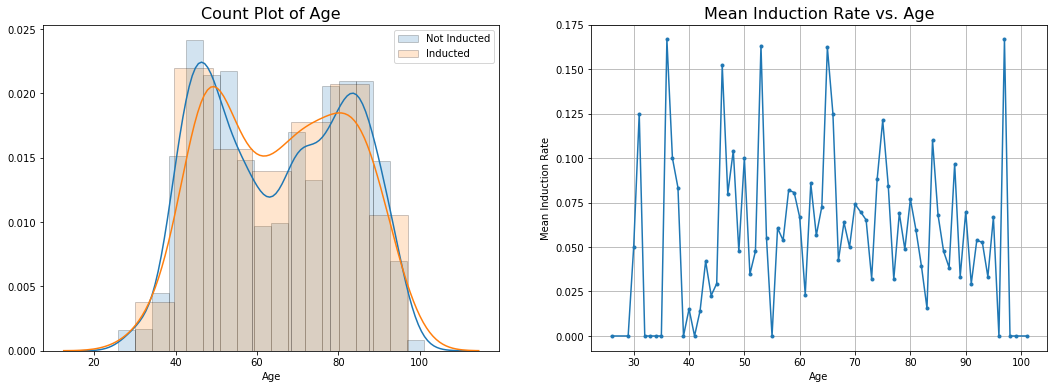

In [713]:
# This cell plots histogram of age, and mean induction rate by age.
grouped = dataset2[['age', 'inducted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(dataset2[dataset2['inducted'] == 0]['age'], label='Not Inducted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(dataset2[dataset2['inducted'] == 1]['age'], label='Inducted', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[0].set_xlabel('Age')
ax[1].plot(grouped['age'], grouped['inducted'], '.-')
ax[1].set_title('Mean Induction Rate vs. Age', fontsize=16)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Mean Induction Rate')
ax[1].grid(True)
plt.show()

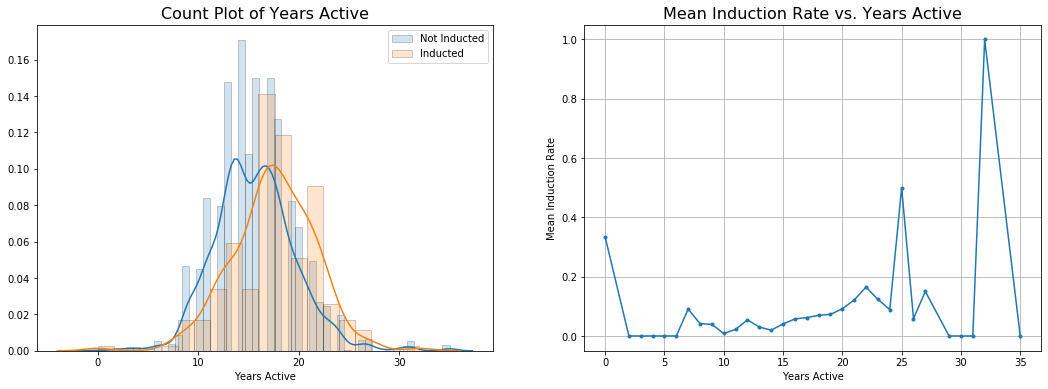

In [714]:
# This cell plots histogram of yearsActive, and mean induction rate by yearsActive.

grouped = dataset2[['yearsActive', 'inducted']].groupby('yearsActive').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(dataset2[dataset2['inducted'] == 0]['yearsActive'], label='Not Inducted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(dataset2[dataset2['inducted'] == 1]['yearsActive'], label='Inducted', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Years Active', fontsize=16)
ax[0].legend()
ax[0].set_xlabel('Years Active')
ax[1].plot(grouped['yearsActive'], grouped['inducted'], '.-')
ax[1].set_title('Mean Induction Rate vs. Years Active', fontsize=16)
ax[1].set_xlabel('Years Active')
ax[1].set_ylabel('Mean Induction Rate')
ax[1].grid(True)
plt.show()

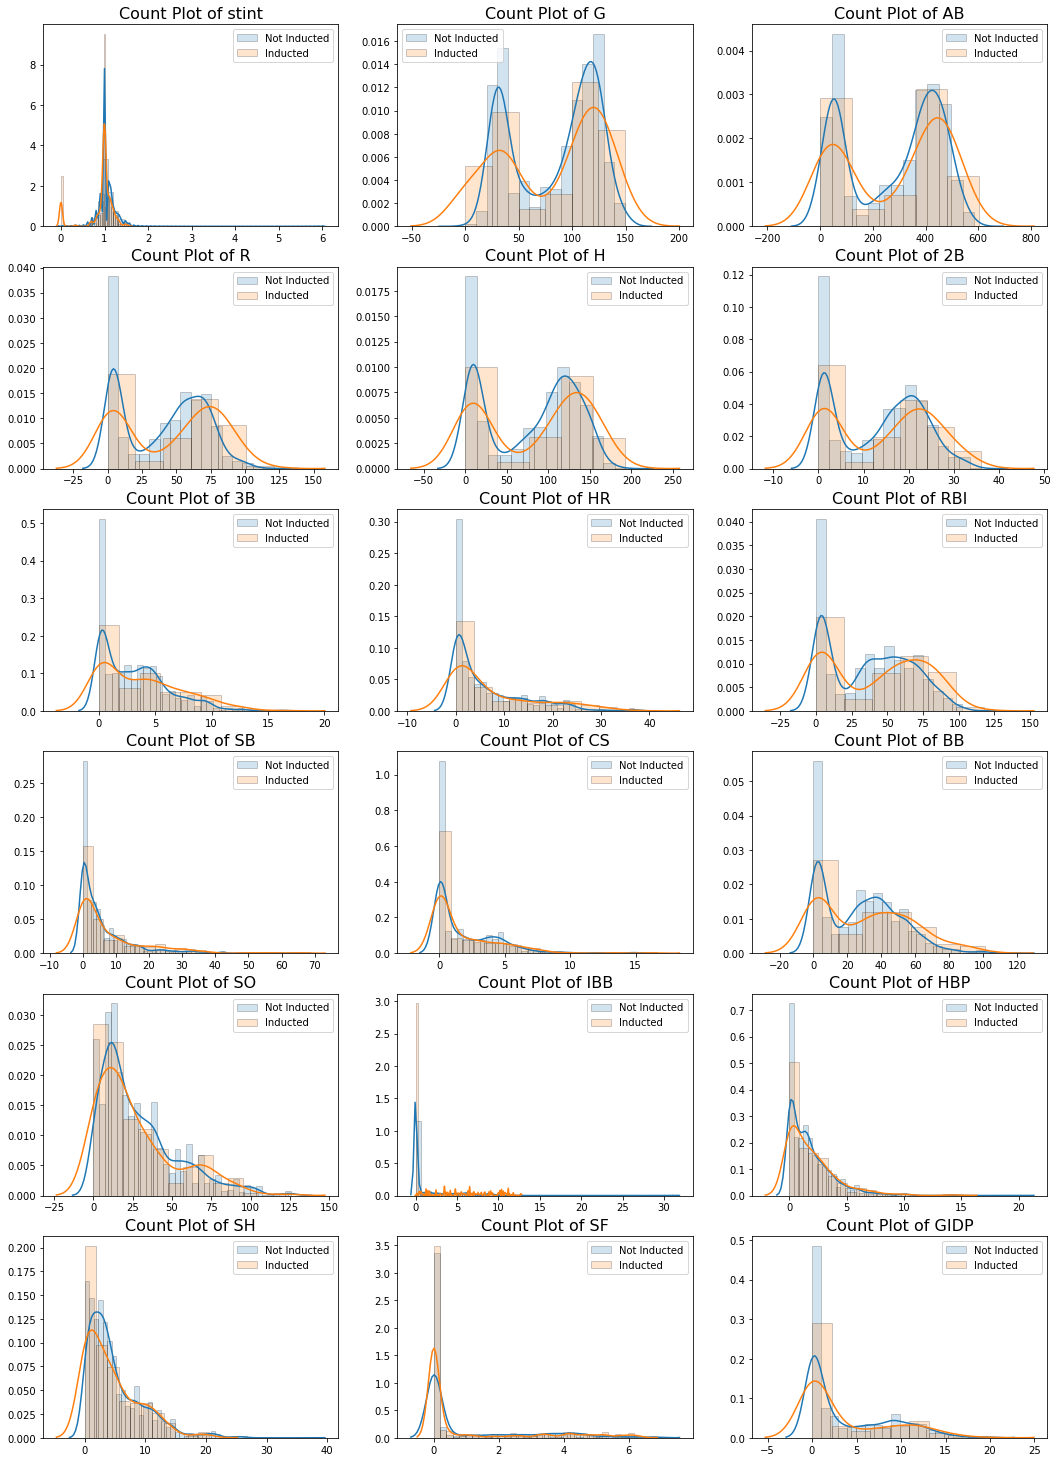

In [715]:
# Now let's loop through all the performance features: ['stint', 'G', 'AB', 'R', 'H',
       #'2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       #'SF', 'GIDP']
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(18, 26))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
indicators = ['stint', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP']
for i in range(0, 18):
    indicator = indicators[i]
    
    
    sns.distplot(dataset2[dataset2['inducted'] == 0][indicator], label='Not Inducted', 
             ax=ax[i//3][i%3], hist_kws=hist_kws)
    sns.distplot(dataset2[dataset2['inducted'] == 1][indicator], label='Inducted', 
             ax=ax[i//3][i%3], hist_kws=hist_kws)
    ax[i//3][i%3].set_title('Count Plot of ' + indicator, fontsize=16)
    ax[i//3][i%3].legend()
    ax[i//3][i%3].set_xlabel('')

plt.show()


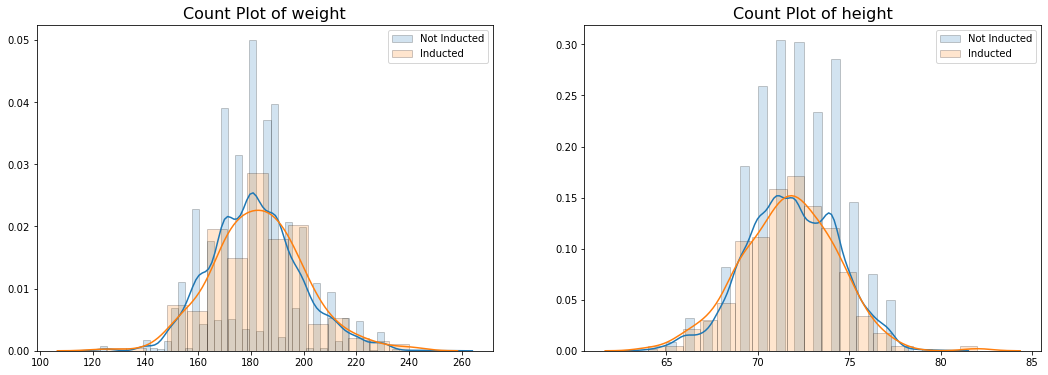

In [716]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
variables = ['weight', 'height']
for i in range(0, 2):
    variable = variables[i]
    
    
    sns.distplot(dataset2[dataset2['inducted'] == 0][variable], label='Not Inducted', 
             ax=ax[i], hist_kws=hist_kws)
    sns.distplot(dataset2[dataset2['inducted'] == 1][variable], label='Inducted', 
             ax=ax[i], hist_kws=hist_kws)
    ax[i].set_title('Count Plot of ' + variable, fontsize=16)
    ax[i].legend()
    ax[i].set_xlabel('')

plt.show()

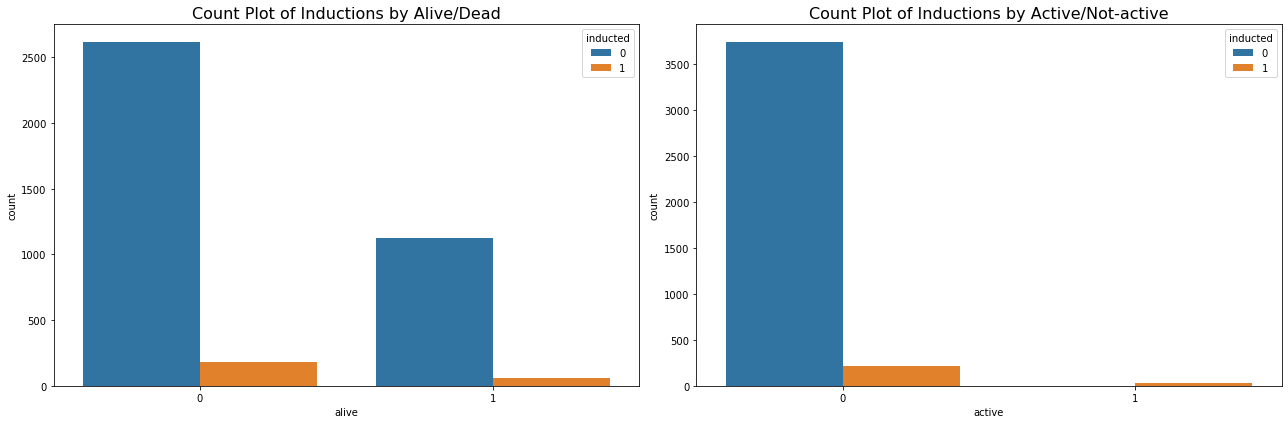

In [717]:
# plot of induction by dead or alive, and active/non-active
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='alive', hue='inducted', data=dataset2, ax=ax[0])
ax[0].set_title('Count Plot of Inductions by Alive/Dead', fontsize=16)

sns.countplot(x='active',  hue='inducted', data=dataset2, ax=ax[1])
ax[1].set_title('Count Plot of Inductions by Active/Not-active', fontsize=16)
plt.tight_layout()
plt.show()

In [718]:
pd.crosstab(dataset2['alive'], dataset2['inducted'])
# Contingency table of alive/dead and induction

inducted,0,1
alive,,
0,2621,185
1,1129,62


In [719]:
pd.crosstab(dataset2['active'], dataset2['inducted'])
# Contingency table of active/non-active
# It looks like the HOF committee seldom nominates active players. However, when they do, the nomination almost certainly gets approved.
# It indicates that an active play must be really outstanding to get nominated. In that case, the nomination will almost certainly be passed.

inducted,0,1
active,,
0,3749,221
1,1,26


We will use the performance indicators above for training our model.

# 5.  Modeling

## 5.1. Full Random Forest Model


First, I will feed all features into a random forest classifier and see which variables are important.

Because it uses all predictor variables, let's call this model the full model.


In [720]:
selectedColumns = ['inducted', 'weight', 'height', 'stint', 'G', 'AB', 'R', 'H', 
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'alive', 'active', 'age', 'yearsActive', 'bats', 'throws']
dataset3 = dataset2[selectedColumns]
features = selectedColumns[1:]

dataset3 = dataset3.dropna()
dataset3.shape

(3966, 27)

In [721]:
X_train, X_test, y_train, y_test = train_test_split(dataset3.drop(['inducted'], axis = 1), 
                                                    dataset3['inducted'], test_size = .2,
                                                   random_state = 8, stratify = dataset3['inducted'])


In [722]:
rfc = RandomForestClassifier(n_estimators = 100, 
                             criterion = 'gini', random_state= 8, 
                             oob_score  = True, class_weight = 'balanced_subsample')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=8, verbose=0, warm_start=False)

In [723]:
rfc.oob_score_ # out of bag accuracy. Looks good

0.8638083228247163

In [724]:
pd.crosstab(rfc.predict(X_train), y_train) # Confusion matrix on training data. Looks fine.

inducted,0,1
row_0,,
0,2819,56
1,176,121


In [725]:
#Confusion matrix on testing data. Doesn't look as good as we want it to be.
pd.crosstab(np.array([1 if pair[1] > .01 else 0 for pair in rfc.predict_proba(X_test)]), np.array(y_test))

col_0,0,1
row_0,,
0,412,20
1,338,24


In [726]:
# This is the classification report.
print(classification_report(y_true=y_test, y_pred=np.array([1 if pair[1] > .5 else 0 for pair in rfc.predict_proba(X_test)]).astype(int)))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       750
           1       0.01      0.02      0.02        44

    accuracy                           0.85       794
   macro avg       0.48      0.46      0.47       794
weighted avg       0.89      0.85      0.87       794



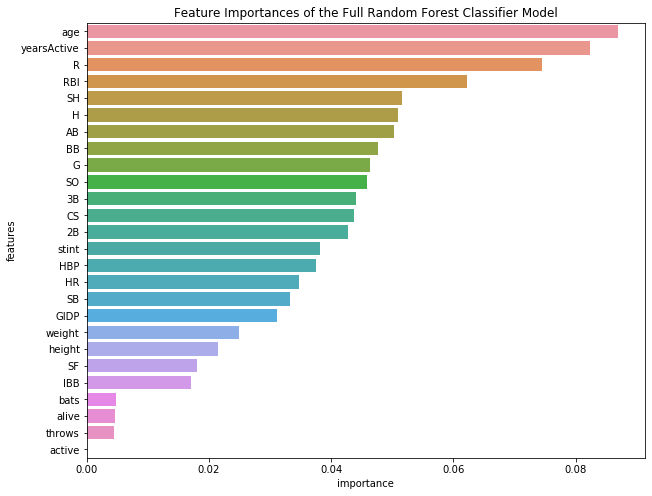

In [727]:
# This plot shows feature importances in the descening order.
importance = rfc.feature_importances_

importanceDF = pd.DataFrame(data = {'importance': importance, 'features': features})
importanceDF = importanceDF.sort_values(by = 'importance', ascending = False)
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='importance', y='features', data=importanceDF)
ax.set_title('Feature Importances of the Full Random Forest Classifier Model')
plt.show()

The model shows that performance indicators are importance predictors of passing a nomination. However, it surprised me that the random forest classifier doesn't think `active` is a strong predictor.

Next, I'll take a look at those performance indicators and do some selection. 

In [728]:
performanceIndicators = np.array(dataset3[['stint', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP']])
performanceIndicators_t = np.matrix.transpose(performanceIndicators)


In [729]:
np.linalg.eig(np.matmul(performanceIndicators_t, performanceIndicators))[0]


array([5.37467499e+08, 1.84953068e+06, 1.02364315e+06, 5.56313378e+05,
       4.81289989e+05, 2.02550013e+05, 1.11855210e+05, 7.09518742e+04,
       5.41423025e+04, 2.10700392e+04, 2.94496895e+02, 1.52045571e+03,
       4.03656558e+03, 7.17038557e+03, 8.00798975e+03, 9.88199758e+03,
       1.34897719e+04, 1.54378860e+04])

No multicollinearity was found in the performance features. 

## 5.2. Restricted Random Forest Model

The full random forest classification model shows us some variables are not as important as others. In this restricted model, I will remove some of the less important variables. 

Since we are using less variables this time, let's call this model the restricted random forest classification model. 


In [730]:
 # filtering out active nominated players;
selectedColumns = ['inducted', 'weight', 'height', 'stint', 'G', 'AB', 'R',
        'HR', 'RBI',  'BB', 'SO', 'SF',  'age', 'yearsActive', 'active']
dataset4 = dataset3[selectedColumns]
features = selectedColumns[1:]
X_train, X_test, y_train, y_test = train_test_split(dataset4.drop(['inducted'], axis = 1), 
                                                    dataset4['inducted'], test_size = .2,
                                                   random_state = 8)
rfc2 = RandomForestClassifier(n_estimators = 100, 
                             criterion = 'gini', random_state= 8, 
                             oob_score  = True, class_weight = 'balanced_subsample')
rfc2.fit(X_train, y_train)
rfc2.oob_score_

0.8578184110970997

In [731]:
# Confusion matrix on testing set
pd.crosstab(rfc2.predict(X_test), y_test)

inducted,0,1
row_0,,
0,683,39
1,70,2


In [732]:
print(classification_report(y_true=y_test, y_pred=np.array([1 if pair[1] > .01 else 0 for pair in rfc2.predict_proba(X_test)]).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.52      0.67       753
           1       0.07      0.66      0.12        41

    accuracy                           0.52       794
   macro avg       0.52      0.59      0.40       794
weighted avg       0.92      0.52      0.64       794



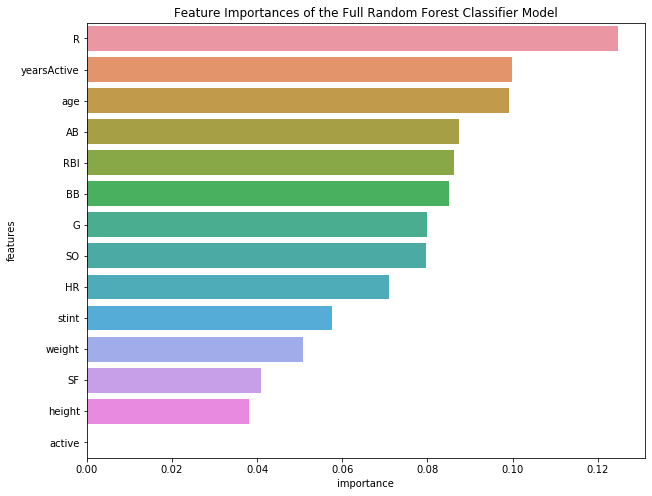

In [733]:
importance = rfc2.feature_importances_

importanceDF = pd.DataFrame(data = {'importance': importance, 'features': features})
importanceDF = importanceDF.sort_values(by = 'importance', ascending = False)
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='importance', y='features', data=importanceDF)
ax.set_title('Feature Importances of the Full Random Forest Classifier Model')
plt.show()

In [734]:
# Prepping for plotting ROC curve
Y_train_predicted_proba = rfc2.predict_proba(X_train)[:, 1]
Y_test_predicted_proba  = rfc2.predict_proba(X_test)[:, 1]
falsePositiveTrain, truePositiveRateTrain, thresholdTrain = roc_curve(y_train, Y_train_predicted_proba)
falsePositiveTest, truePositiveRateTest, thresholdTest = roc_curve(y_test, Y_test_predicted_proba)
train_auc = np.round(auc(falsePositiveTrain, truePositiveRateTrain), 3)
test_auc = np.round(auc(falsePositiveTest, truePositiveRateTest), 3)

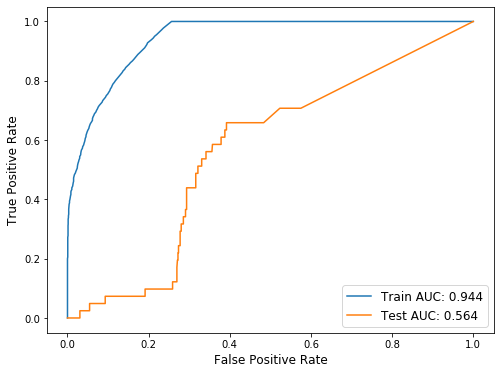

In [735]:
# Plotting ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(falsePositiveTrain, truePositiveRateTrain, label='Train AUC: ' + str(train_auc))
ax.plot(falsePositiveTest, truePositiveRateTest, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

We obtained a lot of insights into the data using random forest. But the prediction result is less than impressive. Next, I will build a model based on a more granular level of data.

# 5.3. Logistic Regression

Recall that in the original `hallOfFame` data, there are three columns:

`ballots`, `needed`, and `votes`.

After calculation, it was discovered that 

$$\frac{needed}{ballots} $$

is around 0.75.

Also, given the `votes` column, I am now going to treat this data as a grouped data. Hence, in this model, instead of modeling the probability of one player being successfully passed for Hall of Fame, I will model the probability of a vote being supportive of such a nomination.

Key takeaway:

1. The two random forest classifier's response variable is the probability of a player being passed for nomination;

2. The following logistic regression's response variable is the probability of a voter being supportive.

Hence, after obtained the predicted value $\hat{p}$, we could approximate supportive votes.

Let $n$ be the number of ballots, and X be the random variable that represents the number of supportive votes. Then we have

$$X \sim N(n\hat{p}, n\hat{p}(1-\hat{p})),$$

Then we could approximate the probability of a player being approved for Hall of Fame. That is:

$$P(approved) =$$ $$P(X>0.75n)=$$ $$ 1 -P(X\le0.75n )=$$ $$ 1-P(\frac{X-n\hat{p}}{\sqrt{n\hat{p}(1-\hat{p})}} \le \frac{0.75n-n\hat{p}}{\sqrt{n\hat{p}(1-\hat{p})}})=$$ $$1-P(Z\le \frac{0.75n-n\hat{p}}{\sqrt{n\hat{p}(1-\hat{p})}})=$$ $$1-\phi(\frac{0.75n-n\hat{p}}{\sqrt{n\hat{p}(1-\hat{p})}}), $$

where $$Z \sim N(0, 1),$$ and $$\phi$$ is $Z$'s CDF.

Note that $\hat{p}$ is the target of our prediction.

I will perform logistic regression in `R`, because I am more familiar using `R` for this analysis.

`R` code to follow. Please refer to the `R` document for details of this model. 

In [736]:
selectedColumns =['ballots', 'inducted', 'needed', 'votes', 'weight', 'height', 'stint', 'G', 'AB', 'R', 'H', 
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'alive', 'active', 'age', 'yearsActive', 'bats', 'throws']

In [737]:
dataset5 = dataset2[selectedColumns]


In [738]:
dataset5.head()

,ballots,inducted,needed,votes,weight,height,stint,G,AB,R,...,HBP,SH,SF,GIDP,alive,active,age,yearsActive,bats,throws
0,226.0,1,170.0,222.0,175.0,73.0,1.000000,126.458333,476.416667,93.583333,...,3.916667,12.291667,0.0,0.000000,0,0,75.0,23.0,0,1
1,226.0,1,170.0,215.0,215.0,74.0,1.000000,113.772727,381.727273,98.818182,...,1.954545,5.136364,0.0,0.090909,0,0,53.0,21.0,0,0
2,226.0,1,170.0,215.0,200.0,71.0,1.000000,132.952381,496.666667,82.666667,...,5.952381,10.523810,0.0,0.000000,0,0,81.0,20.0,1,1
3,226.0,1,170.0,205.0,195.0,73.0,1.117647,38.000000,99.058824,8.882353,...,1.000000,4.058824,0.0,0.000000,0,0,45.0,16.0,1,1
4,226.0,1,170.0,189.0,200.0,73.0,1.000000,44.428571,110.666667,11.476190,...,0.619048,3.333333,0.0,0.000000,0,0,59.0,20.0,1,1


In [739]:
dataset5.to_csv('dataset4.csv')

## 5.4. Visulization of Important Features

Following the logistic regression in `R`, it is found that these variables are statistically significant (at .05) level:

`weight`+, `height`+, `stint`-, `G`+, `AB`-, `R`+, `H`+, `2B`-, `3B`-, `HR`+, `RBI`-, `SB`+, `CS`-, `BB`-, `alive`+, `age`+, `yearsActive`+, `bats` right hand +, `throws` right hand +, etc.

Now let's build a single tree and see whether the tree model agrees with logistic regression.

In [740]:
features = [ 'weight', 'height', 'stint', 'G', 'AB', 'R', 'H', 
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'alive', 'active', 'age', 'yearsActive', 'bats', 'throws']
dataset5 = dataset5.dropna()

In [741]:
singleTree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 30, random_state = 6)
singleTree.fit(dataset5[features], dataset5['inducted'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')

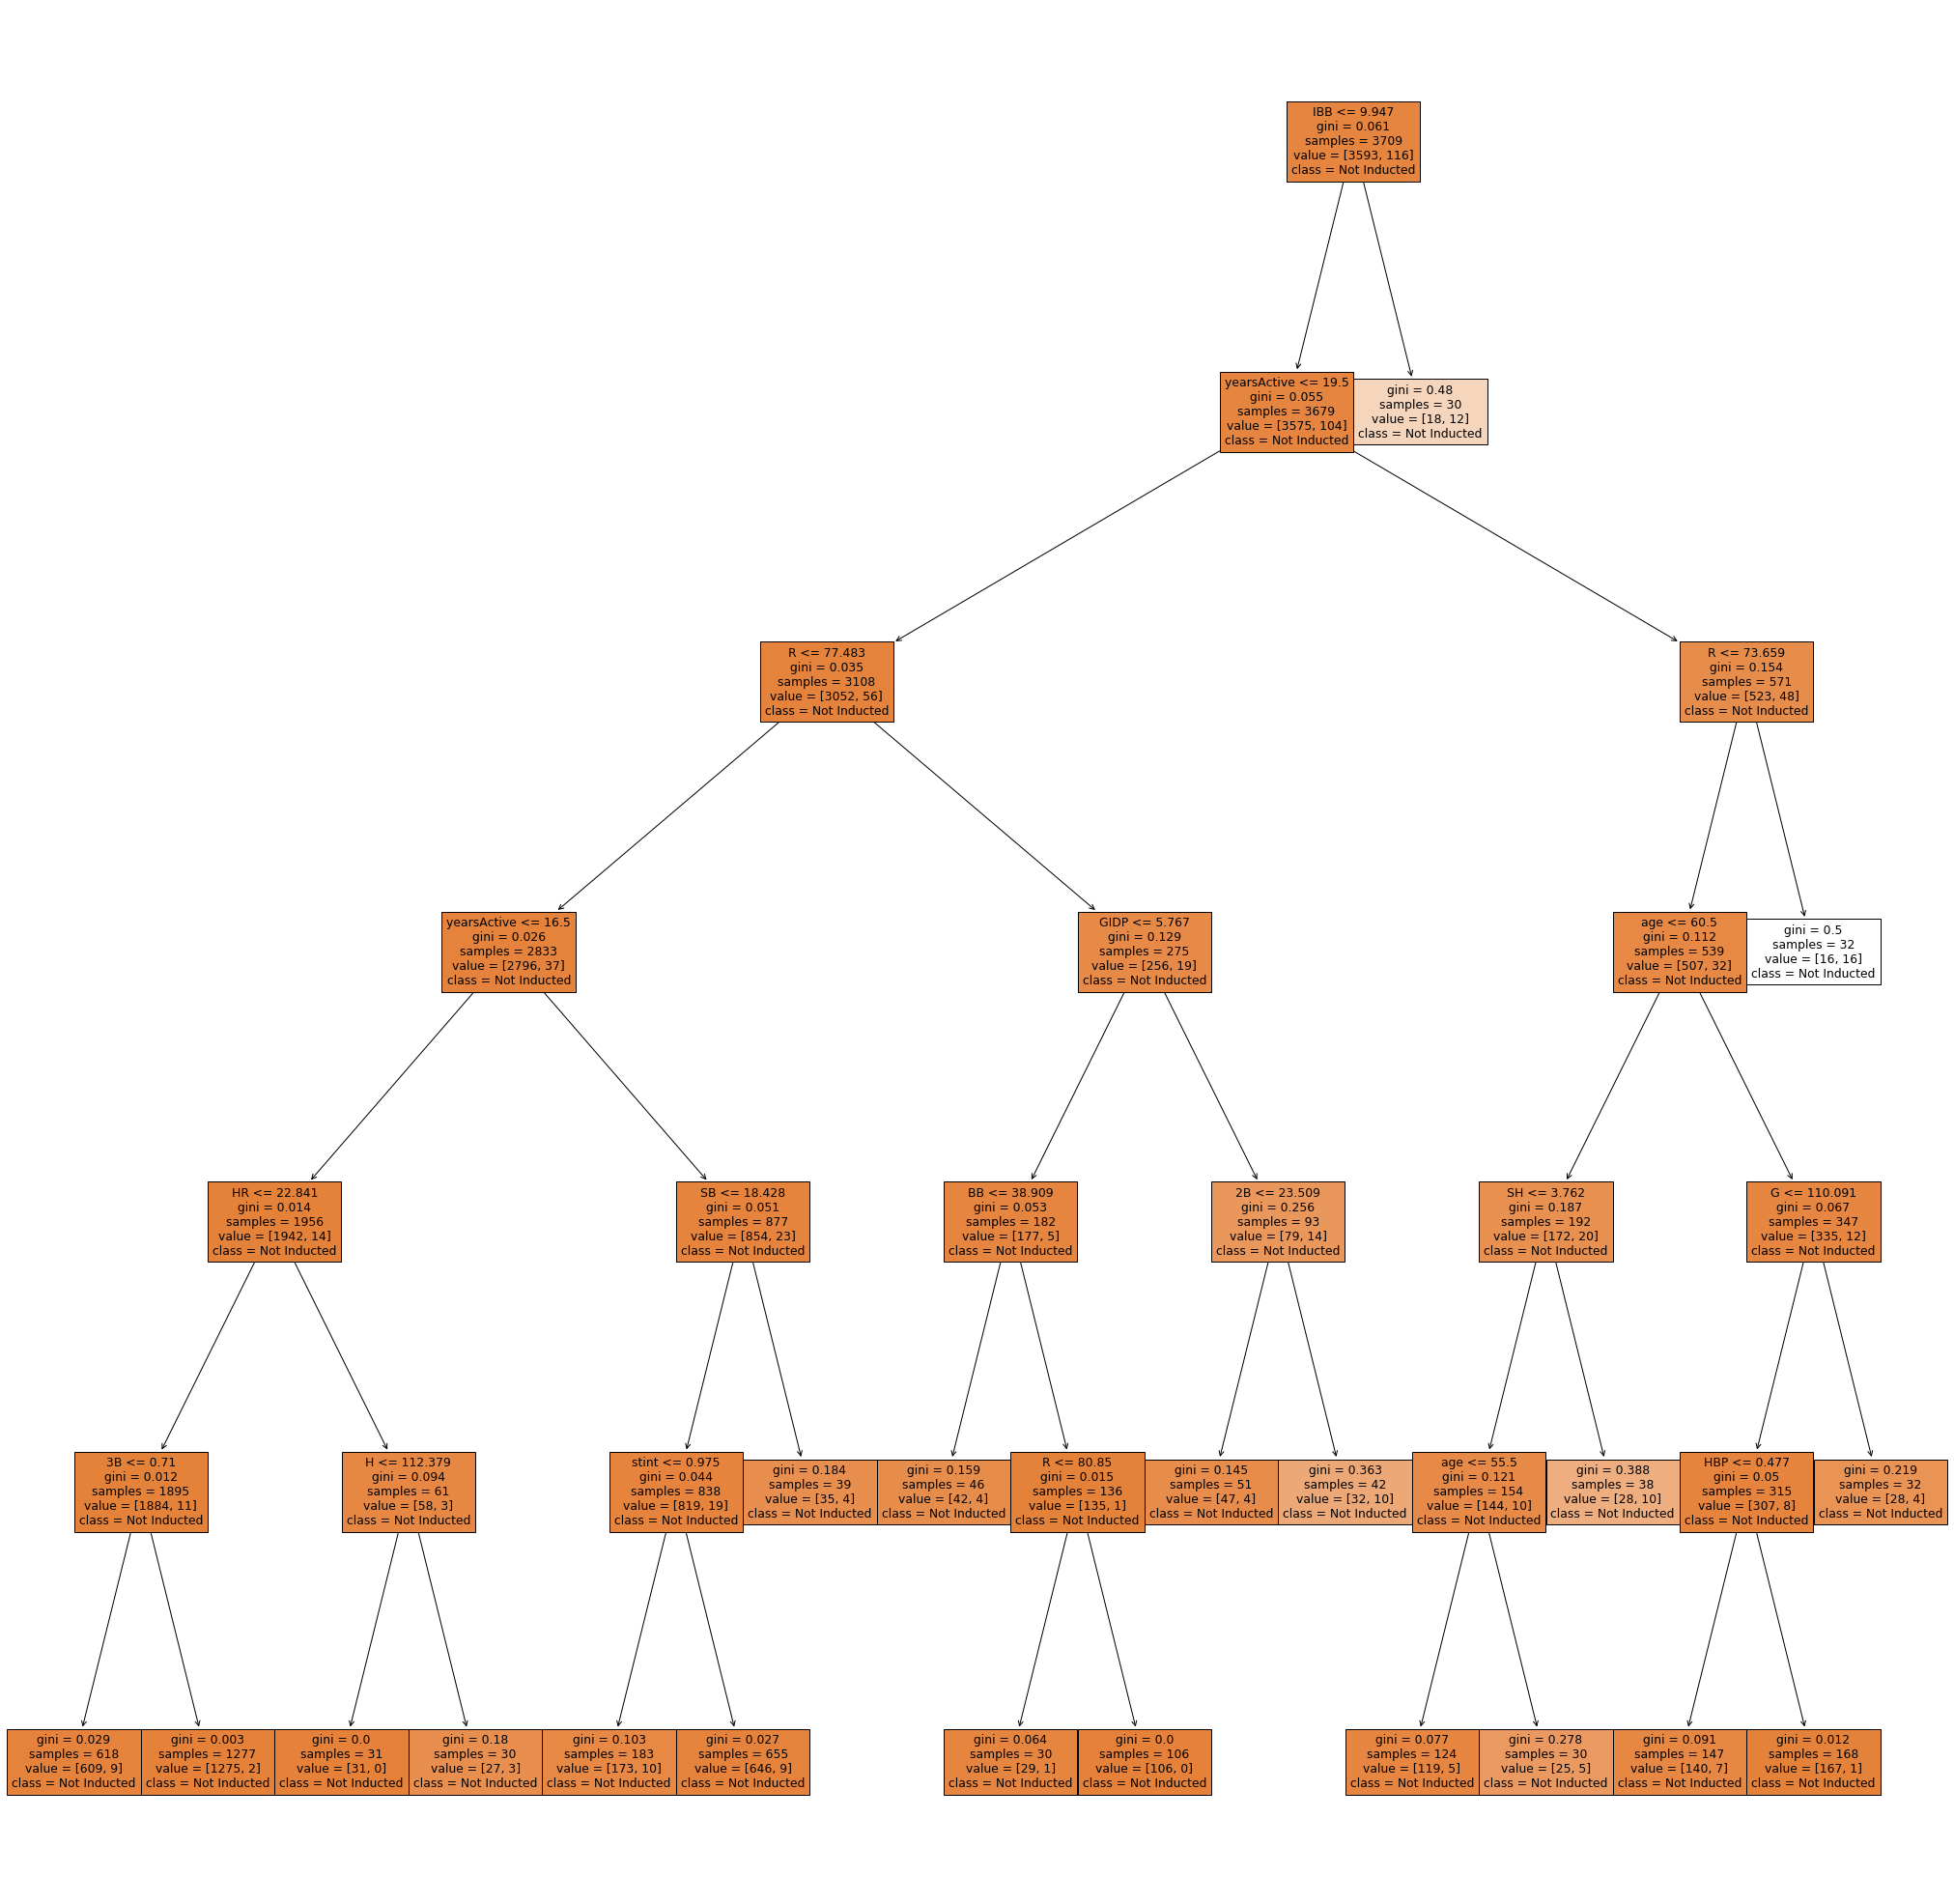

In [662]:
fig, ax = plt.subplots(figsize = (36, 36))
_ = tree.plot_tree(singleTree, 
                   feature_names=features,  
                   class_names=['Not Inducted', 'Inducted'],
                   filled=True)
plt.show()

On a second note, let's also take a look at how these predictor variables are related to each other, using principal components.

First we will cluster these players nomination.

## 5.5. A Two Staged Model

Among all predictor variables, `active` caught my attention because

1. Very few nominated players were active when nominated, and

2. Almost all active players were successfully inducted.

Therefore, I propose a model that:

1. Player who was active when nominated is predicted to be inducted;

2. All others, feed into the model.
|

In [652]:
y_pred = np.array([1 if pair[1] > .15 else 0 for pair in rfc2.predict_proba(X_test)])  | X_test['active']==1

In [654]:
print(classification_report(y_true=y_test, y_pred=y_pred.astype(int)))b

              precision    recall  f1-score   support

           0       0.95      0.71      0.82       753
           1       0.06      0.34      0.10        41

    accuracy                           0.70       794
   macro avg       0.51      0.53      0.46       794
weighted avg       0.91      0.70      0.78       794



# 6. Summary

## 6.1. Conclusion

We can draw the following conclusions from the analysis:

* 1. Hall of Fame is a very competitive and prestigious honor that is granted to very few of the baseball players.

* 2. The Hall of Fame committee usually only nominates players who have retired.

* 3. If the committee nominated an active player, it really says something about him,Spor and he most certainly gets inducted.

* 4. Seniority and age are positive factors for consideration when voting for inducting.

* 5. Sports skills play also contribute to the induction into the Hall of Fame.

* 6. The induction to the Hall of Fame is not of purely technical consequence. Luck also plays a part.

## 6.2. Further Opportunities of Research

If given more time, I would look dive deeper into the project by looking at the following aspects:

* I would do a more extensive research on the exact meaning of the columns that represent technical performance in the dataset.

* I would also try different approaches to transform the predictors. Here, the technical performance features were averaged by year. More opportunities exist in this part: for example, we can use accummulated total, or we can look at the most recent years' performance indicators.

* The logistic regression model in Section 5.5. still has great potential for exploration. I noticed that all parameters have a very small p-value, so I suspect there is a (quasi-) complete separation somewhere in the sample space.

* I would also try some other models. A good candidate here is naive bayes and gradient boosting classifier. They might yield better performance.